# Importing a bunch of functions

As you are currently looking at this code I assume you would like to run it.
First things first, this will not work on Lab PCs or your own out of the box, due to the fact that it has XGBoost and TensorFlow. I have not tested it on lab PCs. This program works as 05/05/2023 on the latest version, if you are using any version of conda, or the libaires please don't it might not work.
You need to use conda to run this with MatplotLib, SKLearn, XGBoost, TensorFlow all installed. This was done on windows 10 using conda install commands in the admin conda console. Most of these libaires are straight forward and have many guides on the internet on how to intstall them, apart from XGBoost GPU. For whatever reason they haven't updated their website so you have to use pip install to get the XGBoost GPU and (for Nivida GPUs) you need Nivida toolkit installed 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score, classification_report, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, Normalizer, LabelEncoder
import multiprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.decomposition import PCA
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import LinearSVC
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier
from collections import Counter
from imblearn.over_sampling import SMOTE

In [ ]:
def get_PCA_feature_names(num_of_pca_components):
    feature_names = []
    for i in range(num_of_pca_components):    
        feature_names.append(f"Principal component {i+1}")
    return feature_names

In [ ]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep]

Aleixo, F. (1964) Is there something already implemented in python to calculate TP, TN, FP, and FN for multiclass confusion matrix?, Stack Overflow. Available at: https://stackoverflow.com/questions/43697980/is-there-something-already-implemented-in-python-to-calculate-tp-tn-fp-and-fn

In [ ]:
def counts_from_confusion(confusion):
    """
    Obtain TP, FN FP, and TN for each class in the confusion matrix
    """

    counts_list = []

    # Iterate through classes and store the counts
    for i in range(confusion.shape[0]):
        tp = confusion[i, i]

        fn_mask = np.zeros(confusion.shape)
        fn_mask[i, :] = 1
        fn_mask[i, i] = 0
        fn = np.sum(np.multiply(confusion, fn_mask))

        fp_mask = np.zeros(confusion.shape)
        fp_mask[:, i] = 1
        fp_mask[i, i] = 0
        fp = np.sum(np.multiply(confusion, fp_mask))

        tn_mask = 1 - (fn_mask + fp_mask)
        tn_mask[i, i] = 0
        tn = np.sum(np.multiply(confusion, tn_mask))

        counts_list.append({'Class': i,
                            'TP': tp,
                            'FN': fn,
                            'FP': fp,
                            'TN': tn})

    return print(*counts_list, sep = "\n")

In [ ]:
def confusionMatrix(predicted, yTest, labels, figName):
  cm = confusion_matrix(predicted, yTest, labels= labels )
  counts_from_confusion(cm)
  CmDisp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels = labels)
  fig, ax = plt.subplots(figsize = (35,35))
  CmDisp.plot(ax=ax)
  ax.set_title(figName)
  print(type(labels))
  
  return plt.show()


In [ ]:
def getSummary(predicted, yTest, name):
  print(name + ": \nAccuracy: " + str(accuracy_score(predicted, yTest )) + " \nRecall: " + str(recall_score(predicted, yTest, average='macro')) + " \nPrecision: " + str(precision_score(predicted, yTest, average='macro')) + " \nF1 Score: " + str(f1_score(predicted, yTest, average='macro'))  )
  return 

In [ ]:
if tf.test.gpu_device_name(): 

    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:

   print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


#  Importing and concatenating all csv files



In [ ]:
from google.colab import drive
#This work in google colab and uses your google drive as the directory, you will need to edit the following code to get the correct directory
drive.mount('/content/drive')

Mounted at /content/drive


Colab wouldn't allow me to upload them directly so I had to mount my google drive <p>
The following two code blocks are:<p> bharti, R. (2020) CICIDS 2017 data and classifiers analysis, Kaggle. Kaggle. Available at: https://www.kaggle.com/code/rohitbharti/cicids-2017-data-and-classifiers-analysis

In [ ]:
#change all of this df1 = Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv | df2 = Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv 
# df3 = Friday-WorkingHours-Morning.pcap_ISCX.csv | df4 = Monday-WorkingHours.pcap_ISCX.csv 
# df5 = Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv | df6 =  Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
# df7 = Tuesday-WorkingHours.pcap_ISCX.csv | df8 = Wednesday-workingHours.pcap_ISCX.csv
# the order shouldn't change the results too much but the random spilt will be different depending on the order of concatination so copy whats above if you edit this
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")

Using pandas to combine the dataframes and then delete the previous dataframe to free up memory

In [ ]:
df = pd.concat([df1,df2])
del df1,df2
df = pd.concat([df,df3])
del df3
df = pd.concat([df,df4])
del df4
df = pd.concat([df,df5])
del df5
df = pd.concat([df,df6])
del df6
df = pd.concat([df,df7])
del df7
df = pd.concat([df,df8])
del df8

Checking the dataframe to see if all columns that are expeceted are there

In [ ]:
df.shape
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 692702
Data columns (total 79 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             int64  
 1    Flow Duration                int64  
 2    Total Fwd Packets            int64  
 3    Total Backward Packets       int64  
 4   Total Length of Fwd Packets   int64  
 5    Total Length of Bwd Packets  int64  
 6    Fwd Packet Length Max        int64  
 7    Fwd Packet Length Min        int64  
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         int64  
 11   Bwd Packet Length Min        int64  
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max          

saving the combined dataframe as a singular csv, hopefully will only have to upload this single file everytime I restart instead of doing all of the previous steps

In [ ]:
df.to_csv("CombinedDF.csv")

# **CICIDS2017 Dataset evlauation**

RAM IS PRECIOUS USE DEL AND GARBAGE COLLECTION. NOTE: THIS IS NOT C++ MEMORY MANAGEMENT IS NOT GREAT

In [ ]:
import gc
gc.collect()
#this is useful after using del a bunch, python should do is automatically anyway

22

In [ ]:
df=pd.read_csv("C:/Users/Jack/CombinedDF.csv")

In [ ]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

C:\Users\Jack\AppData\Local\Temp\ipykernel_12300\1690174868.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
C:\Users\Jack\AppData\Local\Temp\ipykernel_12300\1690174868.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')


In [ ]:
df.drop(columns=df.columns[0], axis=1,  inplace=True)

In [ ]:
df.iloc[:,-1:].value_counts()

label                     
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
dtype: int64

This is terrible to read also way too many NANs 

In [ ]:
corrM = df.corr()
corrM.style.background_gradient(cmap='coolwarm').set_precision(3)

C:\Users\Jack\AppData\Local\Temp\ipykernel_12300\2402634407.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrM = df.corr()
C:\Users\Jack\AppData\Local\Temp\ipykernel_12300\2402634407.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrM.style.background_gradient(cmap='coolwarm').set_precision(3)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3931: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\formats\style.py:3932: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


In [ ]:
del corrM

In [ ]:
df = clean_dataset(df)

C:\Users\Jack\AppData\Local\Temp\ipykernel_12300\2671744760.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2827876 entries, 0 to 2830742
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int64  
 1   flow_duration                int64  
 2   total_fwd_packets            int64  
 3   total_backward_packets       int64  
 4   total_length_of_fwd_packets  int64  
 5   total_length_of_bwd_packets  int64  
 6   fwd_packet_length_max        int64  
 7   fwd_packet_length_min        int64  
 8   fwd_packet_length_mean       float64
 9   fwd_packet_length_std        float64
 10  bwd_packet_length_max        int64  
 11  bwd_packet_length_min        int64  
 12  bwd_packet_length_mean       float64
 13  bwd_packet_length_std        float64
 14  flow_bytes/s                 float64
 15  flow_packets/s               float64
 16  flow_iat_mean                float64
 17  flow_iat_std                 float64
 18  flow_iat_max                 int64  
 19  

In [ ]:
df =  df.drop_duplicates(keep="first")
df.reset_index(drop=True,inplace=True)

In [ ]:
integer = []
f = []
for i in df.columns[:-1]:
    if df[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df[integer] = df[integer].astype("int32")
df[f] = df[f].astype("float32")

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int32  
 1   flow_duration                int32  
 2   total_fwd_packets            int32  
 3   total_backward_packets       int32  
 4   total_length_of_fwd_packets  int32  
 5   total_length_of_bwd_packets  int32  
 6   fwd_packet_length_max        int32  
 7   fwd_packet_length_min        int32  
 8   fwd_packet_length_mean       float32
 9   fwd_packet_length_std        float32
 10  bwd_packet_length_max        int32  
 11  bwd_packet_length_min        int32  
 12  bwd_packet_length_mean       float32
 13  bwd_packet_length_std        float32
 14  flow_bytes/s                 float32
 15  flow_packets/s               float32
 16  flow_iat_mean                float32
 17  flow_iat_std                 float32
 18  flow_iat_max                 int32  
 19  

In [ ]:
np.any(np.isnan(df[df.columns[0:-1]]))

False

In [ ]:
np.all(np.isfinite(df[df.columns[0:-1]]))

True

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int32  
 1   flow_duration                int32  
 2   total_fwd_packets            int32  
 3   total_backward_packets       int32  
 4   total_length_of_fwd_packets  int32  
 5   total_length_of_bwd_packets  int32  
 6   fwd_packet_length_max        int32  
 7   fwd_packet_length_min        int32  
 8   fwd_packet_length_mean       float32
 9   fwd_packet_length_std        float32
 10  bwd_packet_length_max        int32  
 11  bwd_packet_length_min        int32  
 12  bwd_packet_length_mean       float32
 13  bwd_packet_length_std        float32
 14  flow_bytes/s                 float32
 15  flow_packets/s               float32
 16  flow_iat_mean                float32
 17  flow_iat_std                 float32
 18  flow_iat_max                 int32  
 19  

In [ ]:
df.describe()

destination_port  flow_duration  total_fwd_packets  \
count      2.520798e+06   2.520798e+06       2.520798e+06   
mean       8.690590e+03   1.659161e+07       1.028174e+01   
std        1.901280e+04   3.523276e+07       7.944201e+02   
min        0.000000e+00  -1.300000e+01       1.000000e+00   
25%        5.300000e+01   2.080000e+02       2.000000e+00   
50%        8.000000e+01   5.062200e+04       2.000000e+00   
75%        4.430000e+02   5.333340e+06       6.000000e+00   
max        6.553500e+04   1.200000e+08       2.197590e+05   

       total_backward_packets  total_length_of_fwd_packets  \
count            2.520798e+06                 2.520798e+06   
mean             1.157280e+01                 6.119477e+02   
std              1.056922e+03                 1.058827e+04   
min              0.000000e+00                 0.000000e+00   
25%              1.000000e+00                 1.200000e+01   
50%              2.000000e+00                 6.600000e+01   
75%              5.000000e+00                 3.320000e+02   
max              2.919220e+05                 1.290000e+07   

       total_length_of_bwd_packets  fwd_packet_length_max  \
count                 2.520798e+06           2.520798e+06   
mean                  1.814440e+04           2.312292e+02   
std                   2.398177e+06           7.563755e+02   
min                   0.000000e+00           0.000000e+00   
25%                   6.000000e+00           6.000000e+00   
50%                   1.560000e+02           4.000000e+01   
75%                   9.970000e+02           2.020000e+02   
max                   6.554530e+08           2.482000e+04   

       fwd_packet_length_min  fwd_packet_length_mean  fwd_packet_length_std  \
count           2.520798e+06            2.520798e+06           2.520798e+06   
mean            1.920349e+01            6.350498e+01           7.732345e+01   
std             6.079834e+01            1.934577e+02           2.901213e+02   
min             0.000000e+00            0.000000e+00           0.000000e+00   
25%             0.000000e+00            6.000000e+00           0.000000e+00   
50%             2.000000e+00            3.625000e+01           0.000000e+00   
75%             3.700000e+01            5.200000e+01           7.419280e+01   
max             2.325000e+03            5.940857e+03           7.125597e+03   

       ...  act_data_pkt_fwd  min_seg_size_forward   active_mean  \
count  ...      2.520798e+06          2.520798e+06  2.520798e+06   
mean   ...      6.009478e+00         -3.082233e+03  9.157845e+04   
std    ...      6.744150e+02          1.149758e+06  6.816802e+05   
min    ...      0.000000e+00         -5.368707e+08  0.000000e+00   
25%    ...      0.000000e+00          2.000000e+01  0.000000e+00   
50%    ...      1.000000e+00          2.000000e+01  0.000000e+00   
75%    ...      3.000000e+00          3.200000e+01  0.000000e+00   
max    ...      2.135570e+05          1.380000e+02  1.100000e+08   

         active_std    active_max    active_min    idle_mean      idle_std  \
count  2.520798e+06  2.520798e+06  2.520798e+06    2520798.0  2.520798e+06   
mean   4.619177e+04  1.720171e+05  6.546359e+04    9337368.0  5.657942e+05   
std    4.146231e+05  1.085571e+06  6.111585e+05   24873716.0  4.843257e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00          0.0  0.000000e+00   
25%    0.000000e+00  0.000000e+00  0.000000e+00          0.0  0.000000e+00   
50%    0.000000e+00  0.000000e+00  0.000000e+00          0.0  0.000000e+00   
75%    0.000000e+00  0.000000e+00  0.000000e+00          0.0  0.000000e+00   
max    7.420000e+07  1.100000e+08  1.100000e+08  120000000.0  7.690000e+07   

           idle_max      idle_min  
count  2.520798e+06  2.520798e+06  
mean   9.763770e+06  8.892671e+06  
std    2.561746e+07  2.458143e+07  
min    0.000000e+00  0.000000e+00  
25%    0.000000e+00  0.000000e+00  
50%    0.000000e+00  0.000000e+00  
75%    0.000000e+00  0.000000e+00  
max    1.200000e+08  1.200000e+0

In [ ]:
df.groupby('label').first()

destination_port  flow_duration  \
label                                                         
BENIGN                                 54865              3   
Bot                                     8080       60202640   
DDoS                                      80        1293792   
DoS GoldenEye                             80        5008837   
DoS Hulk                                  80           1878   
DoS Slowhttptest                          80          16045   
DoS slowloris                             80        5169956   
FTP-Patator                               80        5216127   
Heartbleed                               444      119302728   
Infiltration                             444       42664070   
PortScan                                  80        5021059   
SSH-Patator                               22            404   
Web Attack � Brute Force                  80        5185118   
Web Attack � Sql Injection                80        5006127   
Web Attack � XSS                          80        5638432   

                            total_fwd_packets  total_backward_packets  \
label                                                                   
BENIGN                                      2                       0   
Bot                                         9                       9   
DDoS                                        3                       7   
DoS GoldenEye                               4                       5   
DoS Hulk                                    3                       6   
DoS Slowhttptest                            5                       3   
DoS slowloris                               8                       6   
FTP-Patator                                 3                       1   
Heartbleed                               2685                    1729   
Infiltration                                5                       6   
PortScan                                    6                       5   
SSH-Patator                                 2                       0   
Web Attack � Brute Force                    7                       7   
Web Attack � Sql Injection                  4                       4   
Web Attack � XSS                            3                       1   

                            total_length_of_fwd_packets  \
label                                                     
BENIGN                                               12   
Bot                                                 322   
DDoS                                                 26   
DoS GoldenEye                                       341   
DoS Hulk                                            382   
DoS Slowhttptest                                    356   
DoS slowloris                                      1101   
FTP-Patator                                           0   
Heartbleed                                         8299   
Infiltration                                        141   
PortScan                                            703   
SSH-Patator                                           0   
Web Attack � Brute Force                           1022   
Web Attack � Sql Injection                          447   
Web Attack � XSS                                      0   

                            total_length_of_bwd_packets  \
label                                                     
BENIGN                                                0   
Bot                                                 256   
DDoS                                              11607   
DoS GoldenEye                                      3525   
DoS Hulk                                          11595   
DoS Slowhttptest                                   1964   
DoS slowloris                                      4222   
FTP-Patator                                           0   
Heartbleed                                      7556917   
Infiltration                                        291   
Po

# Splitting dataset into training and testing data 

In [ ]:
X=df[df.columns[0:-1]]
y=df[df.columns[-1]]
del df

In [ ]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 78 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             int32  
 1   flow_duration                int32  
 2   total_fwd_packets            int32  
 3   total_backward_packets       int32  
 4   total_length_of_fwd_packets  int32  
 5   total_length_of_bwd_packets  int32  
 6   fwd_packet_length_max        int32  
 7   fwd_packet_length_min        int32  
 8   fwd_packet_length_mean       float32
 9   fwd_packet_length_std        float32
 10  bwd_packet_length_max        int32  
 11  bwd_packet_length_min        int32  
 12  bwd_packet_length_mean       float32
 13  bwd_packet_length_std        float32
 14  flow_bytes/s                 float32
 15  flow_packets/s               float32
 16  flow_iat_mean                float32
 17  flow_iat_std                 float32
 18  flow_iat_max                 int32  
 19  

Checking for columns with low variance to get rid off

In [ ]:
var_thr = VarianceThreshold() 
var_thr.fit(X)

var_thr.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [ ]:
concol = [column for column in X.columns 
          if column not in X.columns[var_thr.get_support()]]

for features in concol:
    print(features)

bwd_psh_flags
bwd_urg_flags
fwd_avg_bytes/bulk
fwd_avg_packets/bulk
fwd_avg_bulk_rate
bwd_avg_bytes/bulk
bwd_avg_packets/bulk
bwd_avg_bulk_rate


In [ ]:
X = X.drop(concol,axis=1)

In [ ]:
features = X.columns.tolist()

Dataset is scaled and normalized 

In [ ]:
dfScaled = StandardScaler().fit_transform(X)
dfScaled = pd.DataFrame(data = dfScaled, columns = features)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:227: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


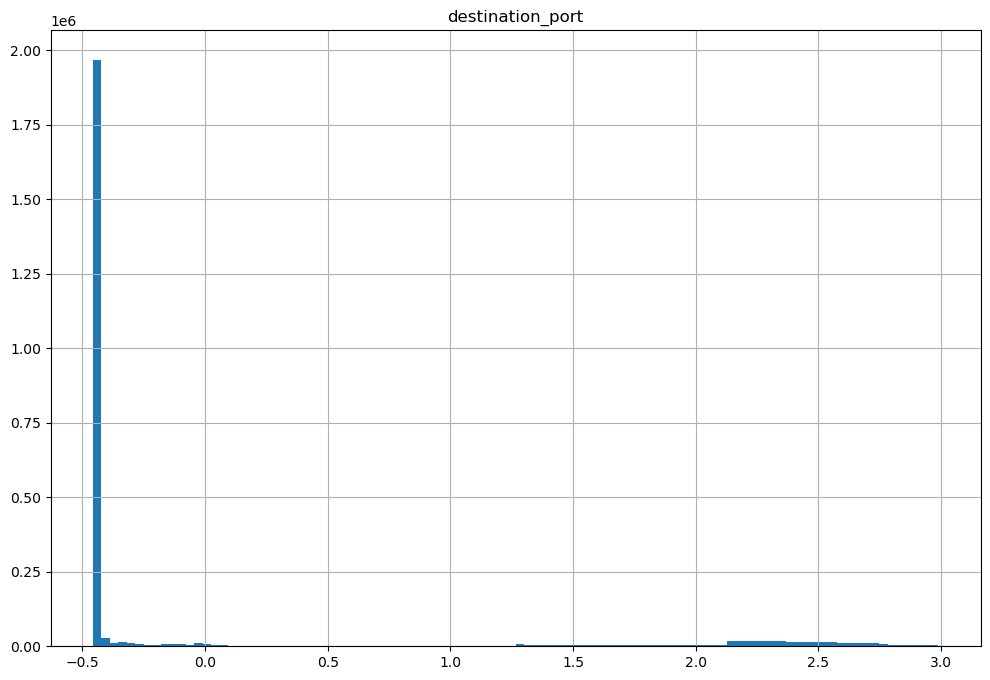

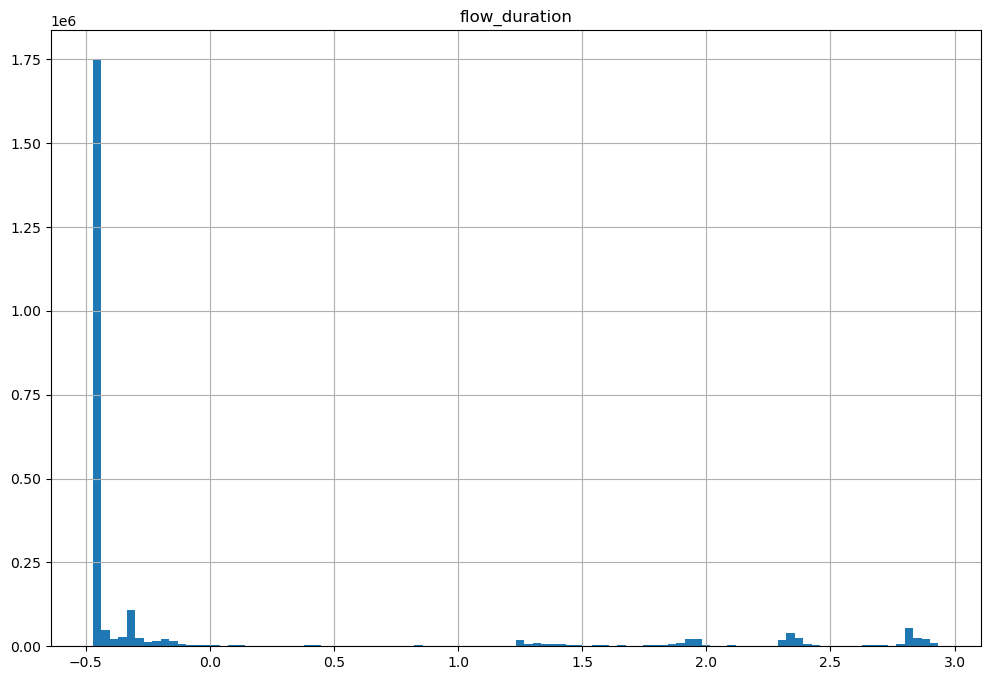

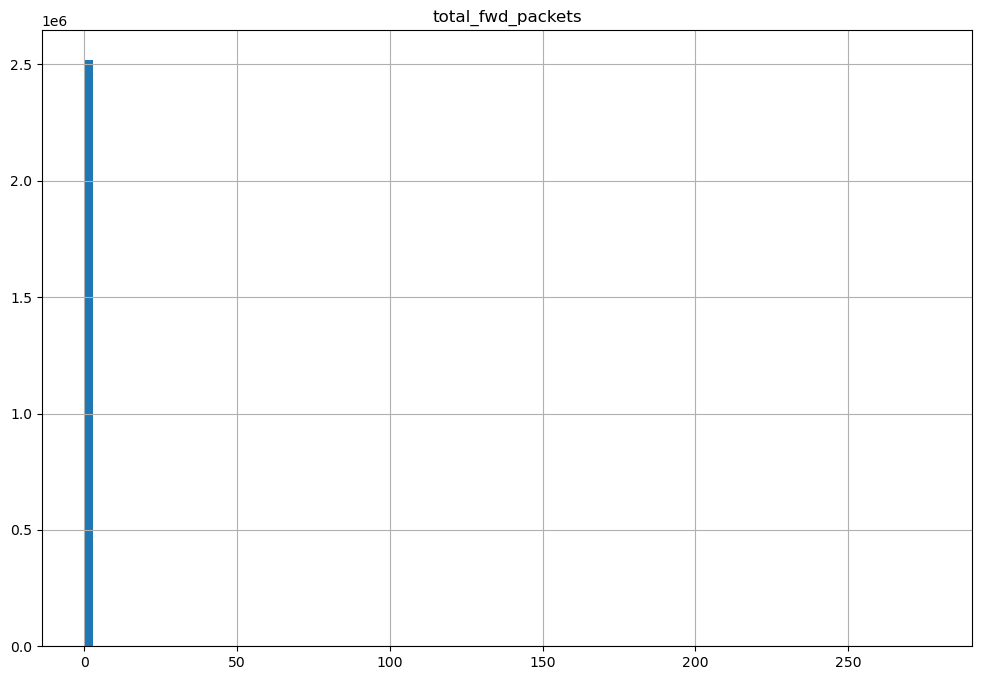

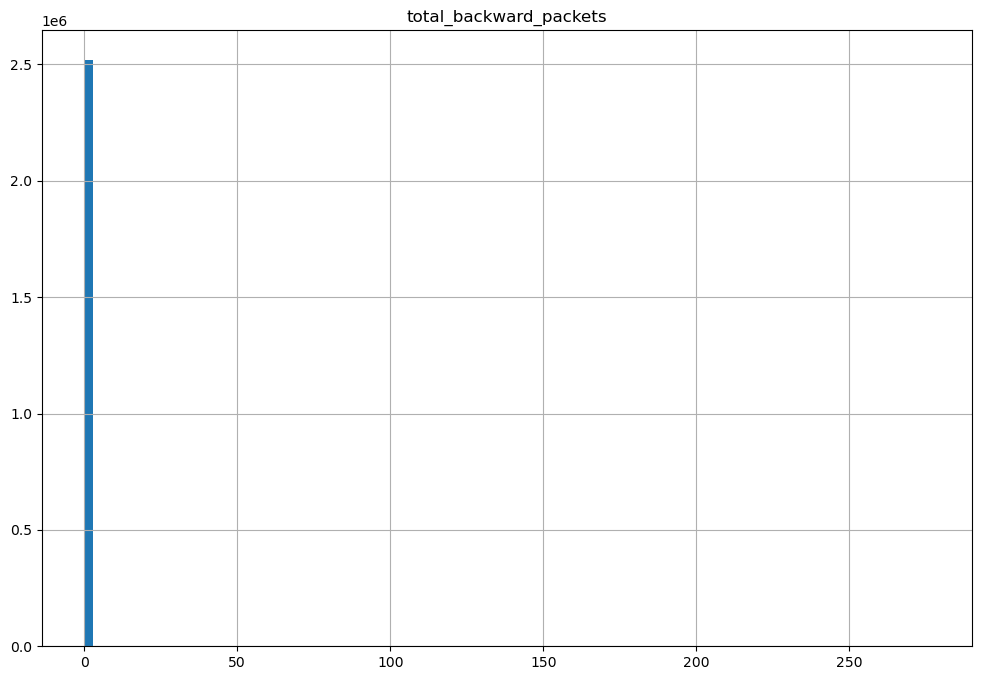

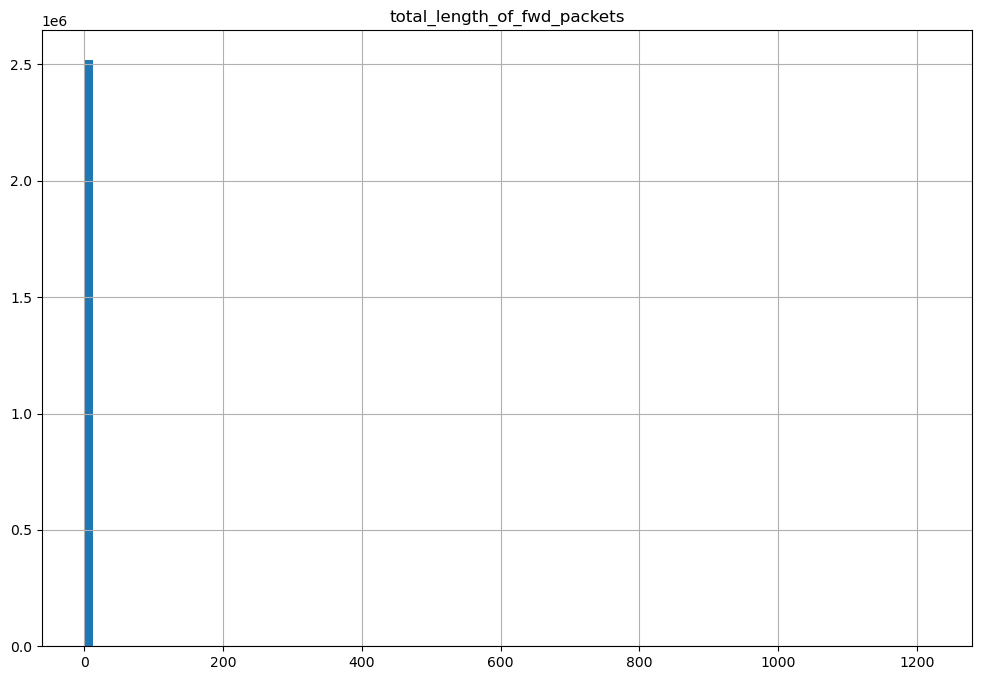

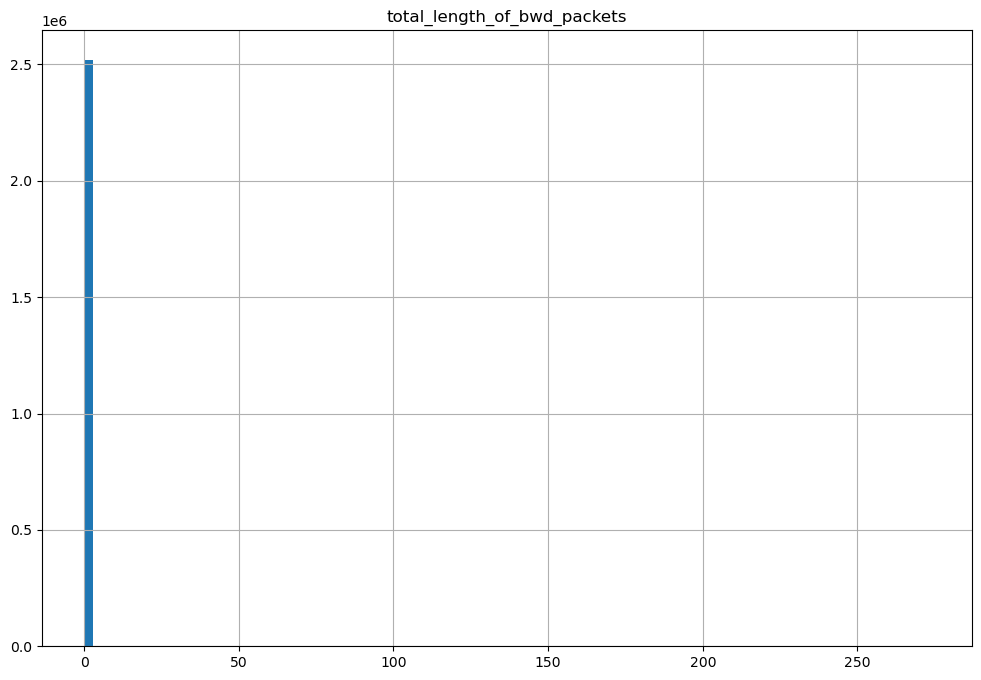

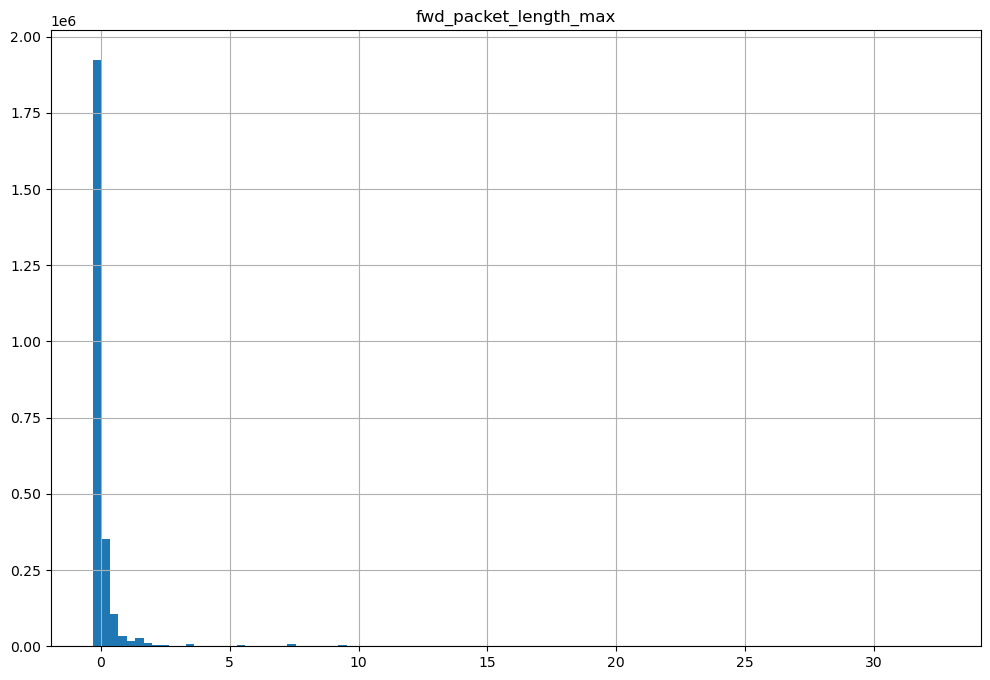

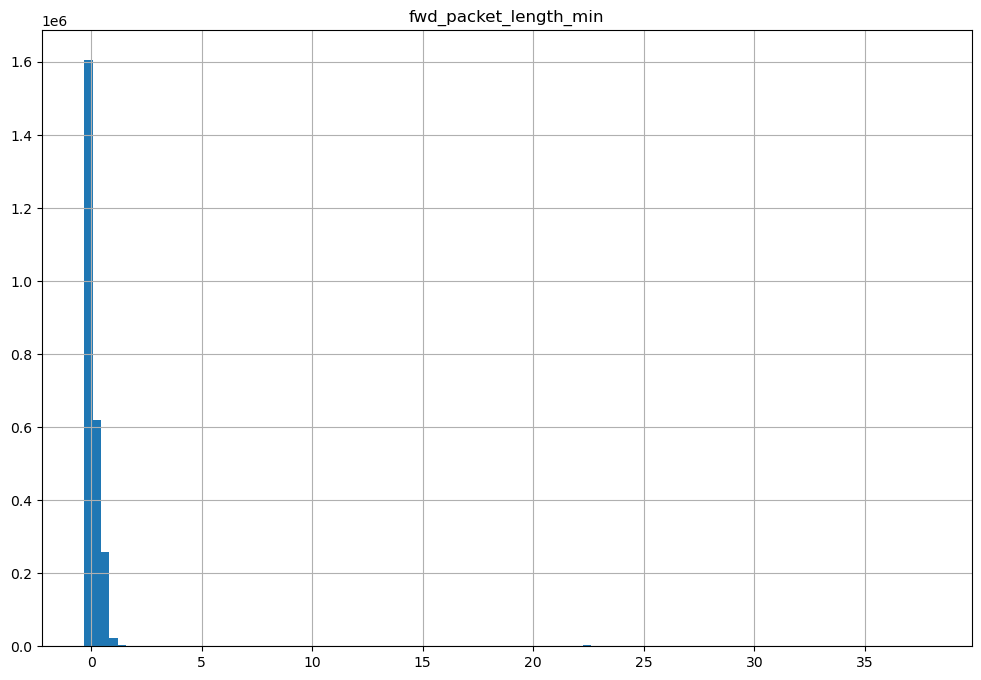

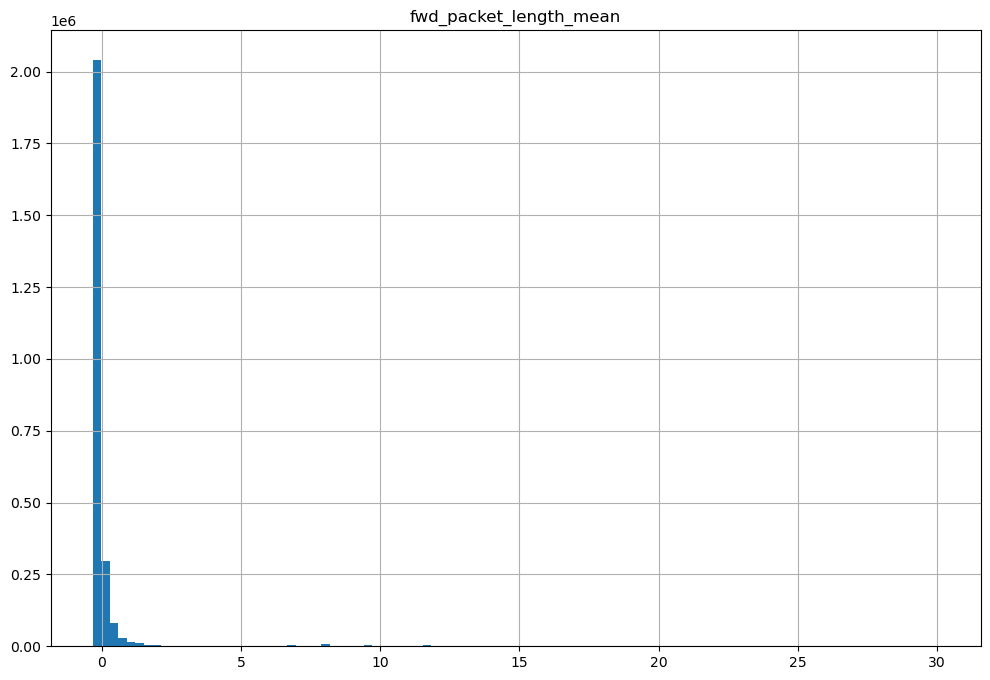

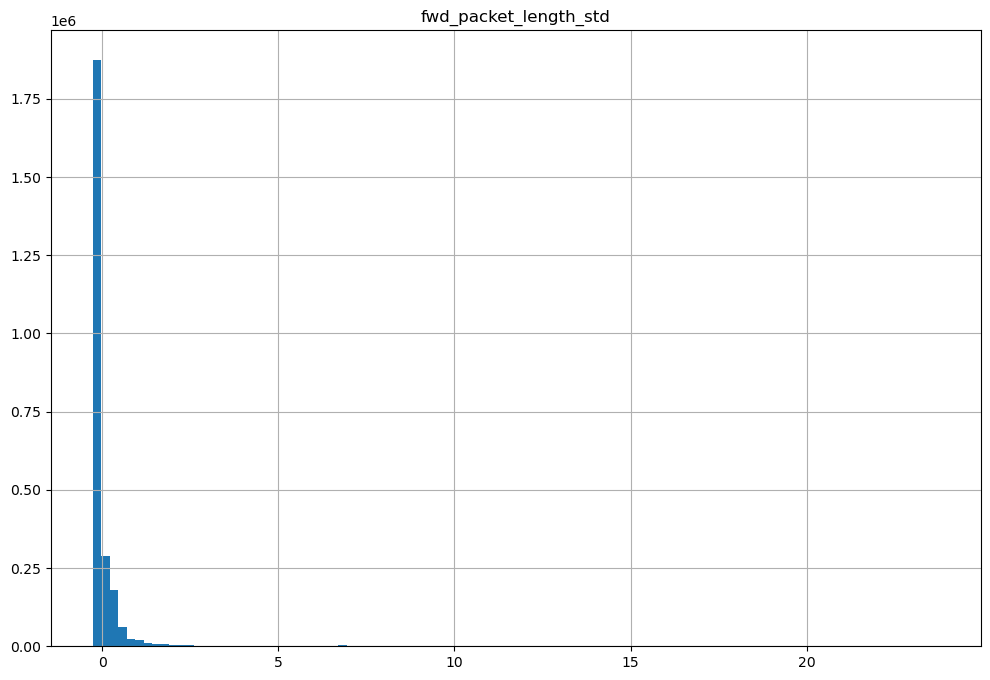

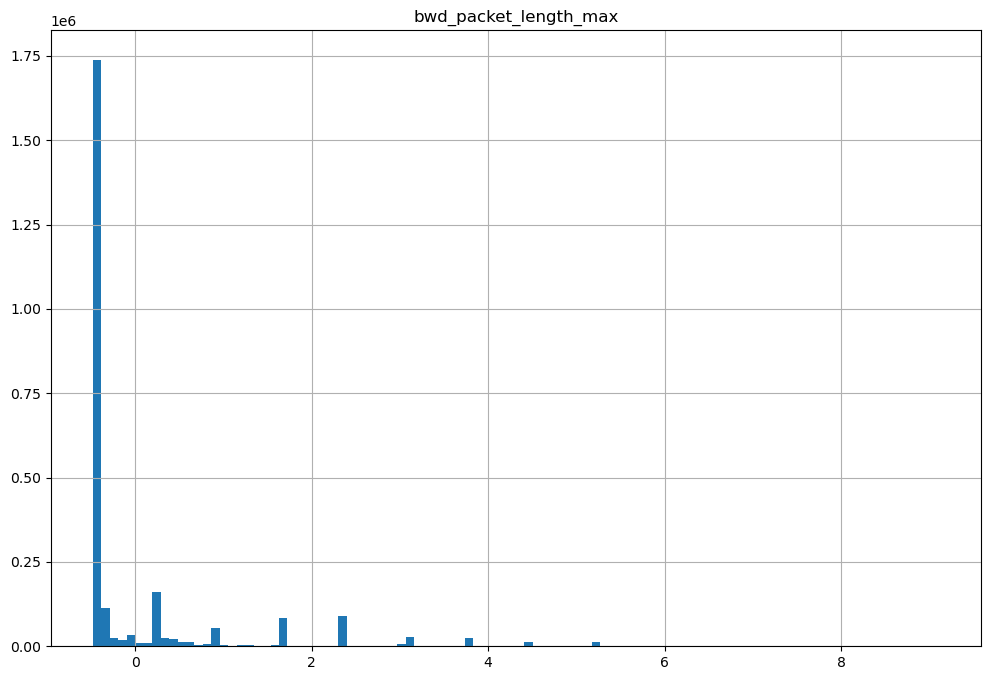

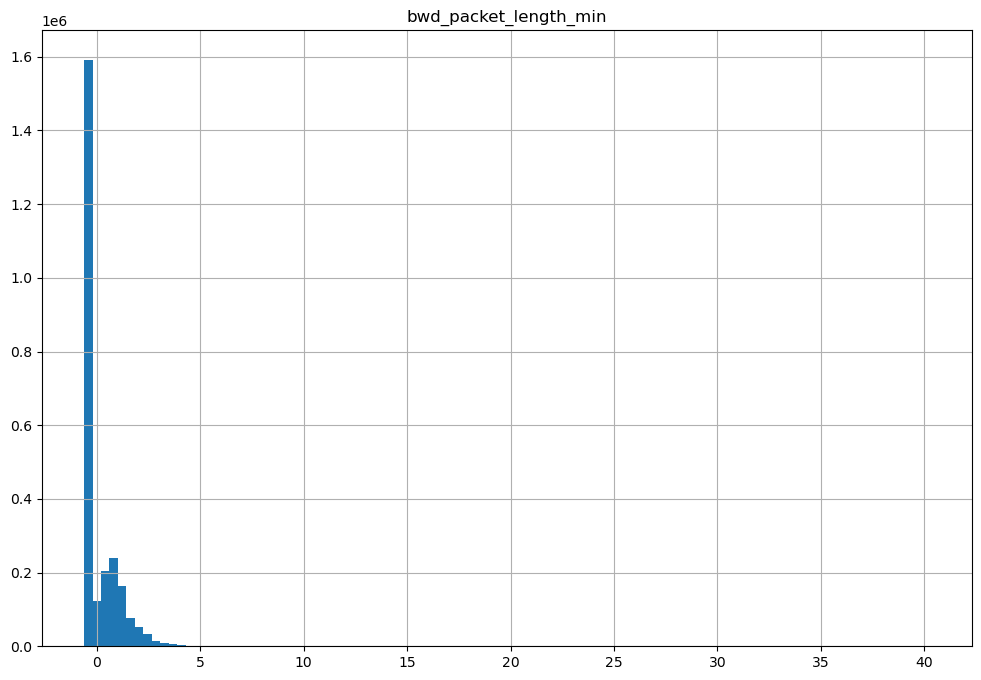

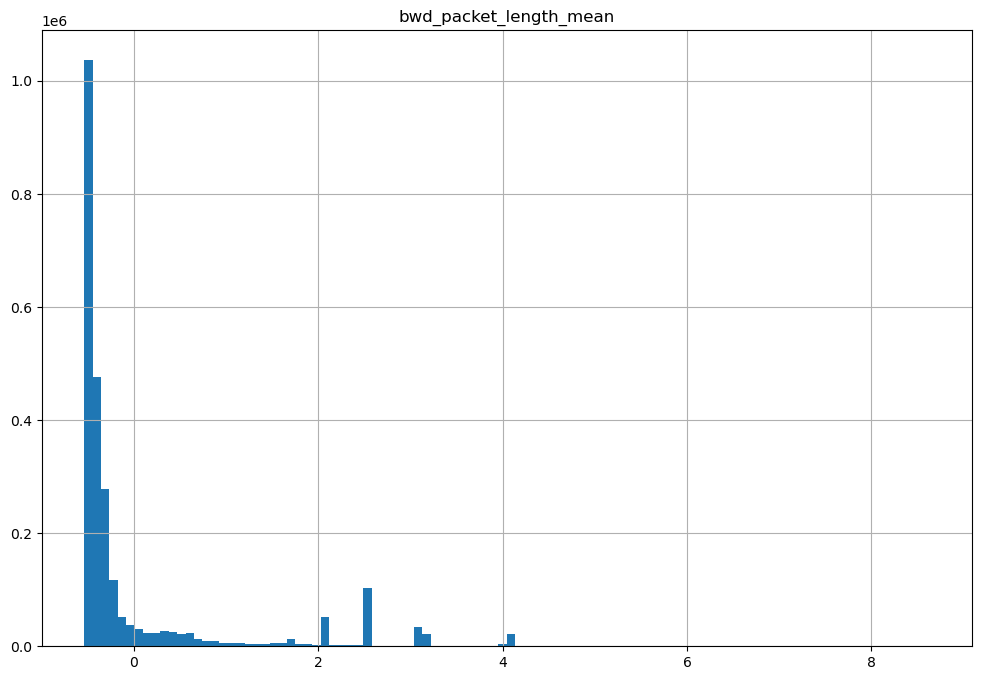

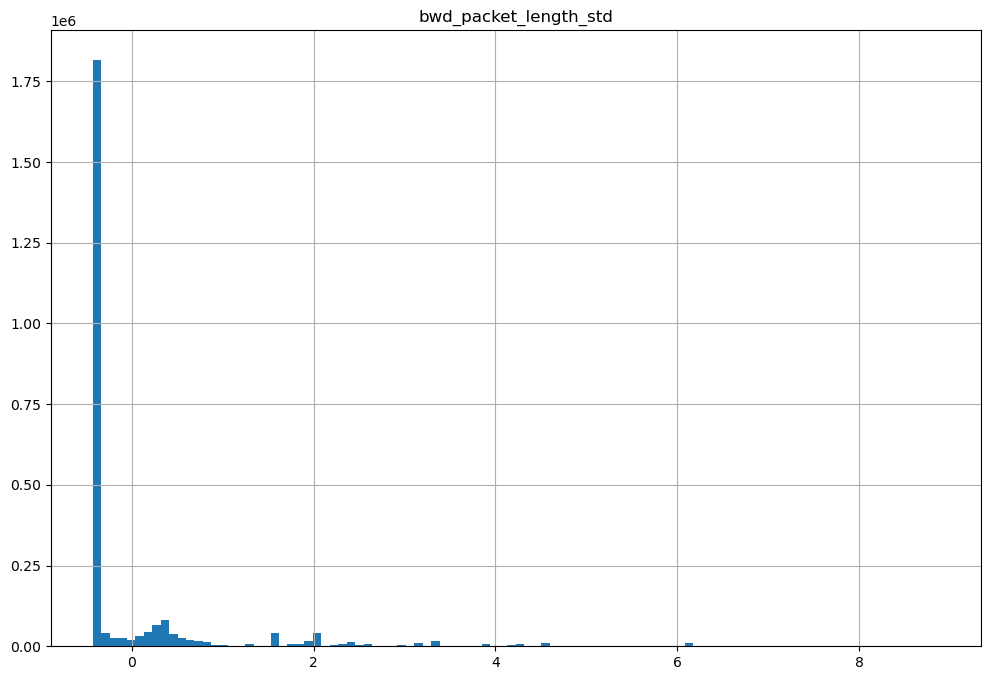

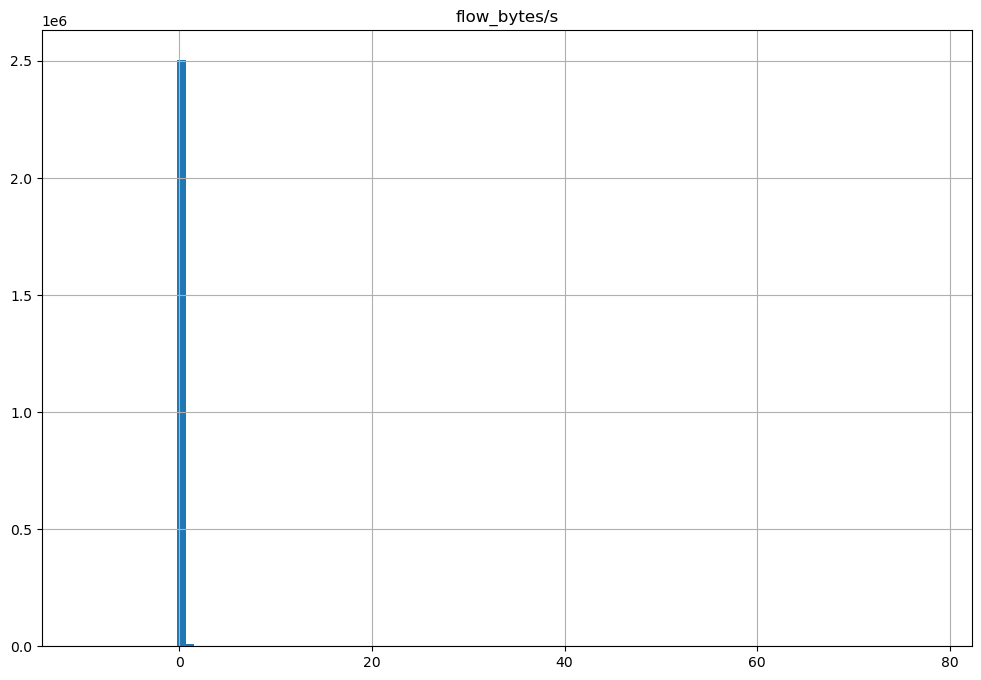

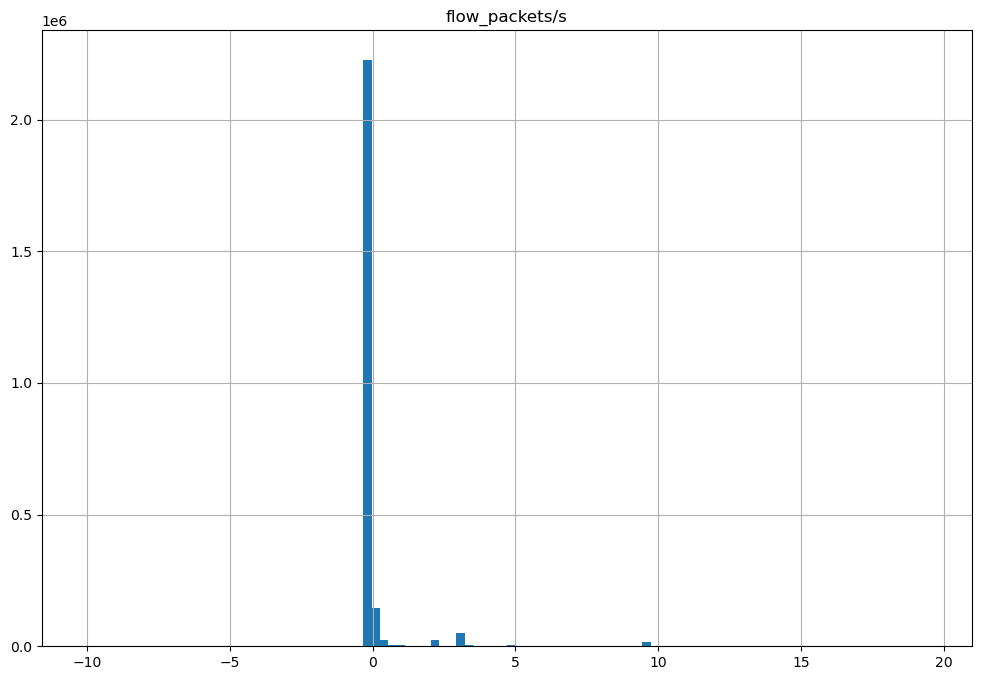

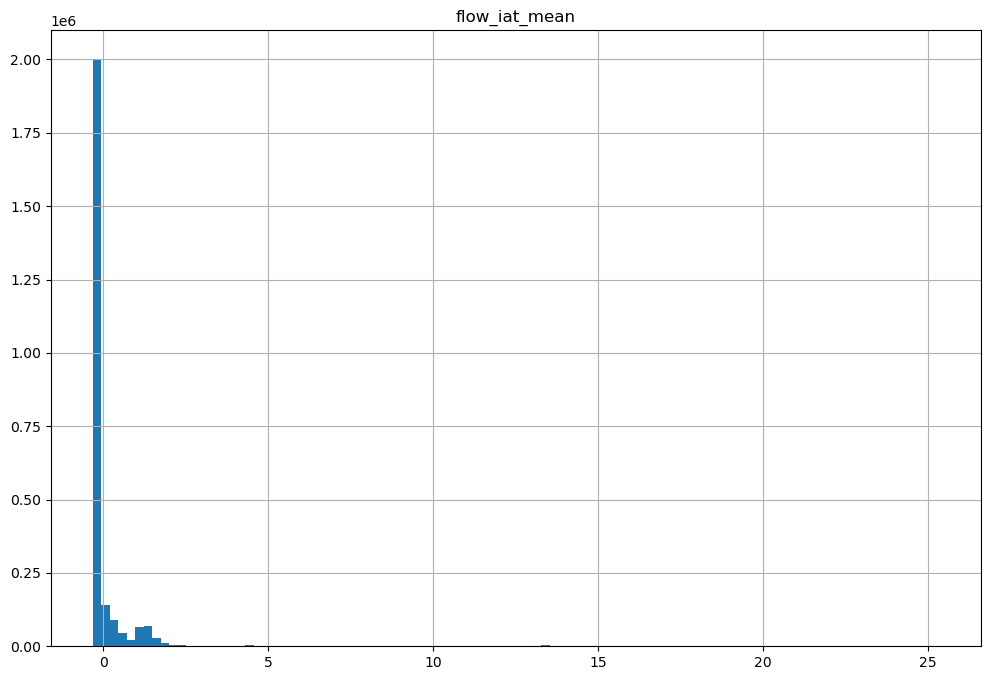

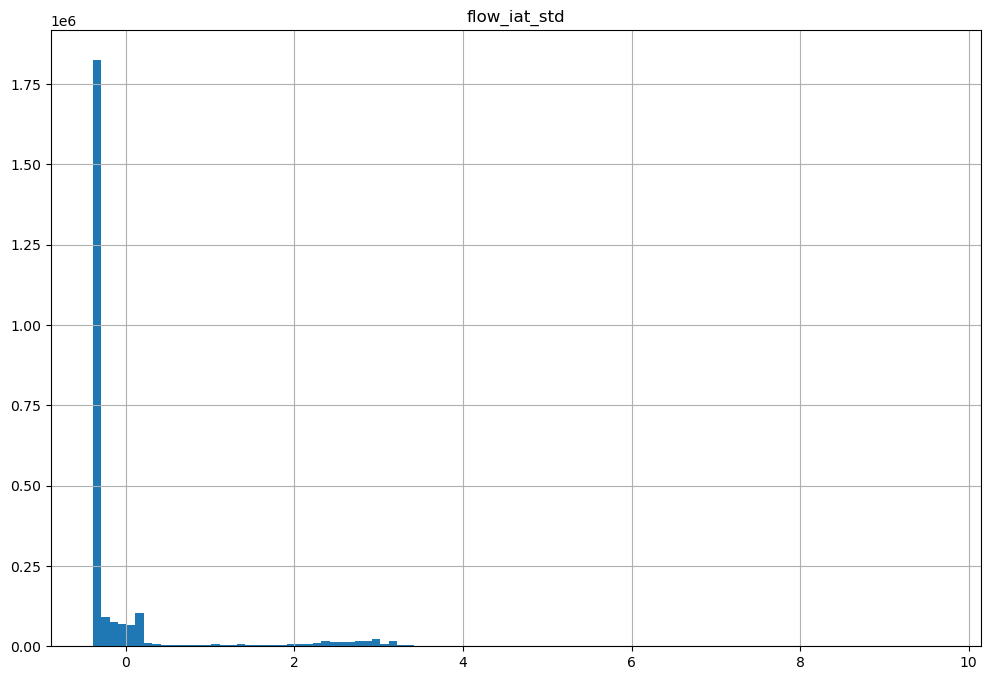

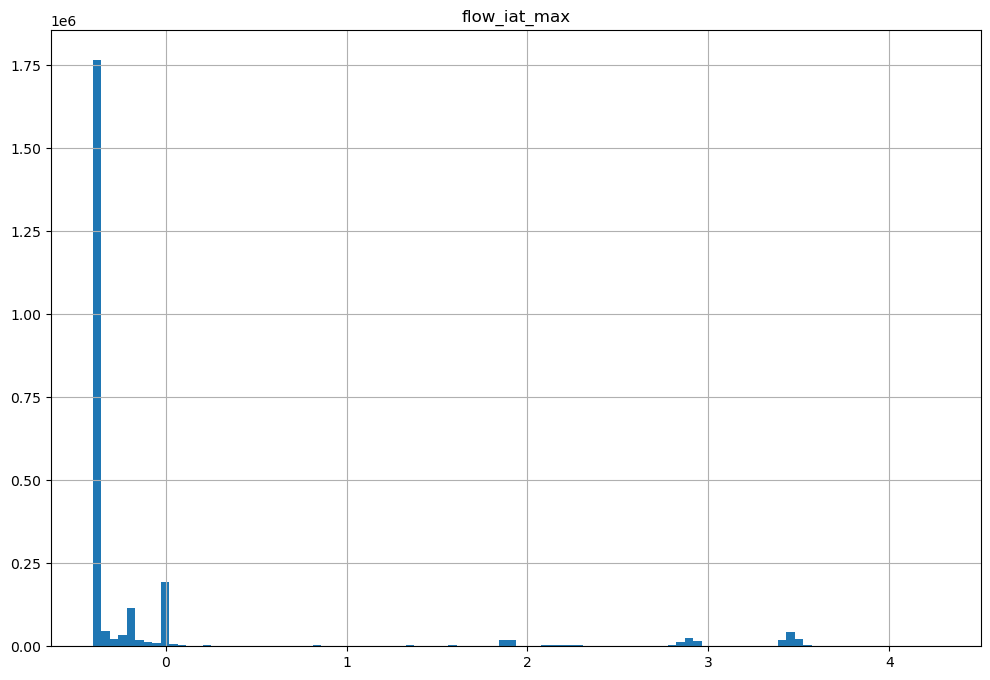

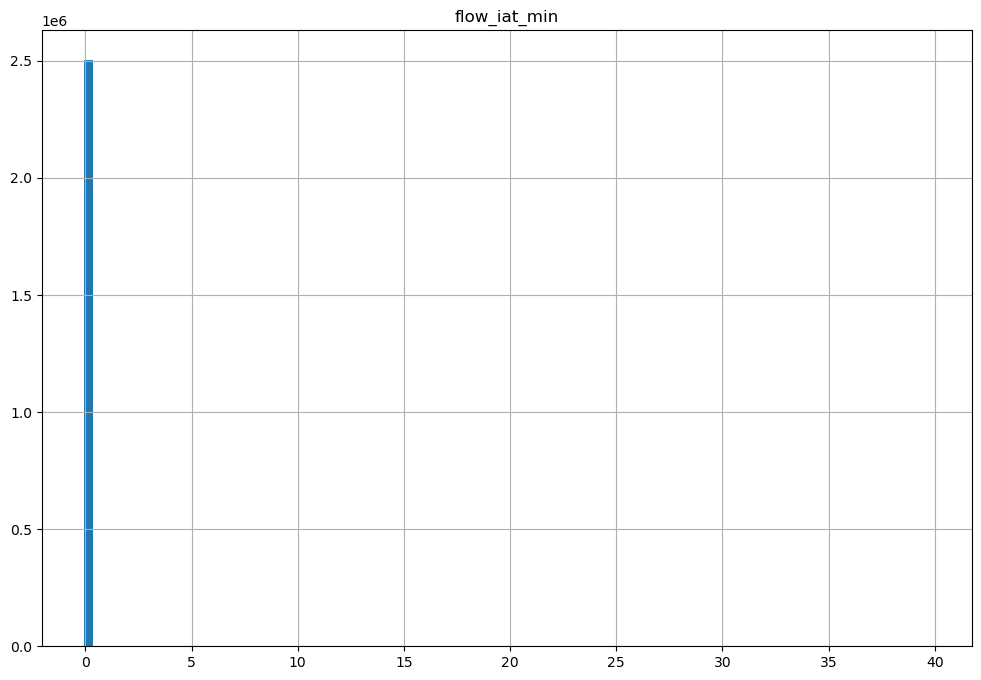

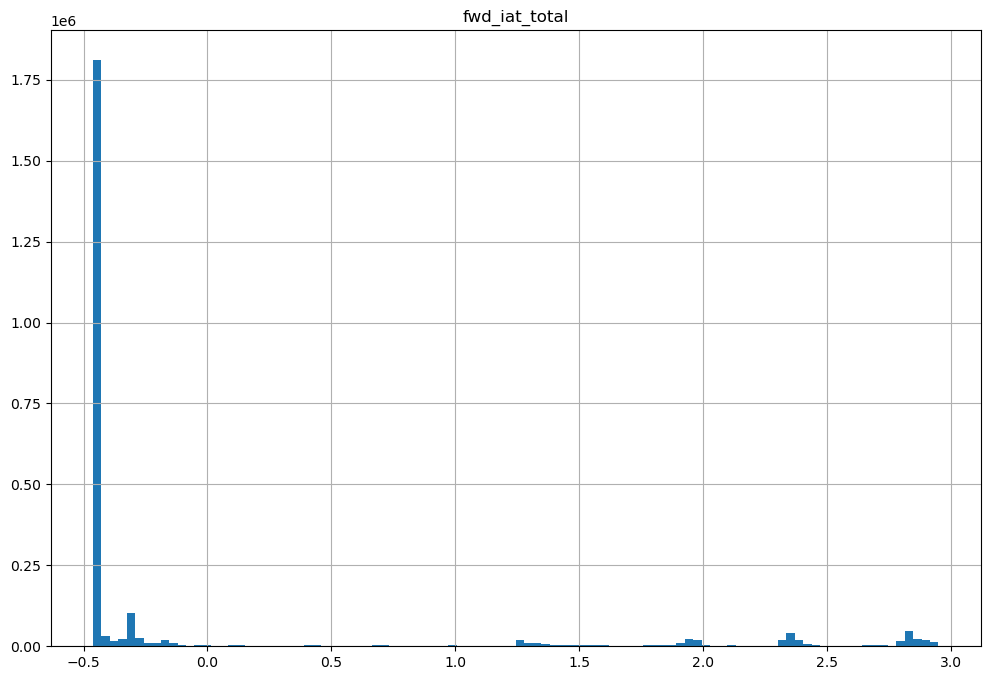

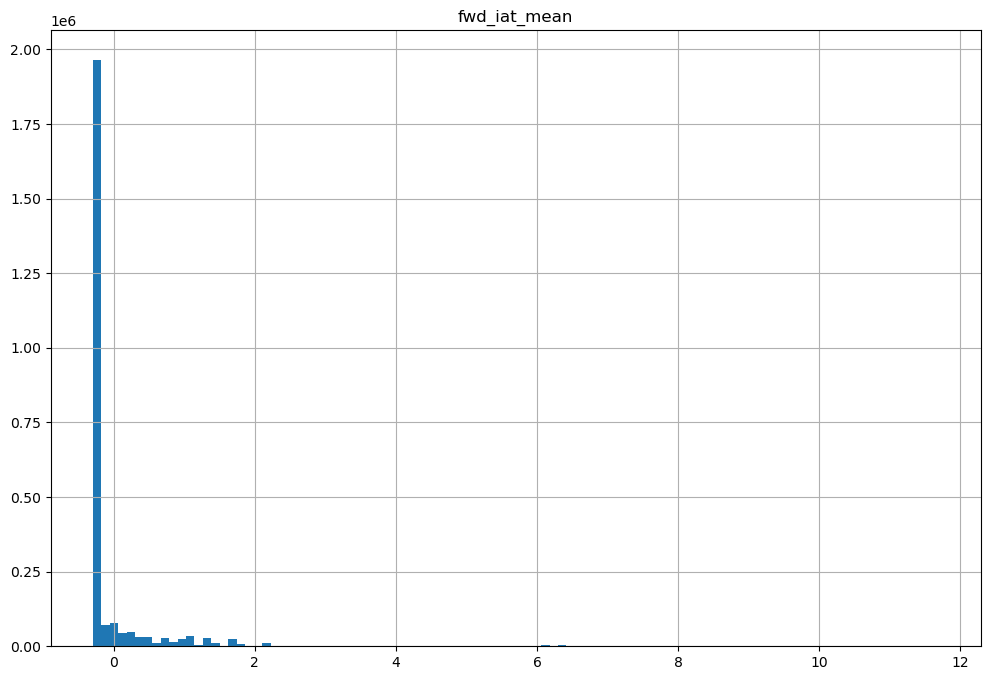

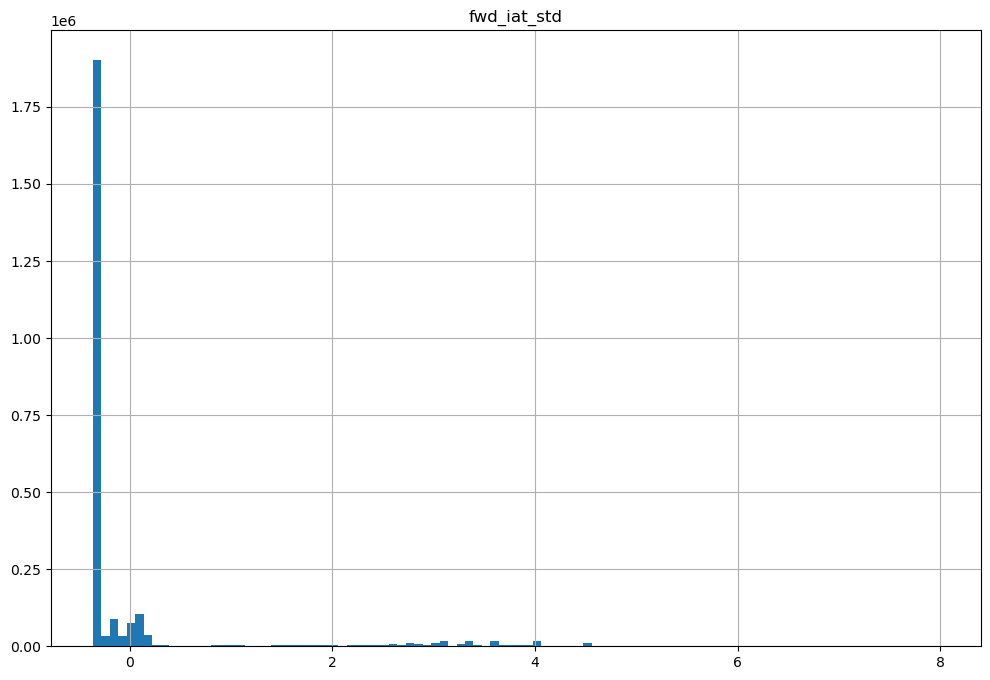

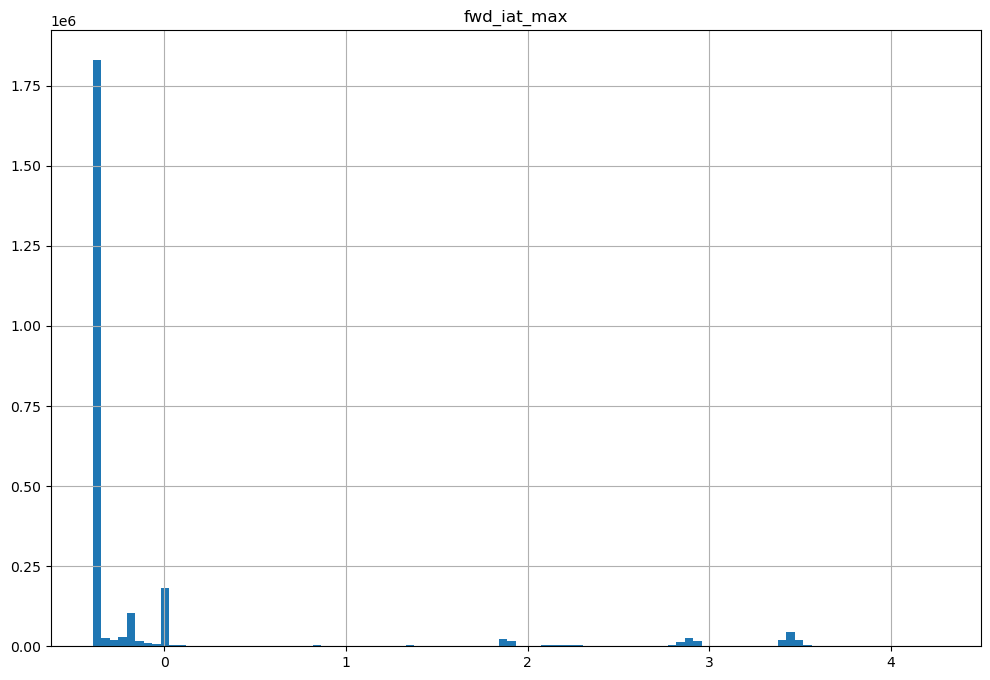

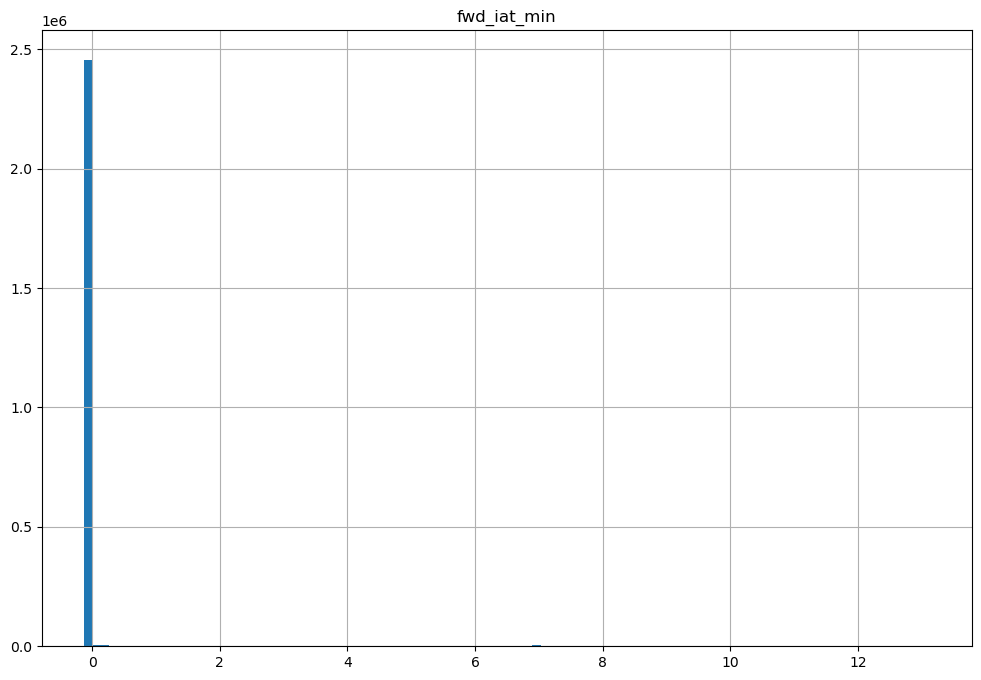

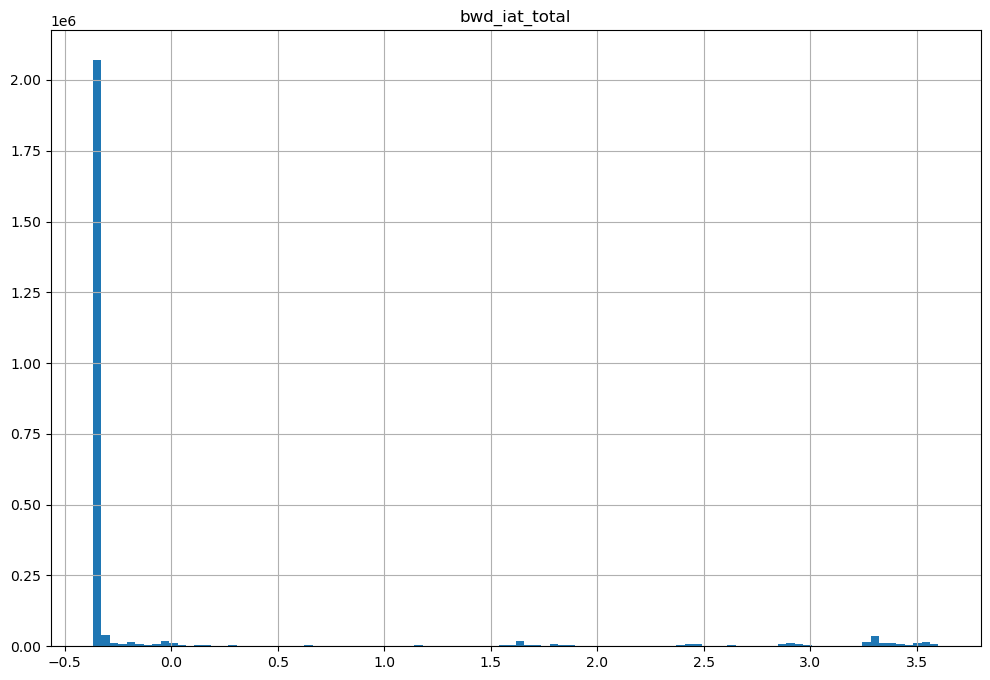

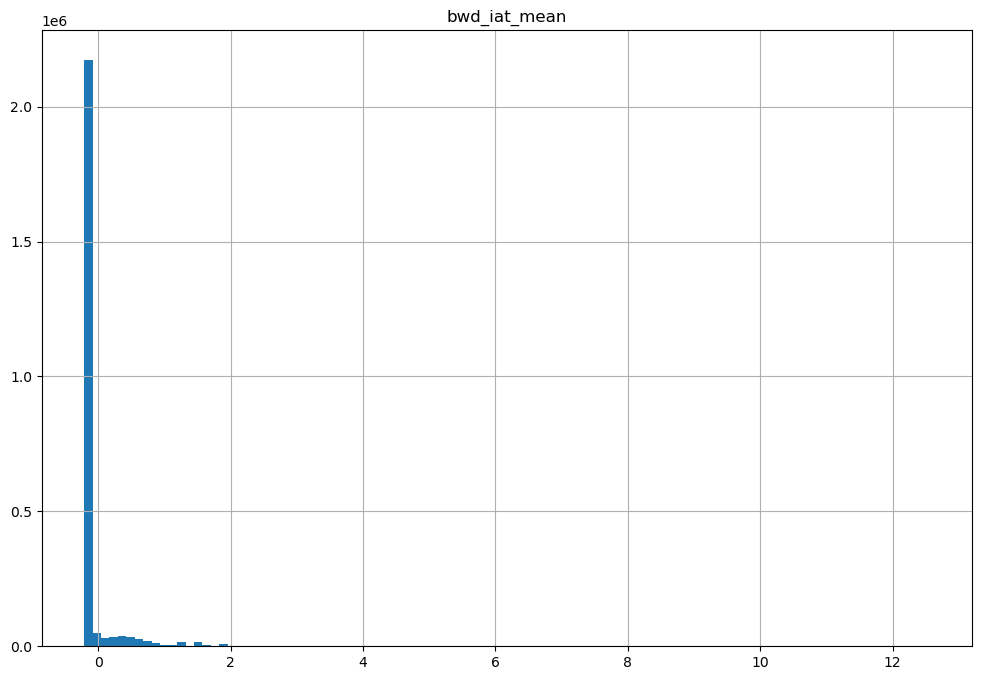

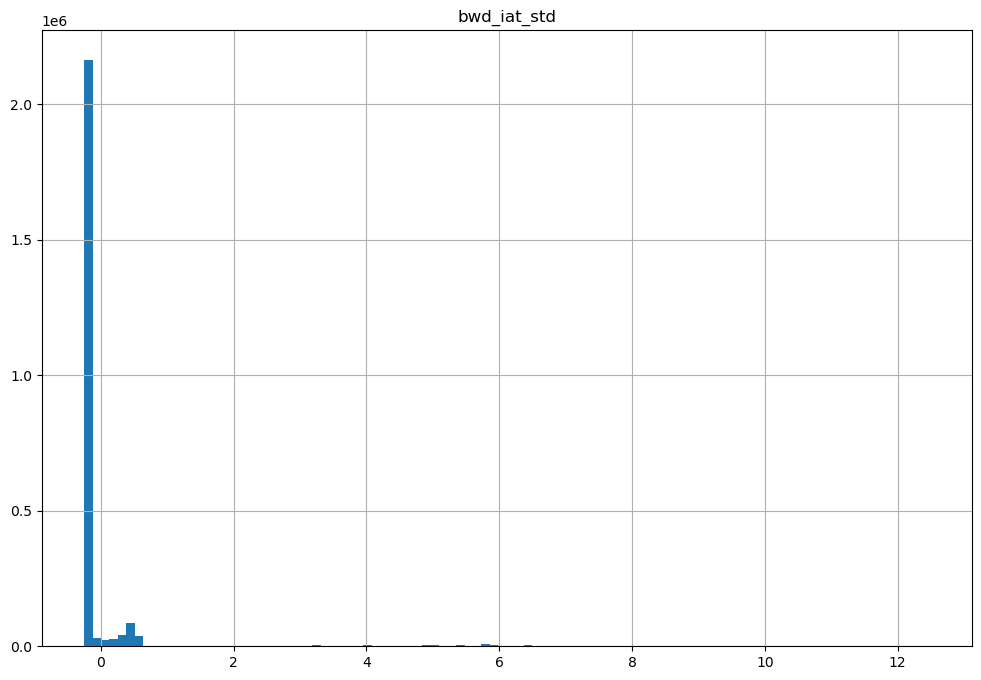

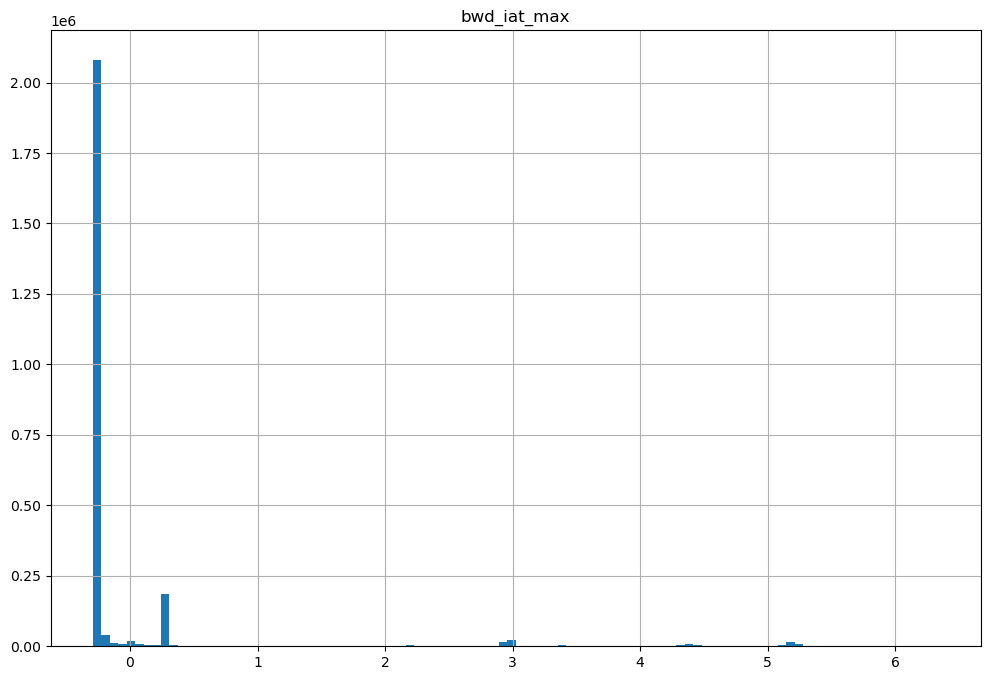

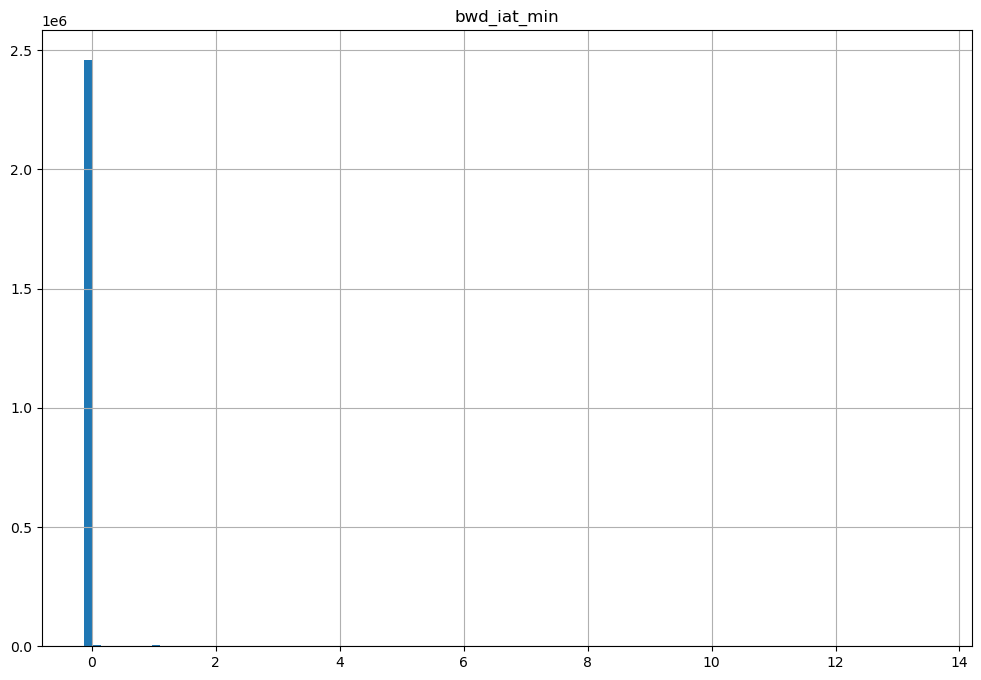

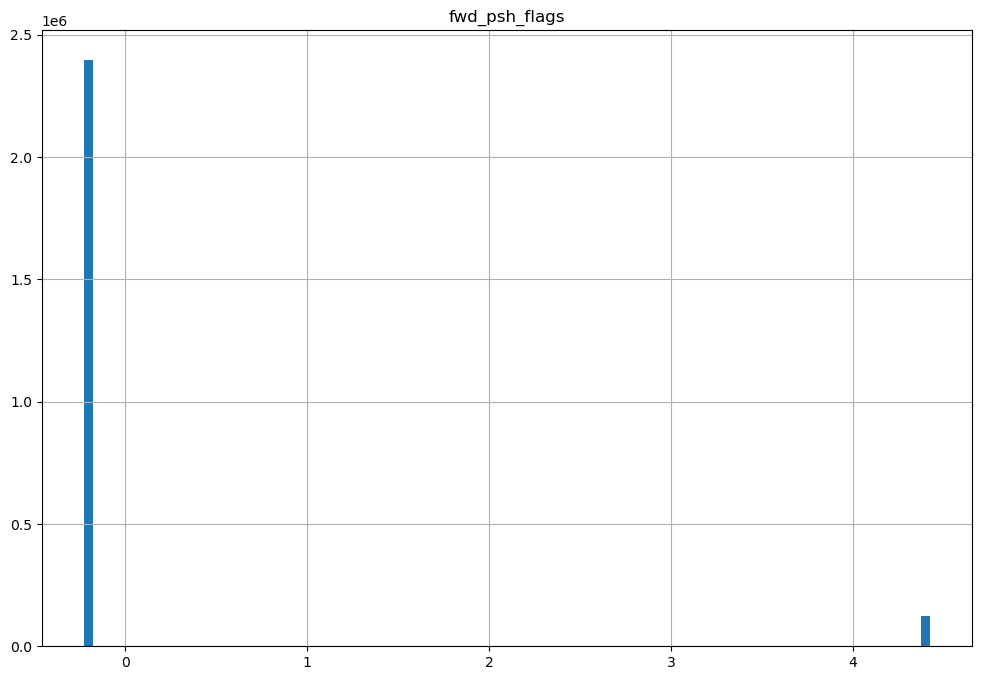

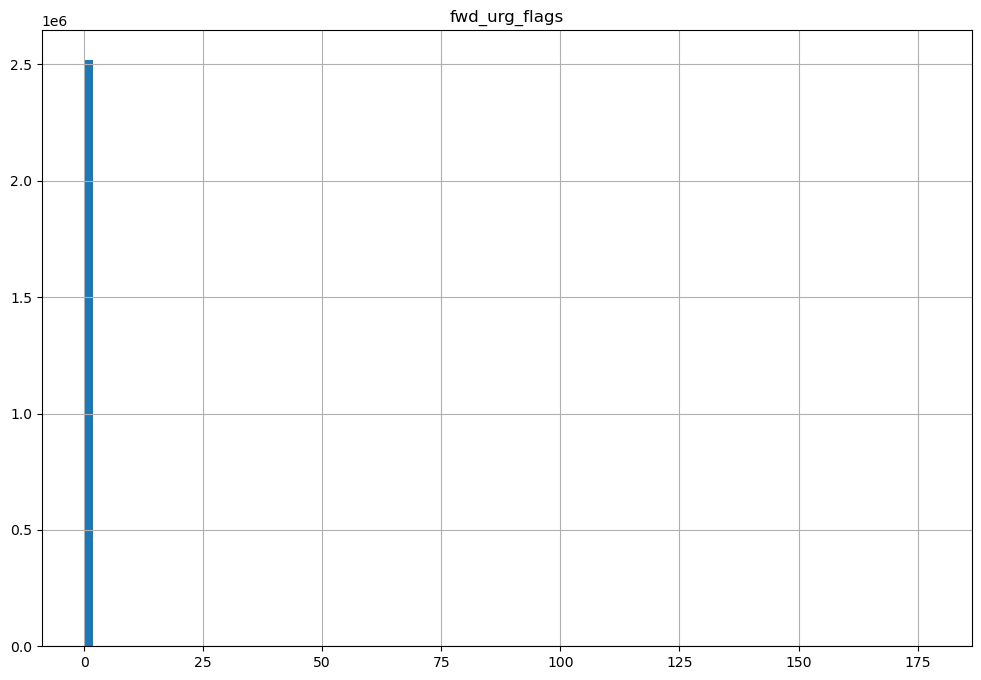

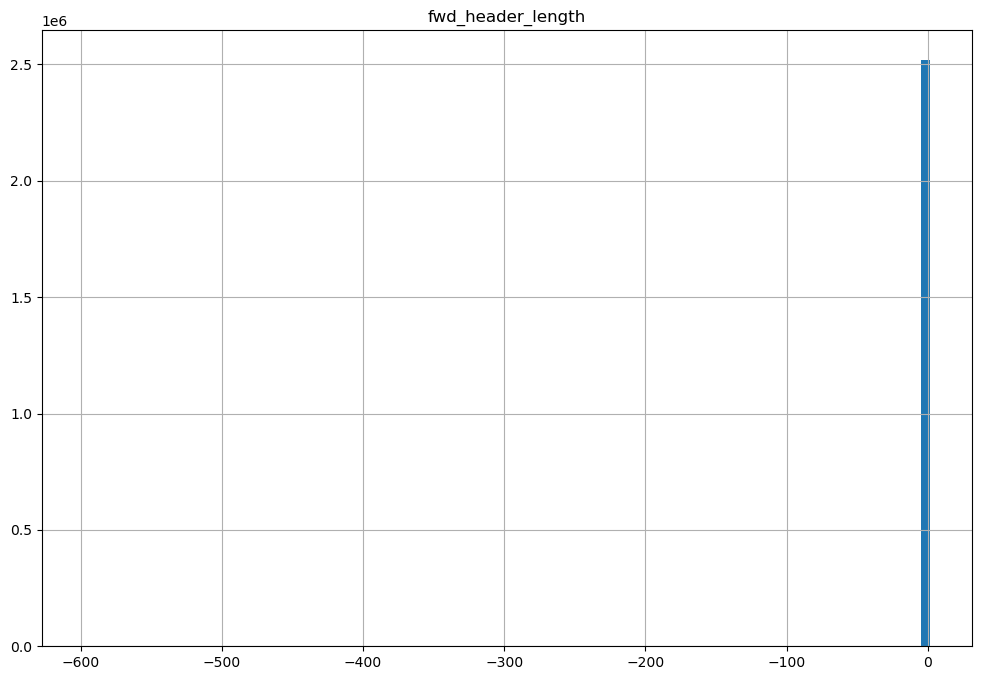

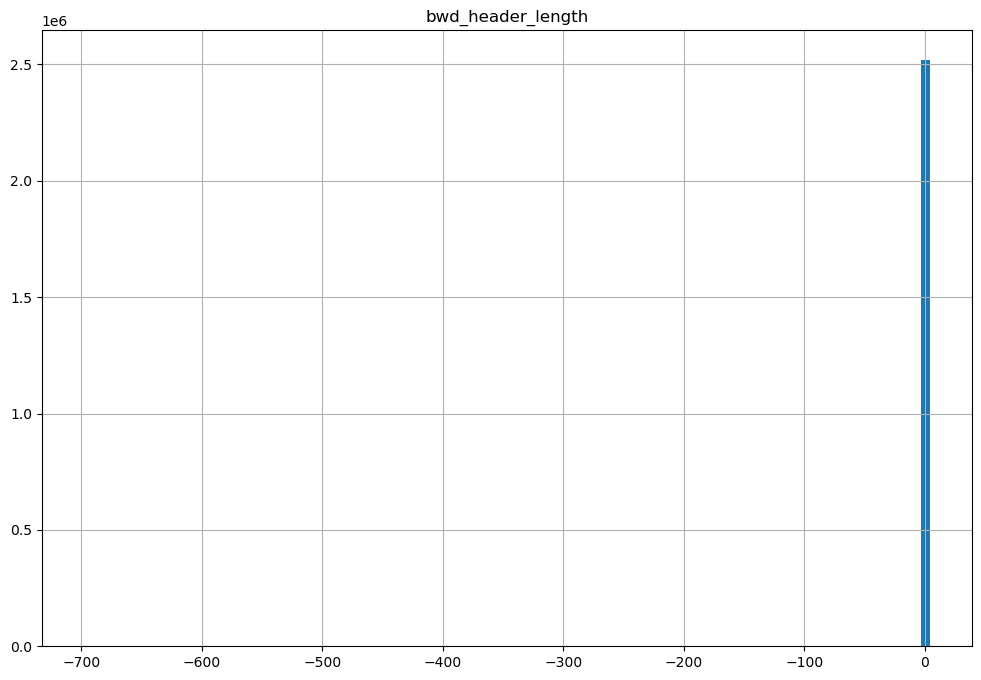

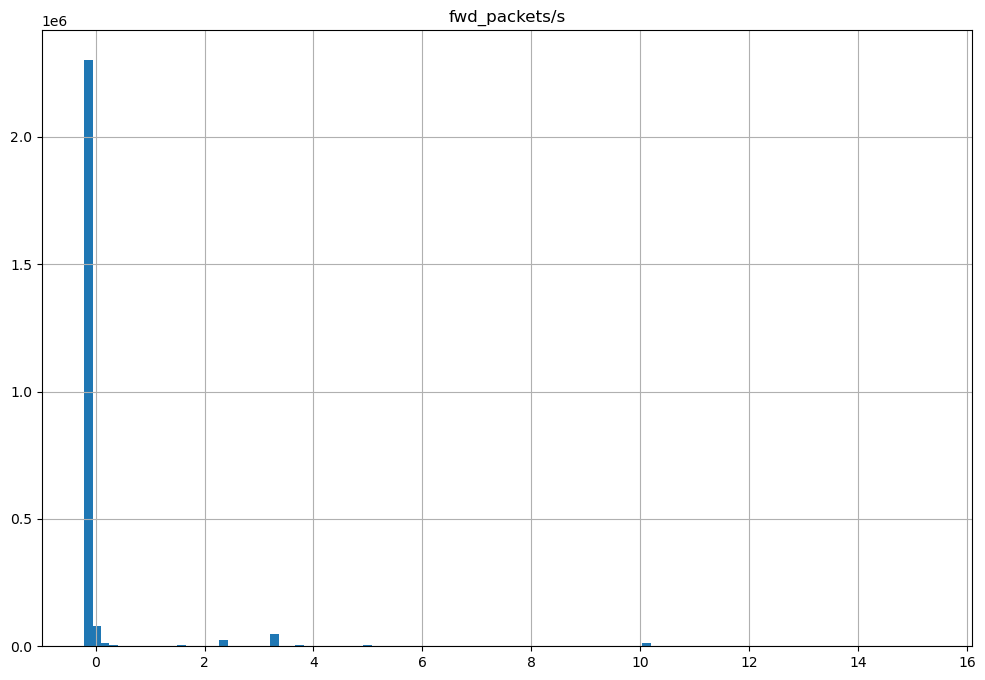

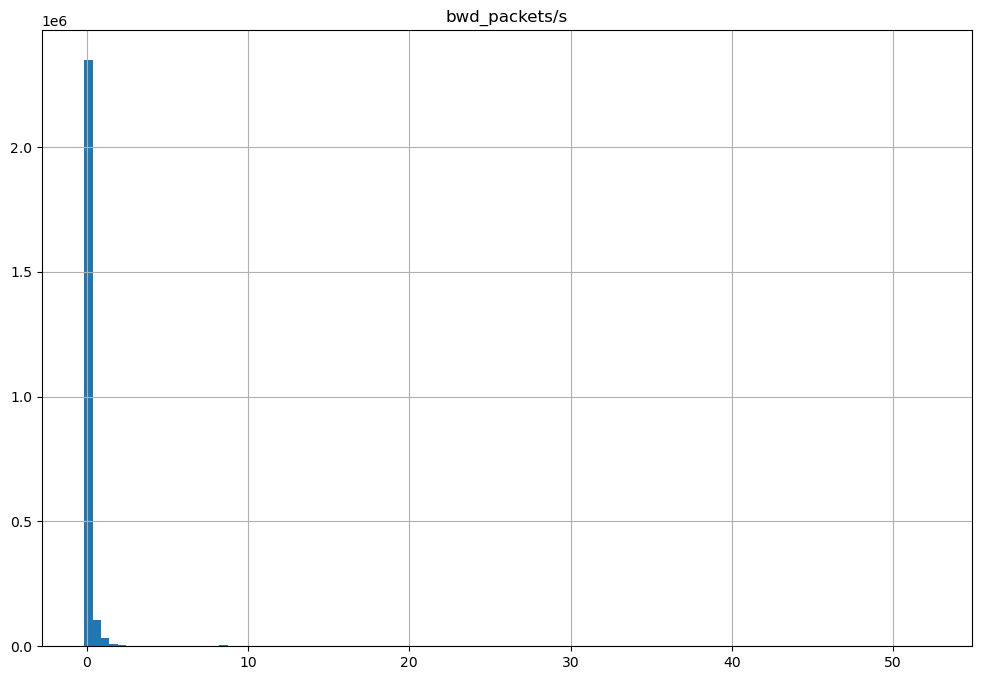

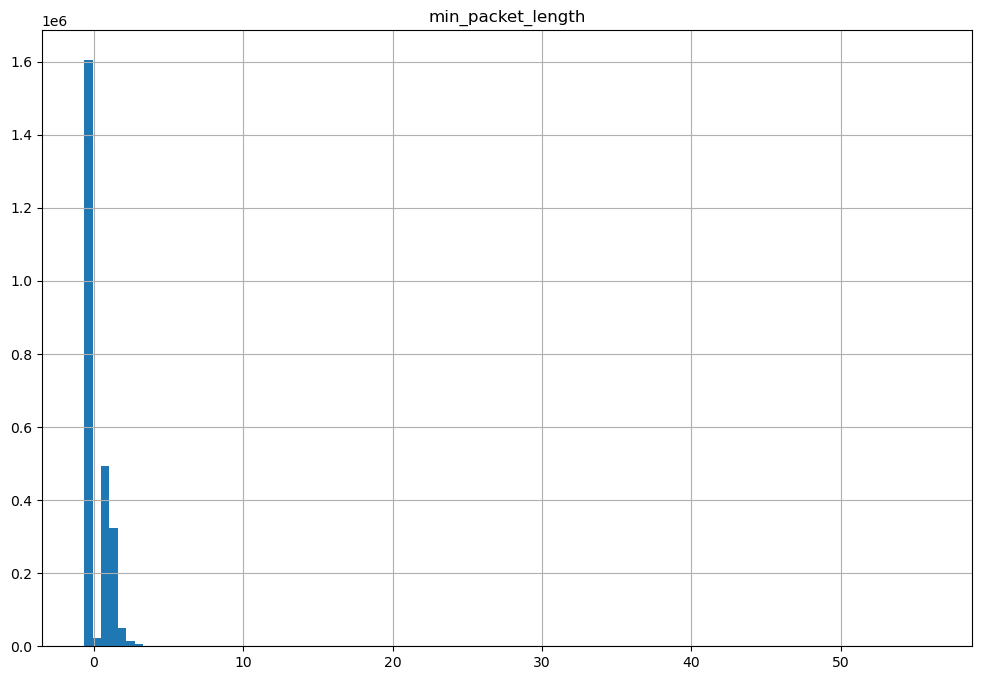

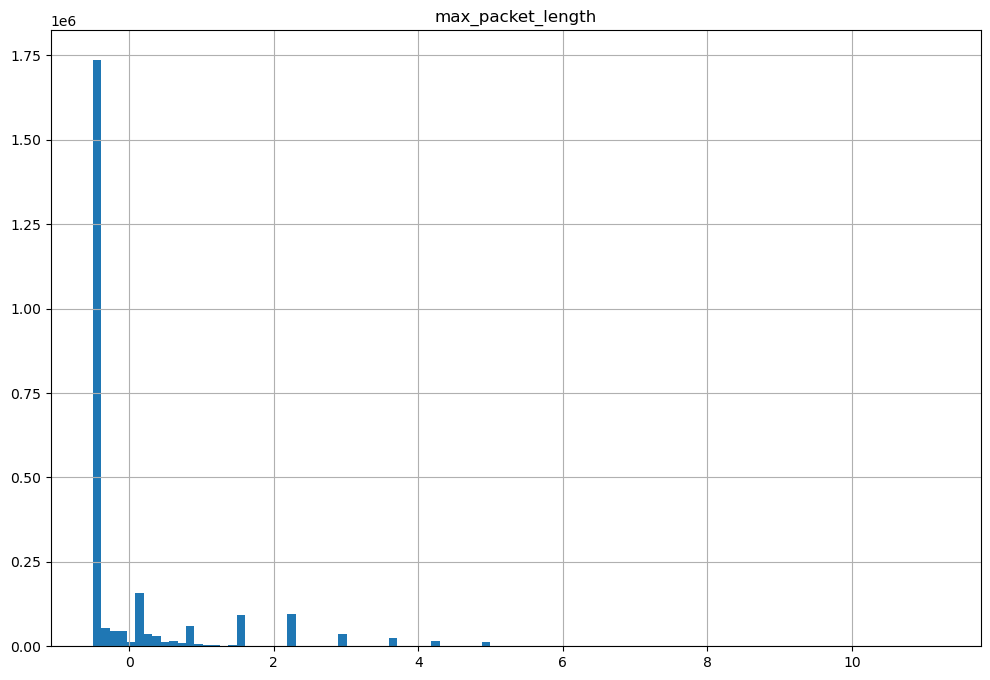

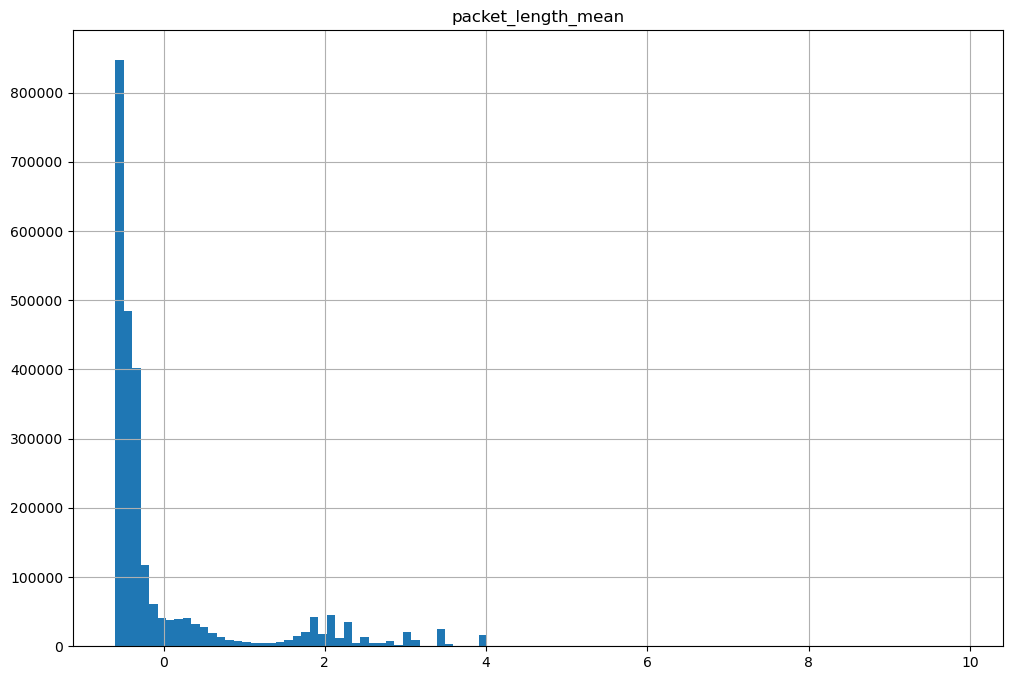

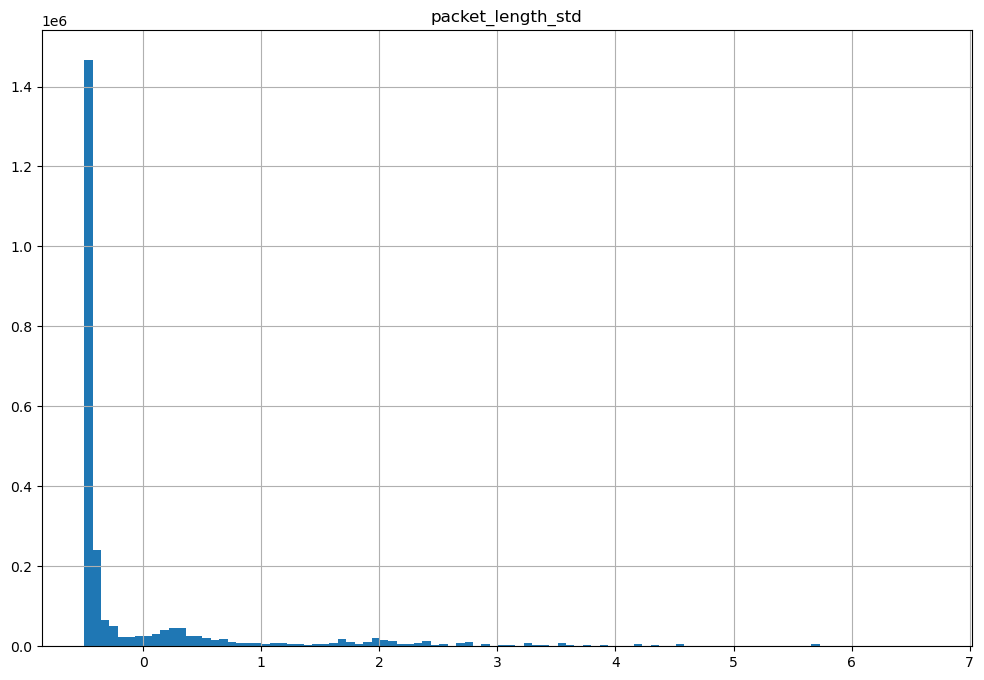

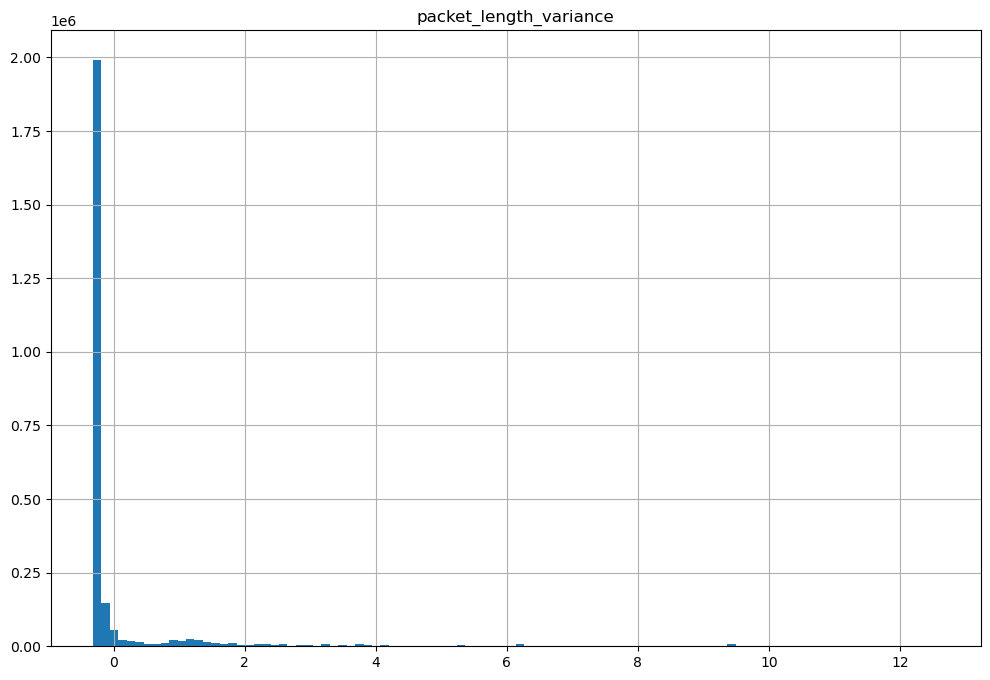

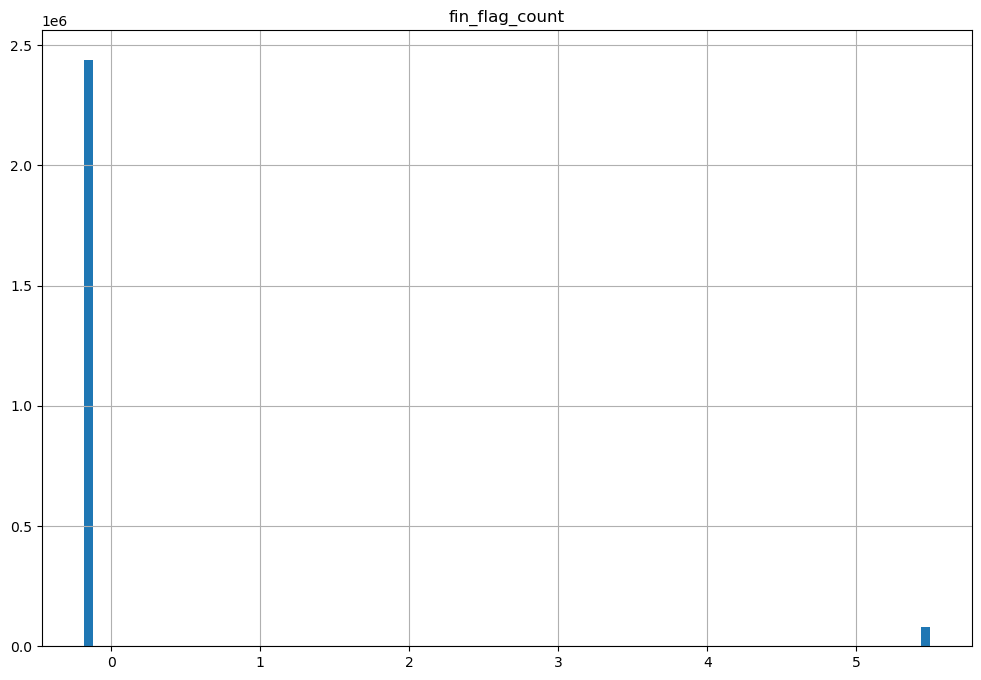

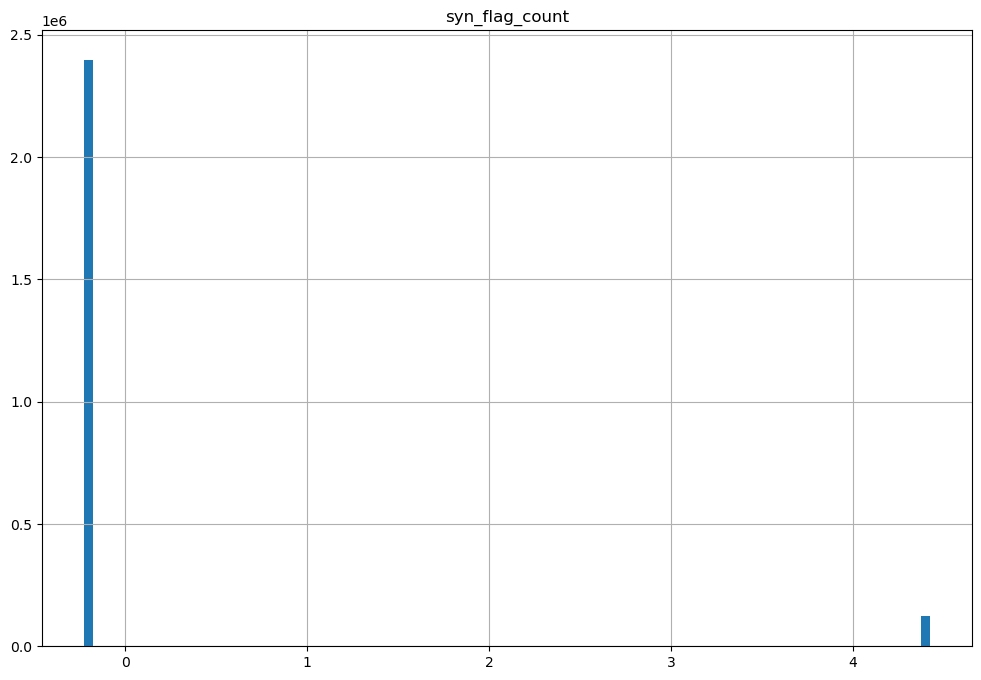

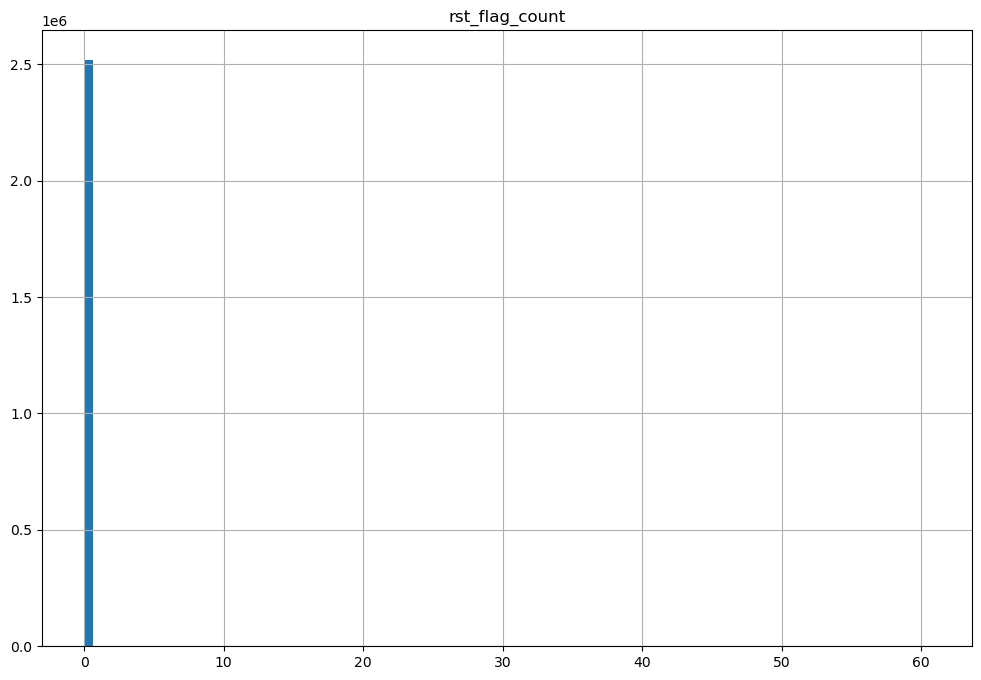

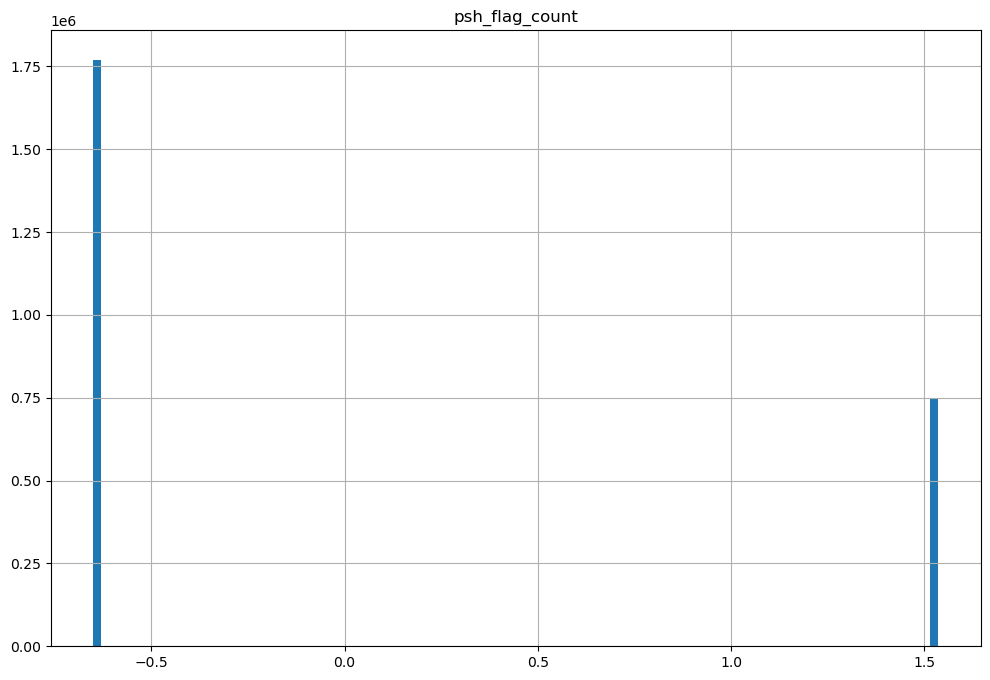

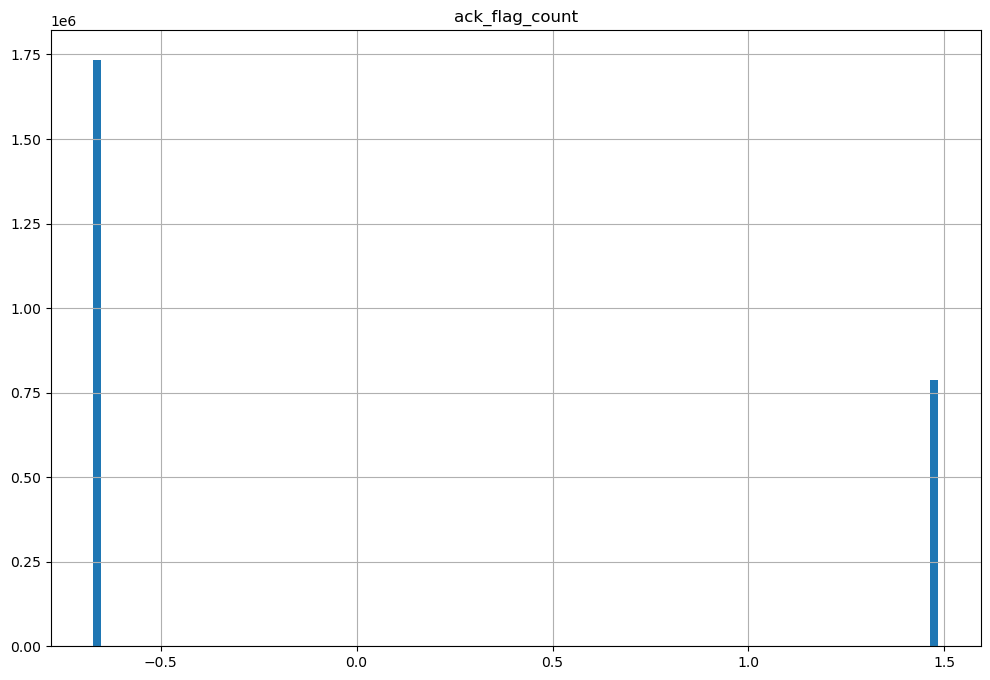

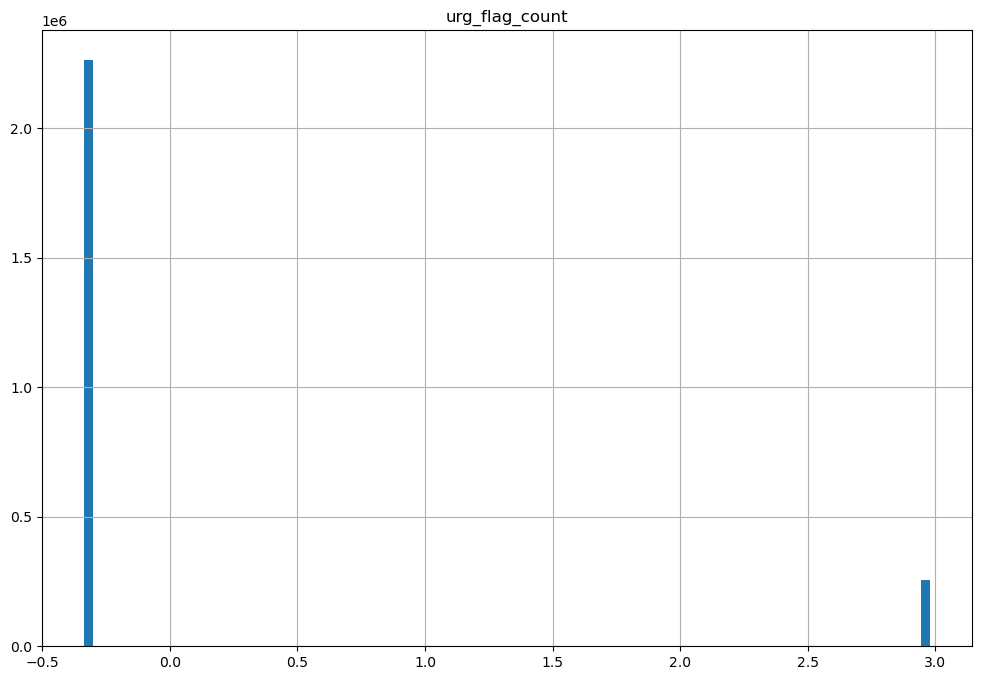

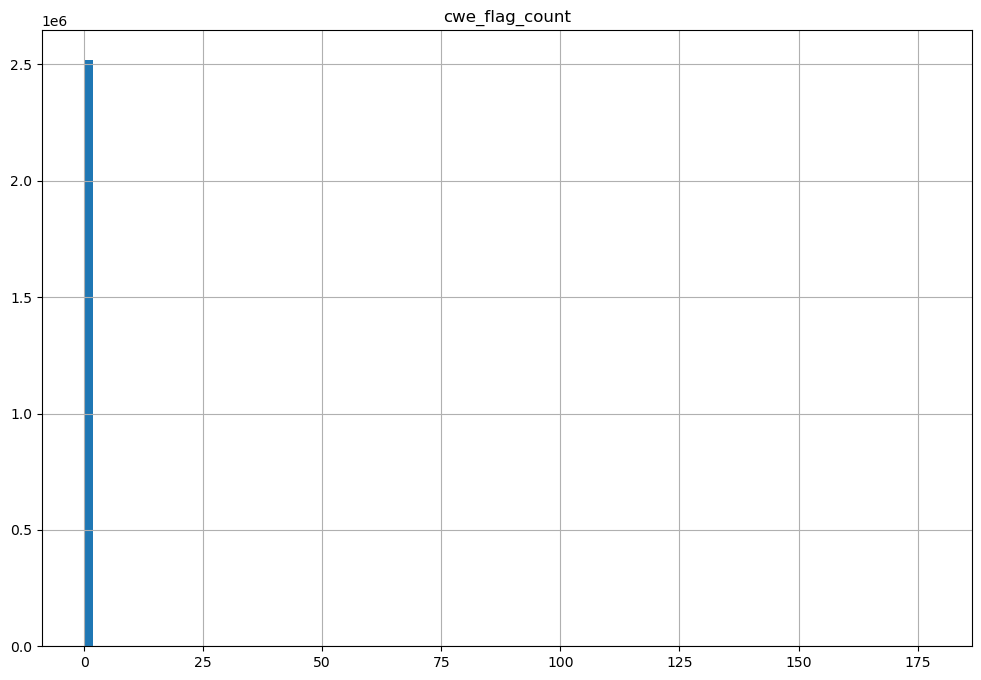

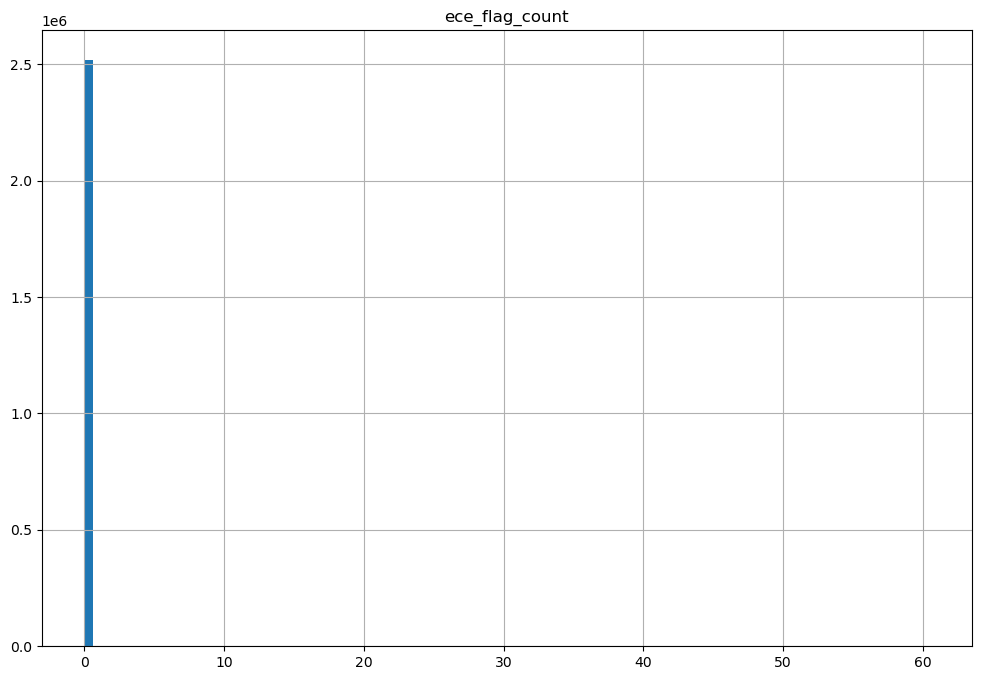

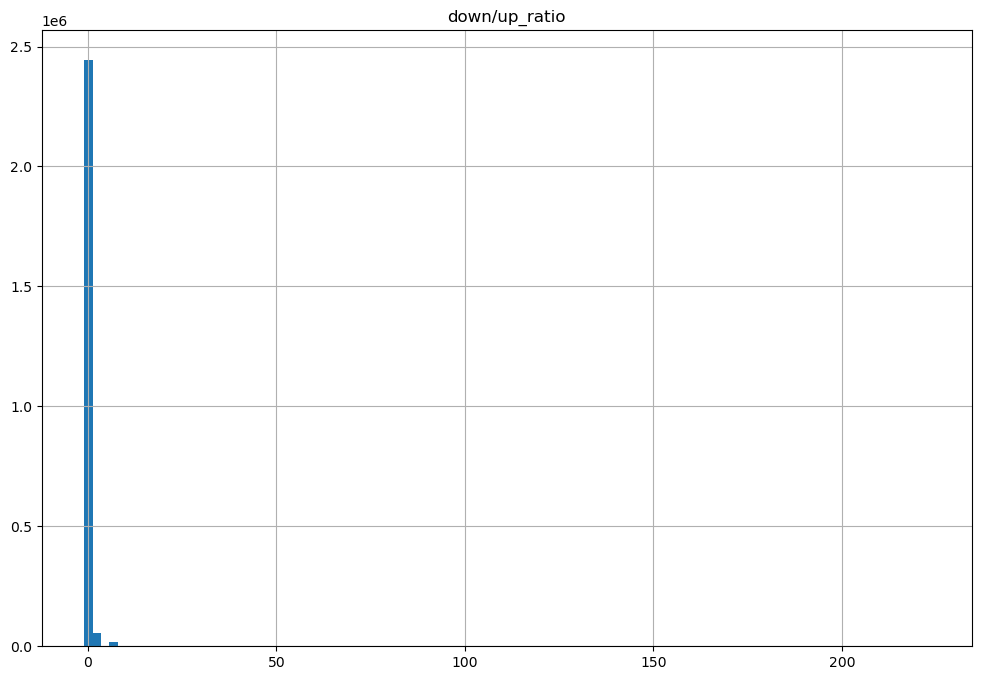

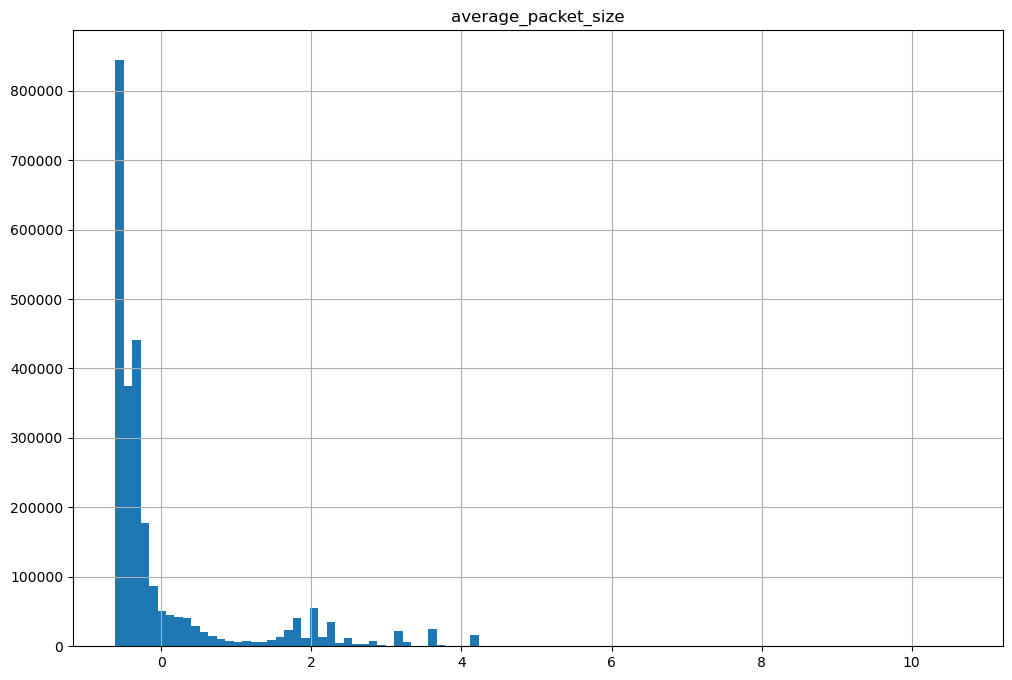

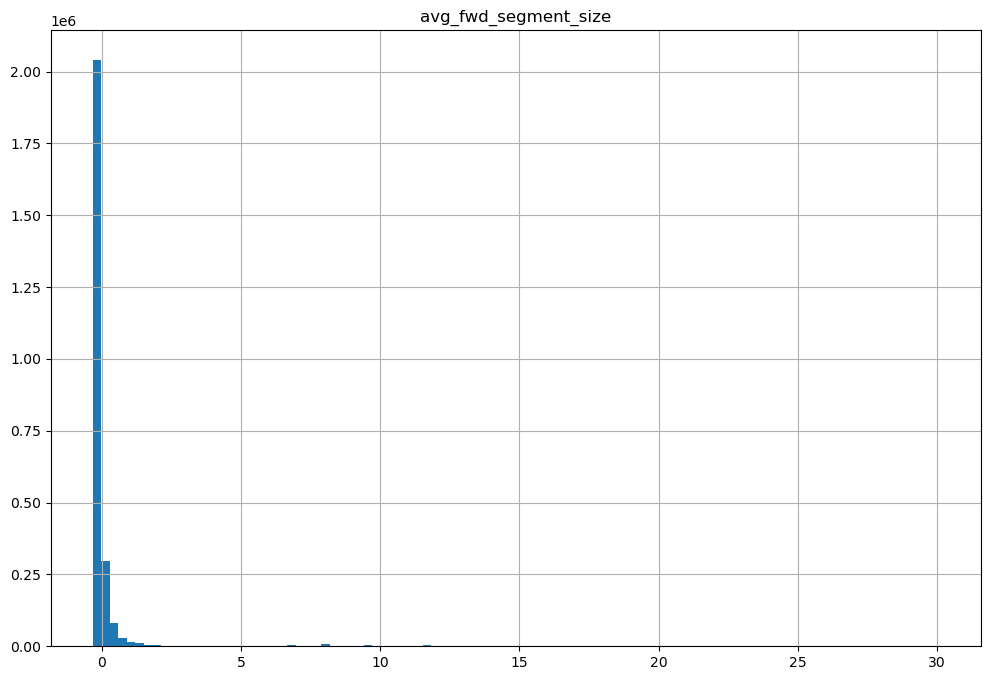

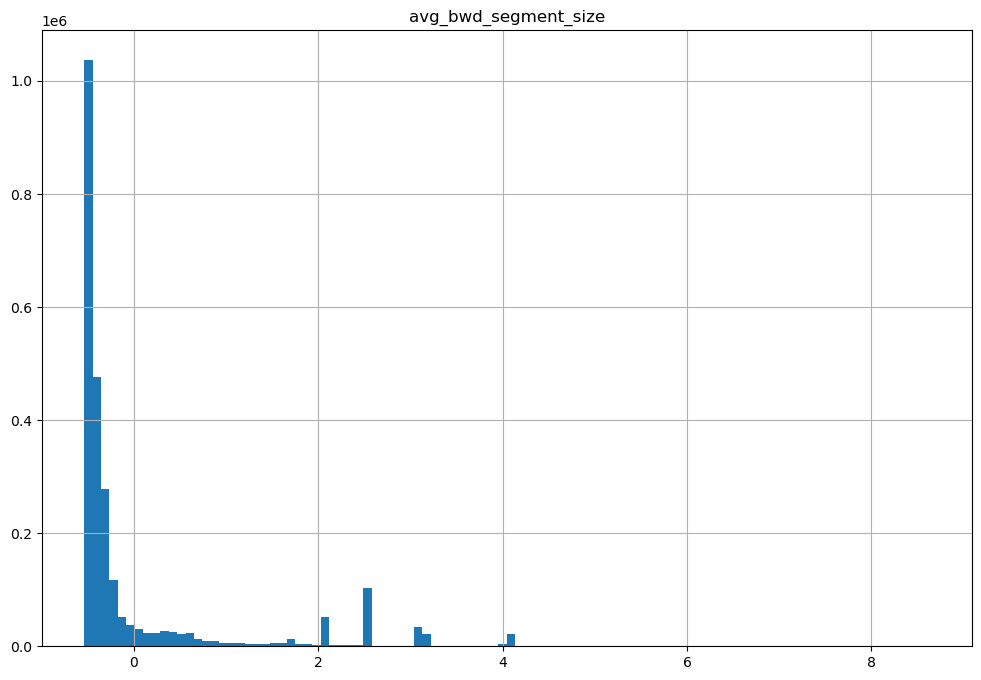

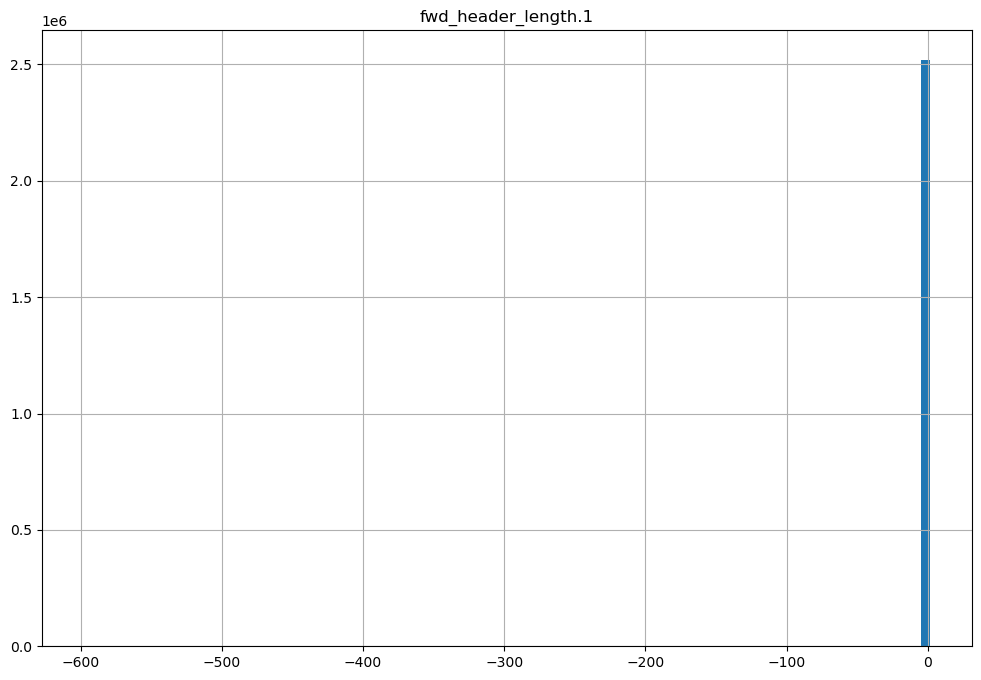

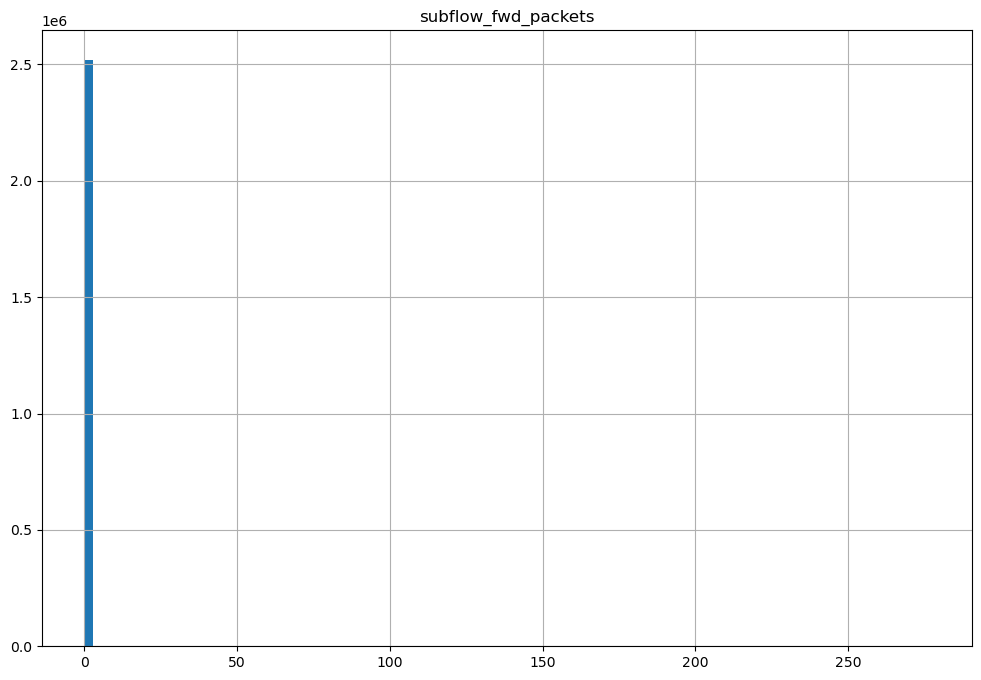

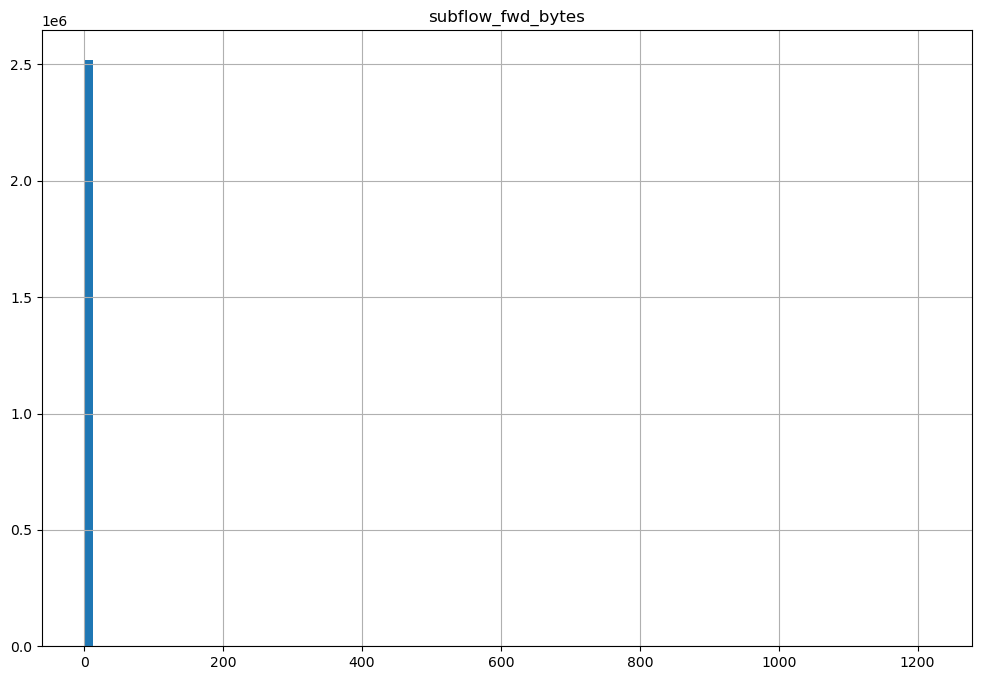

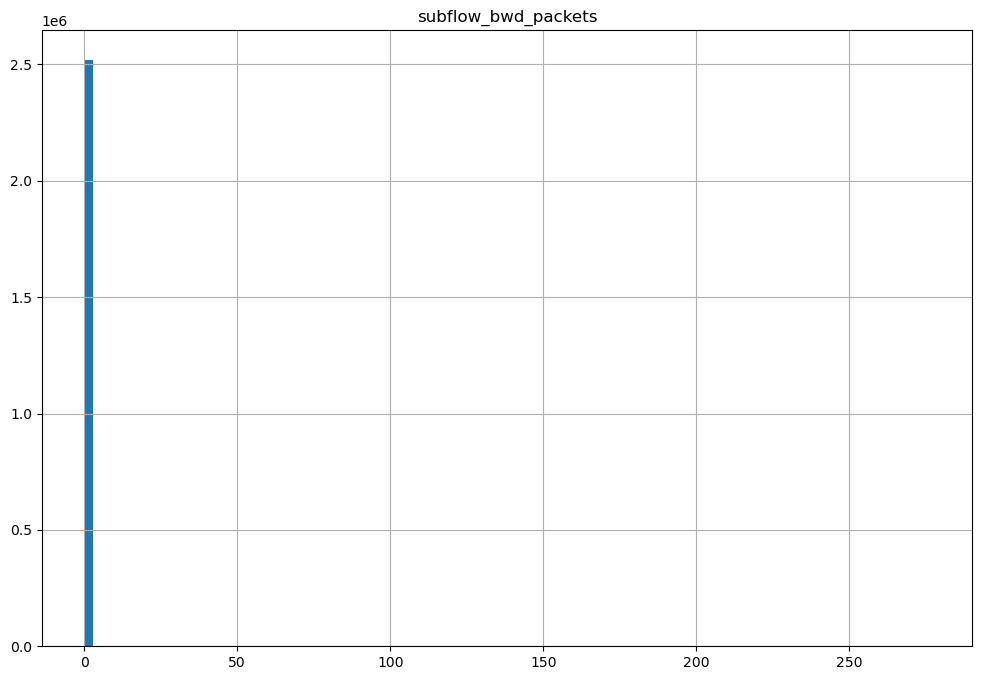

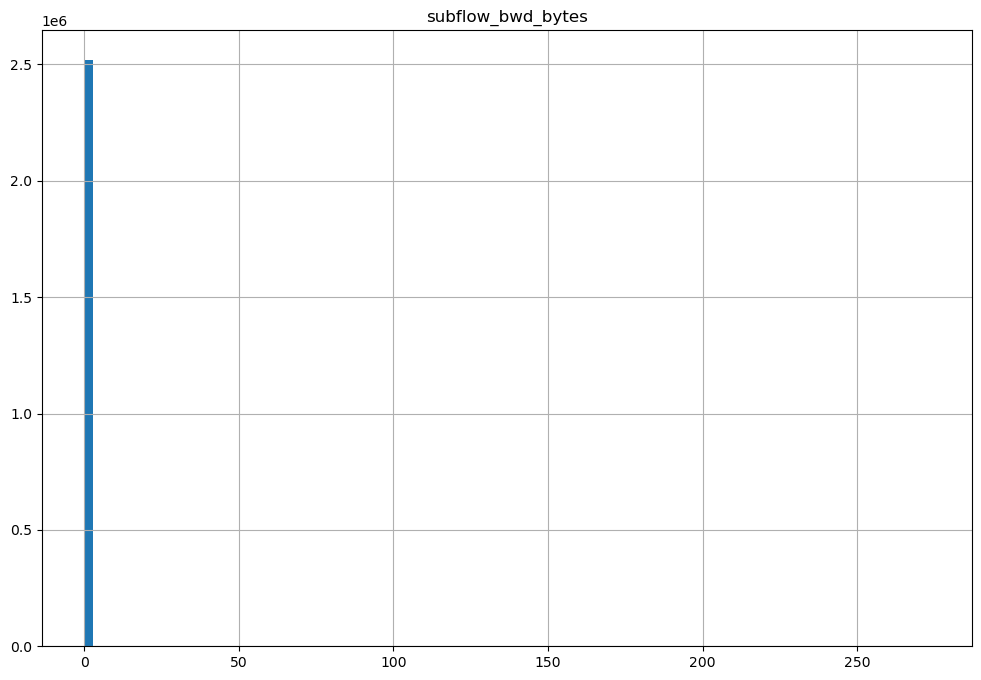

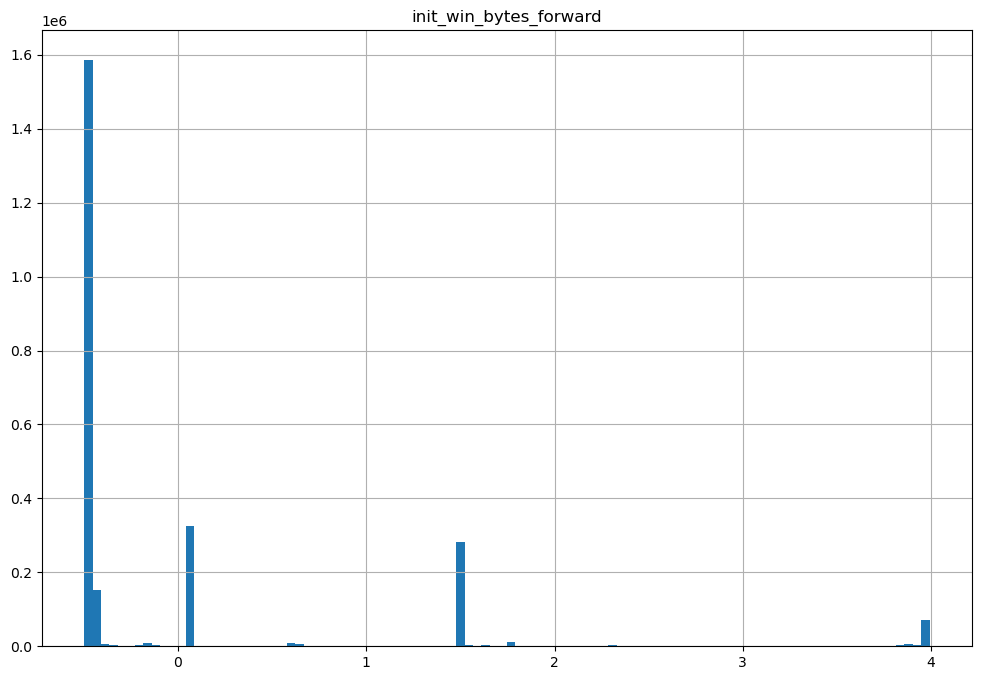

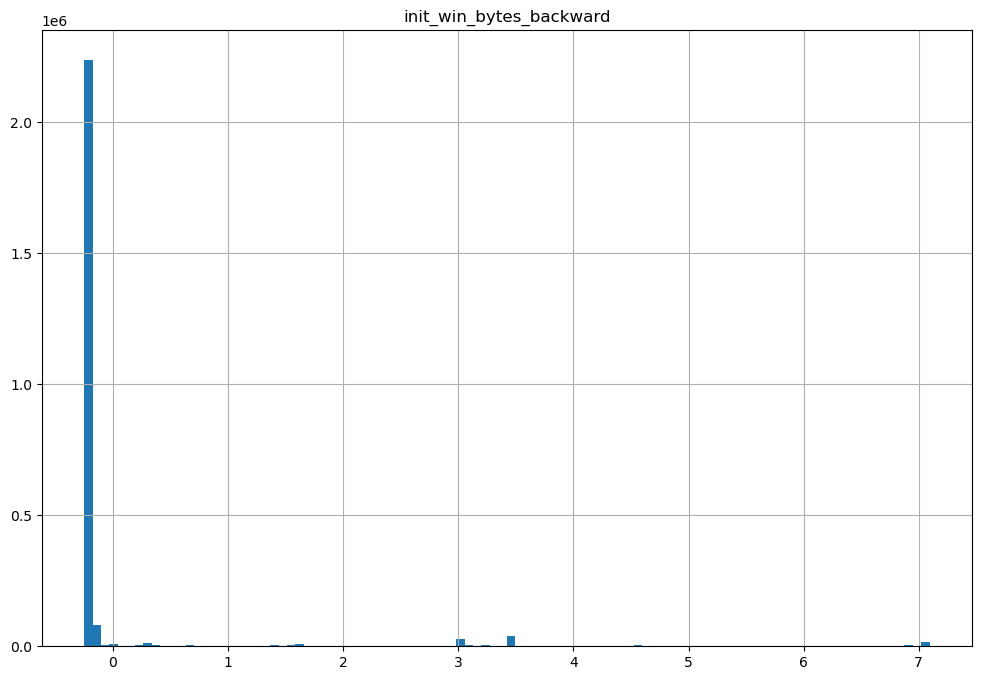

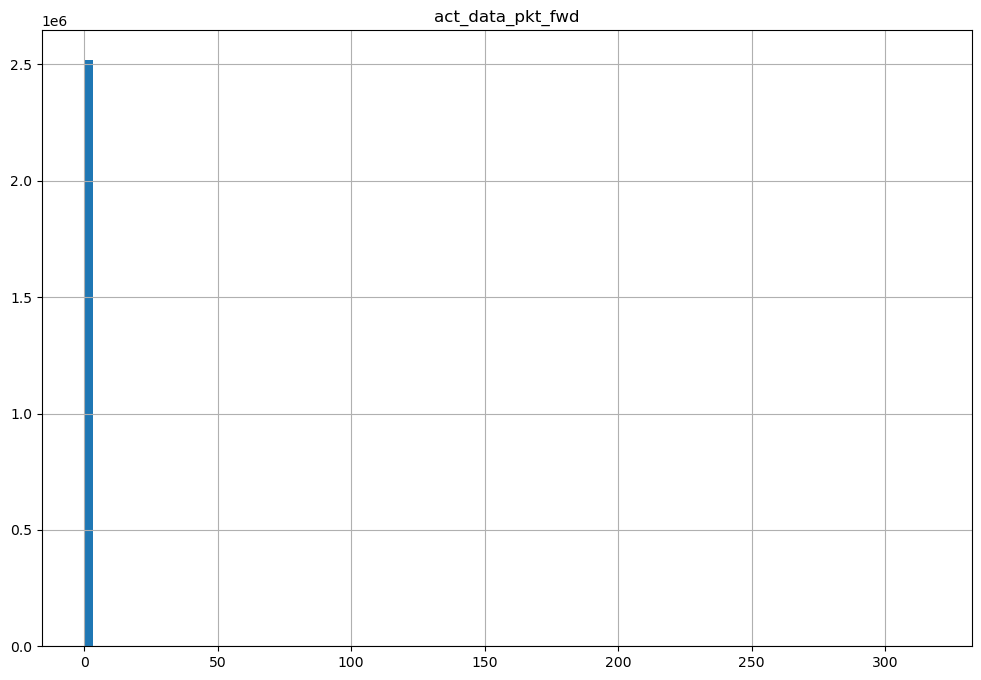

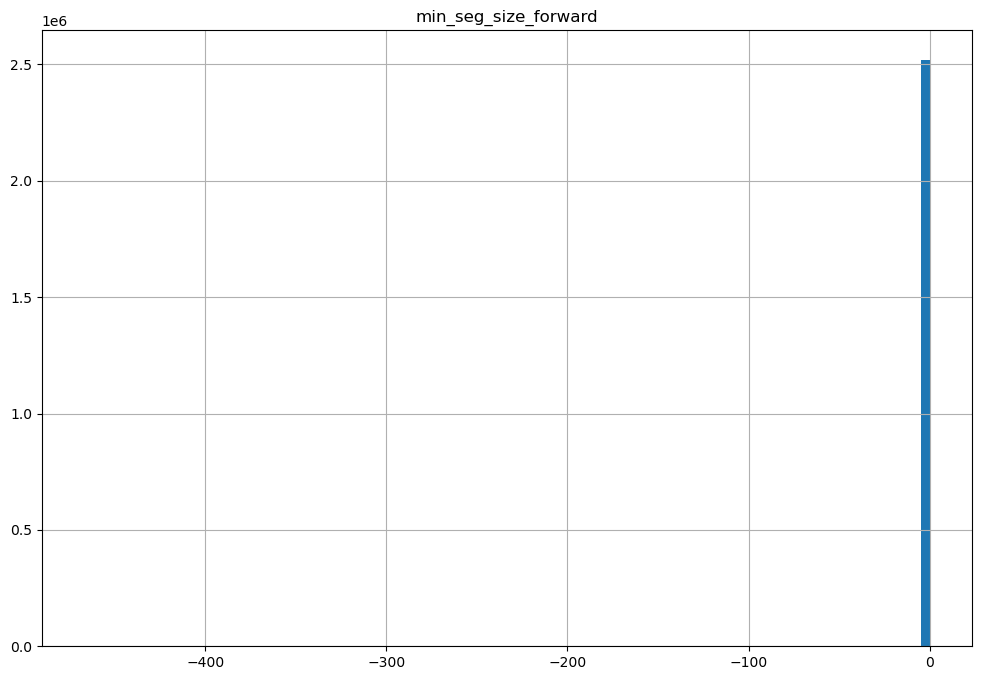

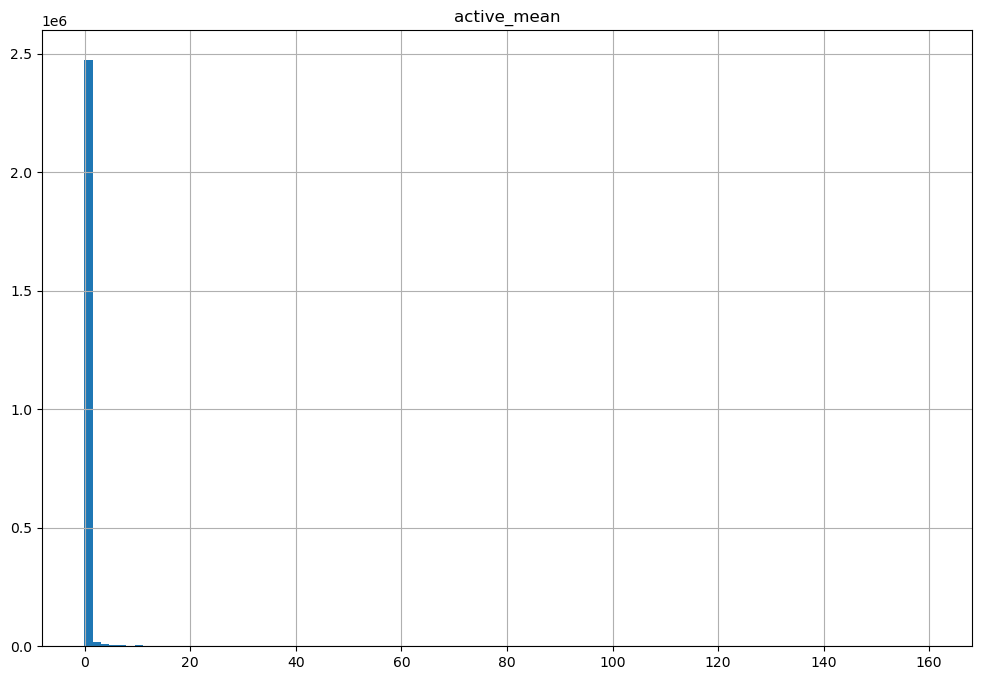

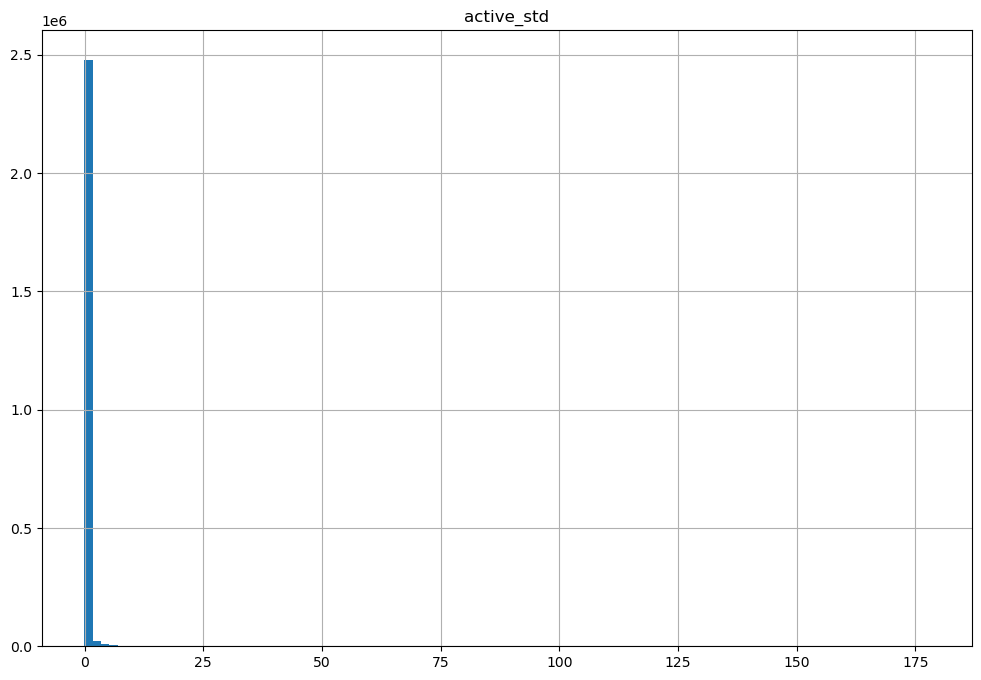

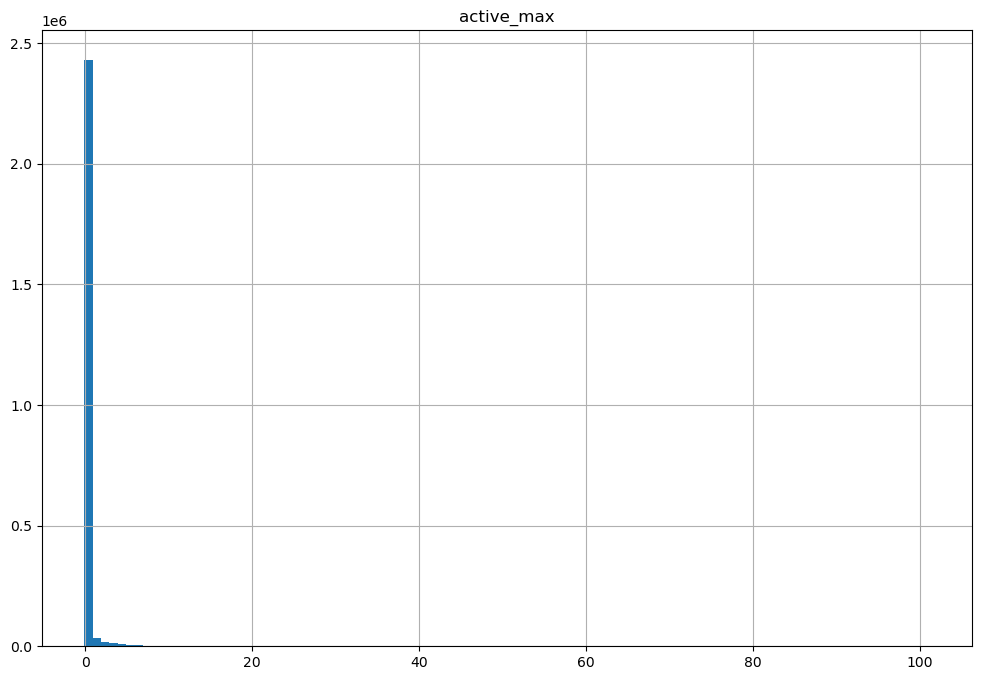

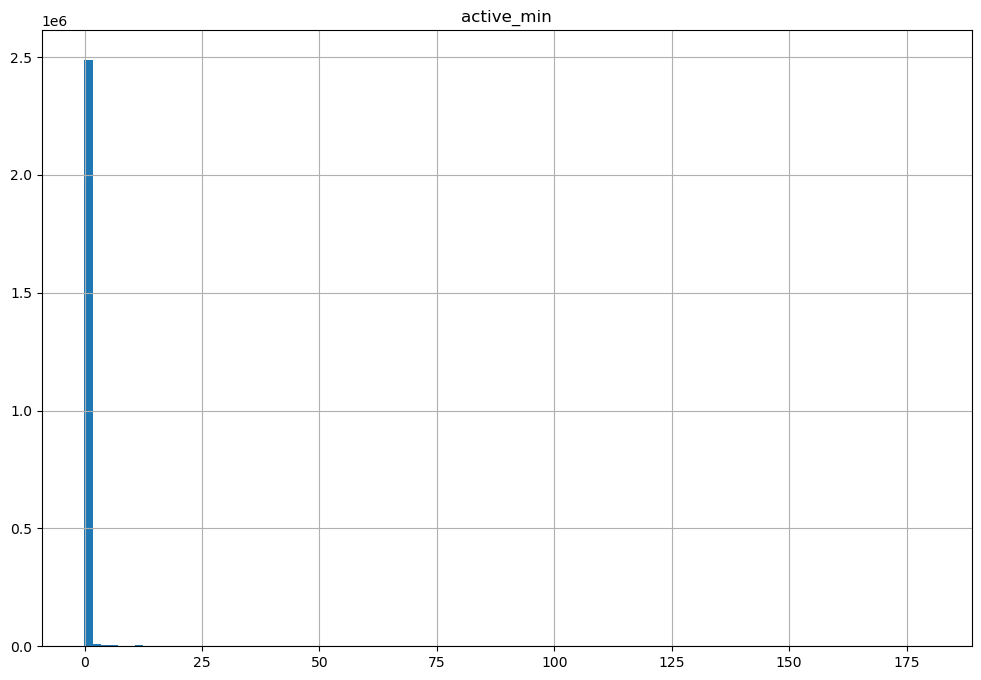

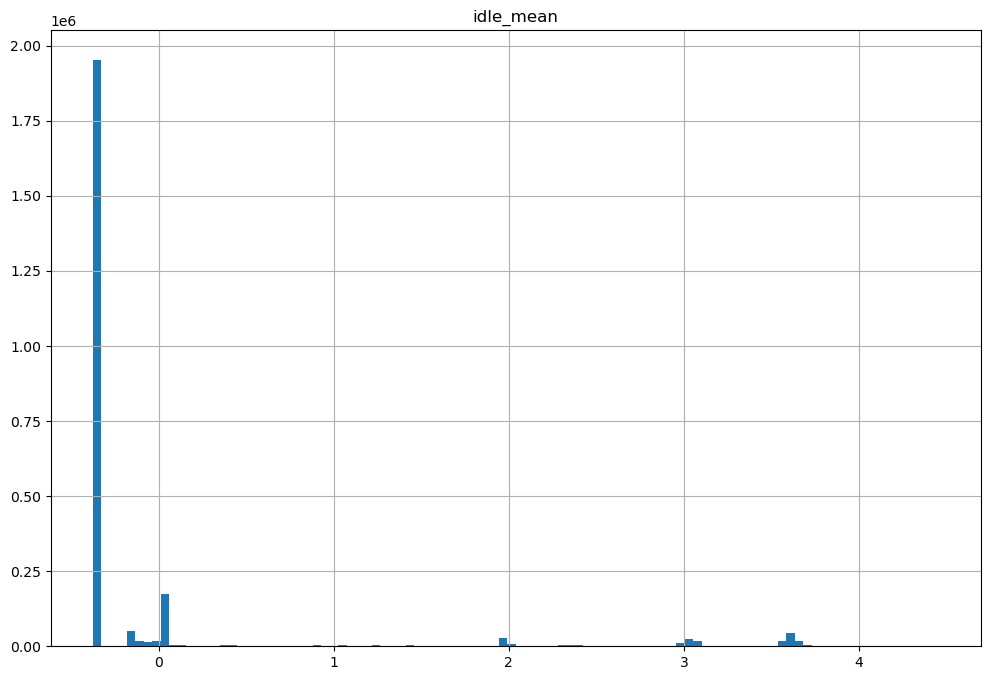

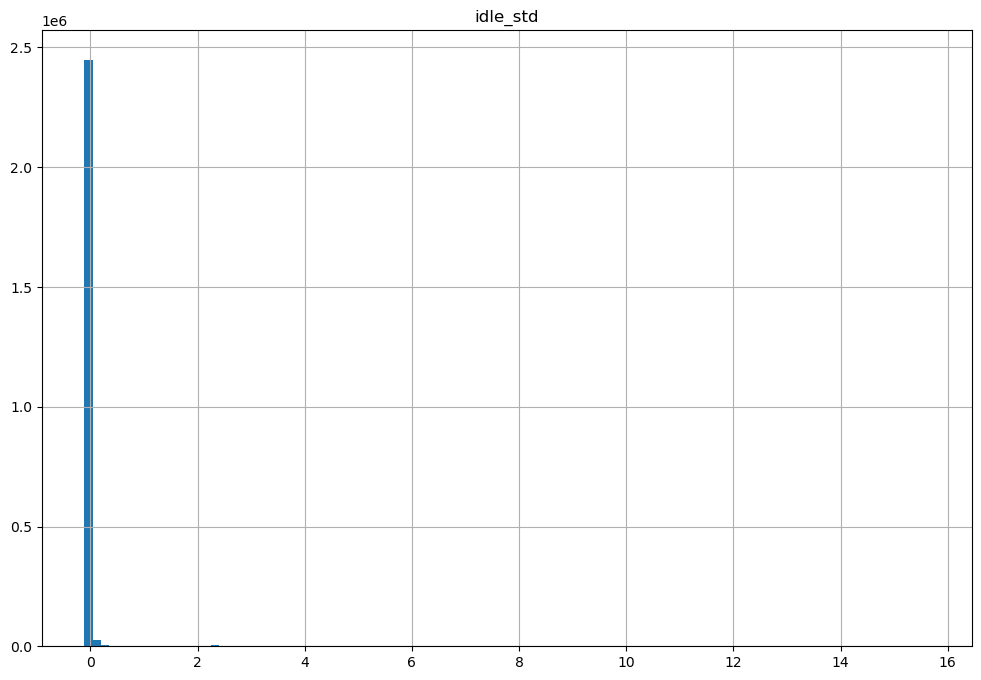

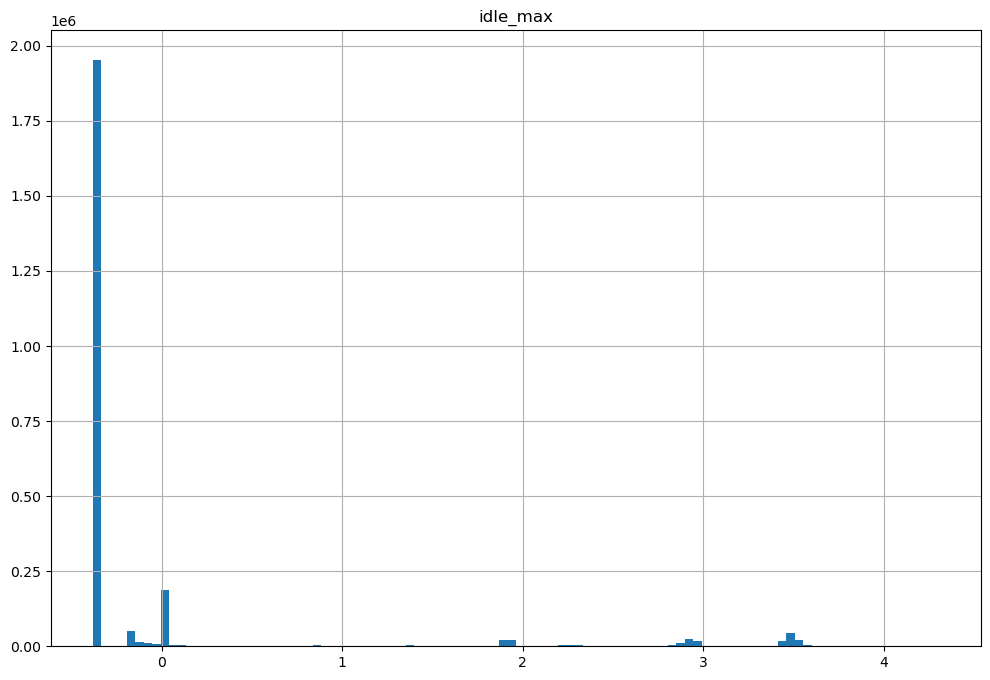

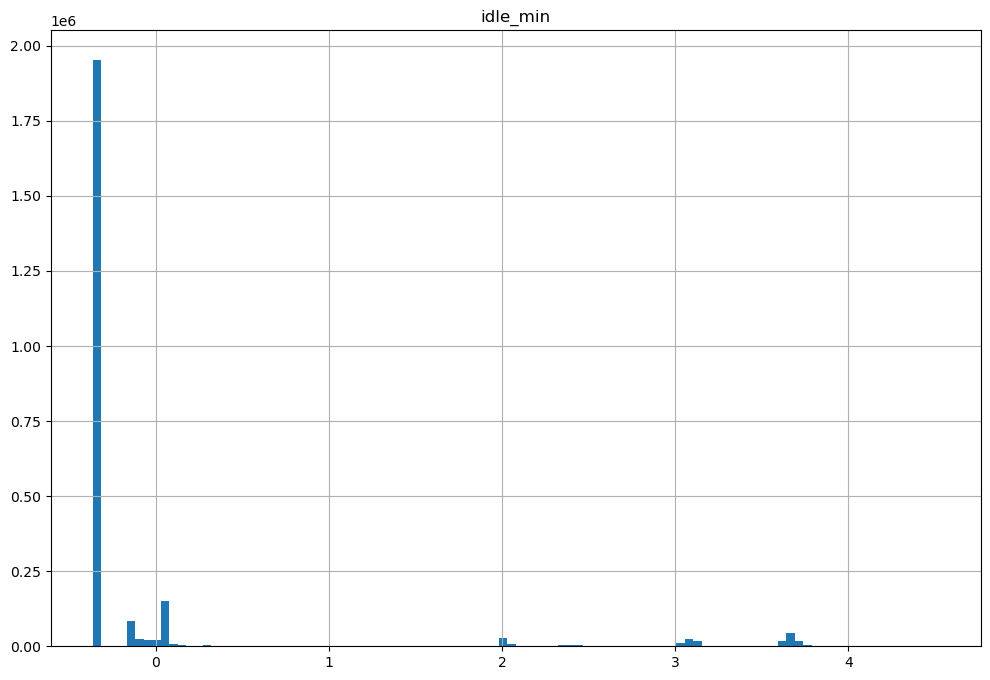

In [ ]:
for i in dfScaled.columns:
  dfScaled.hist(column = i, bins = 100, figsize=(12,8))

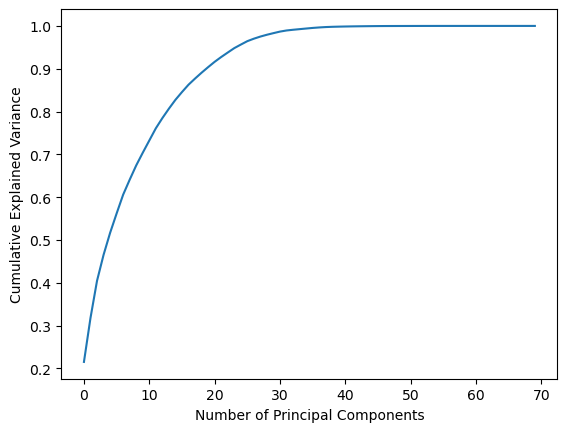

In [ ]:
pca_test = PCA().fit(dfScaled)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
integer = []
f = []
for i in dfScaled.columns:
    if dfScaled[i].dtype == "int64": integer.append(i)
    else : f.append(i)

dfScaled[integer] = dfScaled[integer].astype("int32")
dfScaled[f] = dfScaled[f].astype("float32")

In [ ]:
dfScaled.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 70 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   destination_port             float32
 1   flow_duration                float32
 2   total_fwd_packets            float32
 3   total_backward_packets       float32
 4   total_length_of_fwd_packets  float32
 5   total_length_of_bwd_packets  float32
 6   fwd_packet_length_max        float32
 7   fwd_packet_length_min        float32
 8   fwd_packet_length_mean       float32
 9   fwd_packet_length_std        float32
 10  bwd_packet_length_max        float32
 11  bwd_packet_length_min        float32
 12  bwd_packet_length_mean       float32
 13  bwd_packet_length_std        float32
 14  flow_bytes/s                 float32
 15  flow_packets/s               float32
 16  flow_iat_mean                float32
 17  flow_iat_std                 float32
 18  flow_iat_max                 float32
 19  

In [ ]:
pca = PCA(n_components=30)
principal_components = pca.fit(dfScaled).transform(dfScaled)
del dfScaled

In [ ]:
principal_component_headings = get_PCA_feature_names(30)

In [ ]:
df_pc = pd.DataFrame(data = principal_components, columns = principal_component_headings)
df_pc.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2520798 entries, 0 to 2520797
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Principal component 1   float32
 1   Principal component 2   float32
 2   Principal component 3   float32
 3   Principal component 4   float32
 4   Principal component 5   float32
 5   Principal component 6   float32
 6   Principal component 7   float32
 7   Principal component 8   float32
 8   Principal component 9   float32
 9   Principal component 10  float32
 10  Principal component 11  float32
 11  Principal component 12  float32
 12  Principal component 13  float32
 13  Principal component 14  float32
 14  Principal component 15  float32
 15  Principal component 16  float32
 16  Principal component 17  float32
 17  Principal component 18  float32
 18  Principal component 19  float32
 19  Principal component 20  float32
 20  Principal component 21  float32
 21  Principal component 22  float32

In [ ]:
integer = []
f = []
for i in df_pc.columns:
    if df_pc[i].dtype == "int64": integer.append(i)
    else : f.append(i)

df_pc[integer] = df_pc[integer].astype("int32")
df_pc[f] = df_pc[f].astype("float32")

In [ ]:
y.info(verbose=True)

<class 'pandas.core.series.Series'>
RangeIndex: 2520798 entries, 0 to 2520797
Series name: label
Non-Null Count    Dtype 
--------------    ----- 
2520798 non-null  object
dtypes: object(1)
memory usage: 19.2+ MB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_pc,y,test_size=0.3, random_state=42 ,stratify=y)
del df_pc
gc.collect()

654160

In [ ]:
np.any(np.isnan(X_train))

False

In [ ]:
np.all(np.isfinite(X_train))

True

In [ ]:
X_train.isnull().any(axis=None)

False

In [ ]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764558 entries, 2072017 to 1598724
Data columns (total 30 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Principal component 1   float32
 1   Principal component 2   float32
 2   Principal component 3   float32
 3   Principal component 4   float32
 4   Principal component 5   float32
 5   Principal component 6   float32
 6   Principal component 7   float32
 7   Principal component 8   float32
 8   Principal component 9   float32
 9   Principal component 10  float32
 10  Principal component 11  float32
 11  Principal component 12  float32
 12  Principal component 13  float32
 13  Principal component 14  float32
 14  Principal component 15  float32
 15  Principal component 16  float32
 16  Principal component 17  float32
 17  Principal component 18  float32
 18  Principal component 19  float32
 19  Principal component 20  float32
 20  Principal component 21  float32
 21  Principal component 22  f

In [ ]:
y_train.value_counts()

BENIGN                        1466539
DoS Hulk                       120992
DDoS                            89610
PortScan                        63486
DoS GoldenEye                    7200
FTP-Patator                      4152
DoS slowloris                    3769
DoS Slowhttptest                 3660
SSH-Patator                      2253
Bot                              1364
Web Attack � Brute Force         1029
Web Attack � XSS                  456
Infiltration                       25
Web Attack � Sql Injection         15
Heartbleed                          8
Name: label, dtype: int64

In [ ]:
y_test.value_counts()

BENIGN                        628518
DoS Hulk                       51854
DDoS                           38404
PortScan                       27208
DoS GoldenEye                   3086
FTP-Patator                     1779
DoS slowloris                   1616
DoS Slowhttptest                1568
SSH-Patator                      966
Bot                              584
Web Attack � Brute Force         441
Web Attack � XSS                 196
Infiltration                      11
Web Attack � Sql Injection         6
Heartbleed                         3
Name: label, dtype: int64

In [ ]:
#this is needed for ANN
le = LabelEncoder()
y_trainle = le.fit_transform(y_train)
y_testle = le.fit_transform(y_test)

# KNN Classifier

In [ ]:
st = time.time()
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
predictedKNN = KNN.predict(X_test)
print(accuracy_score(predictedKNN, y_test))
et = time.time()

0.9948415846821115


{'Class': 0, 'TP': 626306, 'FN': 1395.0, 'FP': 2212.0, 'TN': 126327.0}
{'Class': 1, 'TP': 383, 'FN': 144.0, 'FP': 201.0, 'TN': 755512.0}
{'Class': 2, 'TP': 38371, 'FN': 34.0, 'FP': 33.0, 'TN': 717802.0}
{'Class': 3, 'TP': 3046, 'FN': 53.0, 'FP': 40.0, 'TN': 753101.0}
{'Class': 4, 'TP': 51680, 'FN': 119.0, 'FP': 174.0, 'TN': 704267.0}
{'Class': 5, 'TP': 1559, 'FN': 37.0, 'FP': 9.0, 'TN': 754635.0}
{'Class': 6, 'TP': 1598, 'FN': 11.0, 'FP': 18.0, 'TN': 754613.0}
{'Class': 7, 'TP': 1769, 'FN': 3.0, 'FP': 10.0, 'TN': 754458.0}
{'Class': 8, 'TP': 2, 'FN': 0.0, 'FP': 1.0, 'TN': 756237.0}
{'Class': 9, 'TP': 1, 'FN': 1.0, 'FP': 10.0, 'TN': 756228.0}
{'Class': 10, 'TP': 26290, 'FN': 1858.0, 'FP': 918.0, 'TN': 727174.0}
{'Class': 11, 'TP': 934, 'FN': 27.0, 'FP': 32.0, 'TN': 755247.0}
{'Class': 12, 'TP': 336, 'FN': 135.0, 'FP': 105.0, 'TN': 755664.0}
{'Class': 13, 'TP': 1, 'FN': 0.0, 'FP': 5.0, 'TN': 756234.0}
{'Class': 14, 'TP': 63, 'FN': 84.0, 'FP': 133.0, 'TN': 755960.0}
<class 'numpy.ndarray'

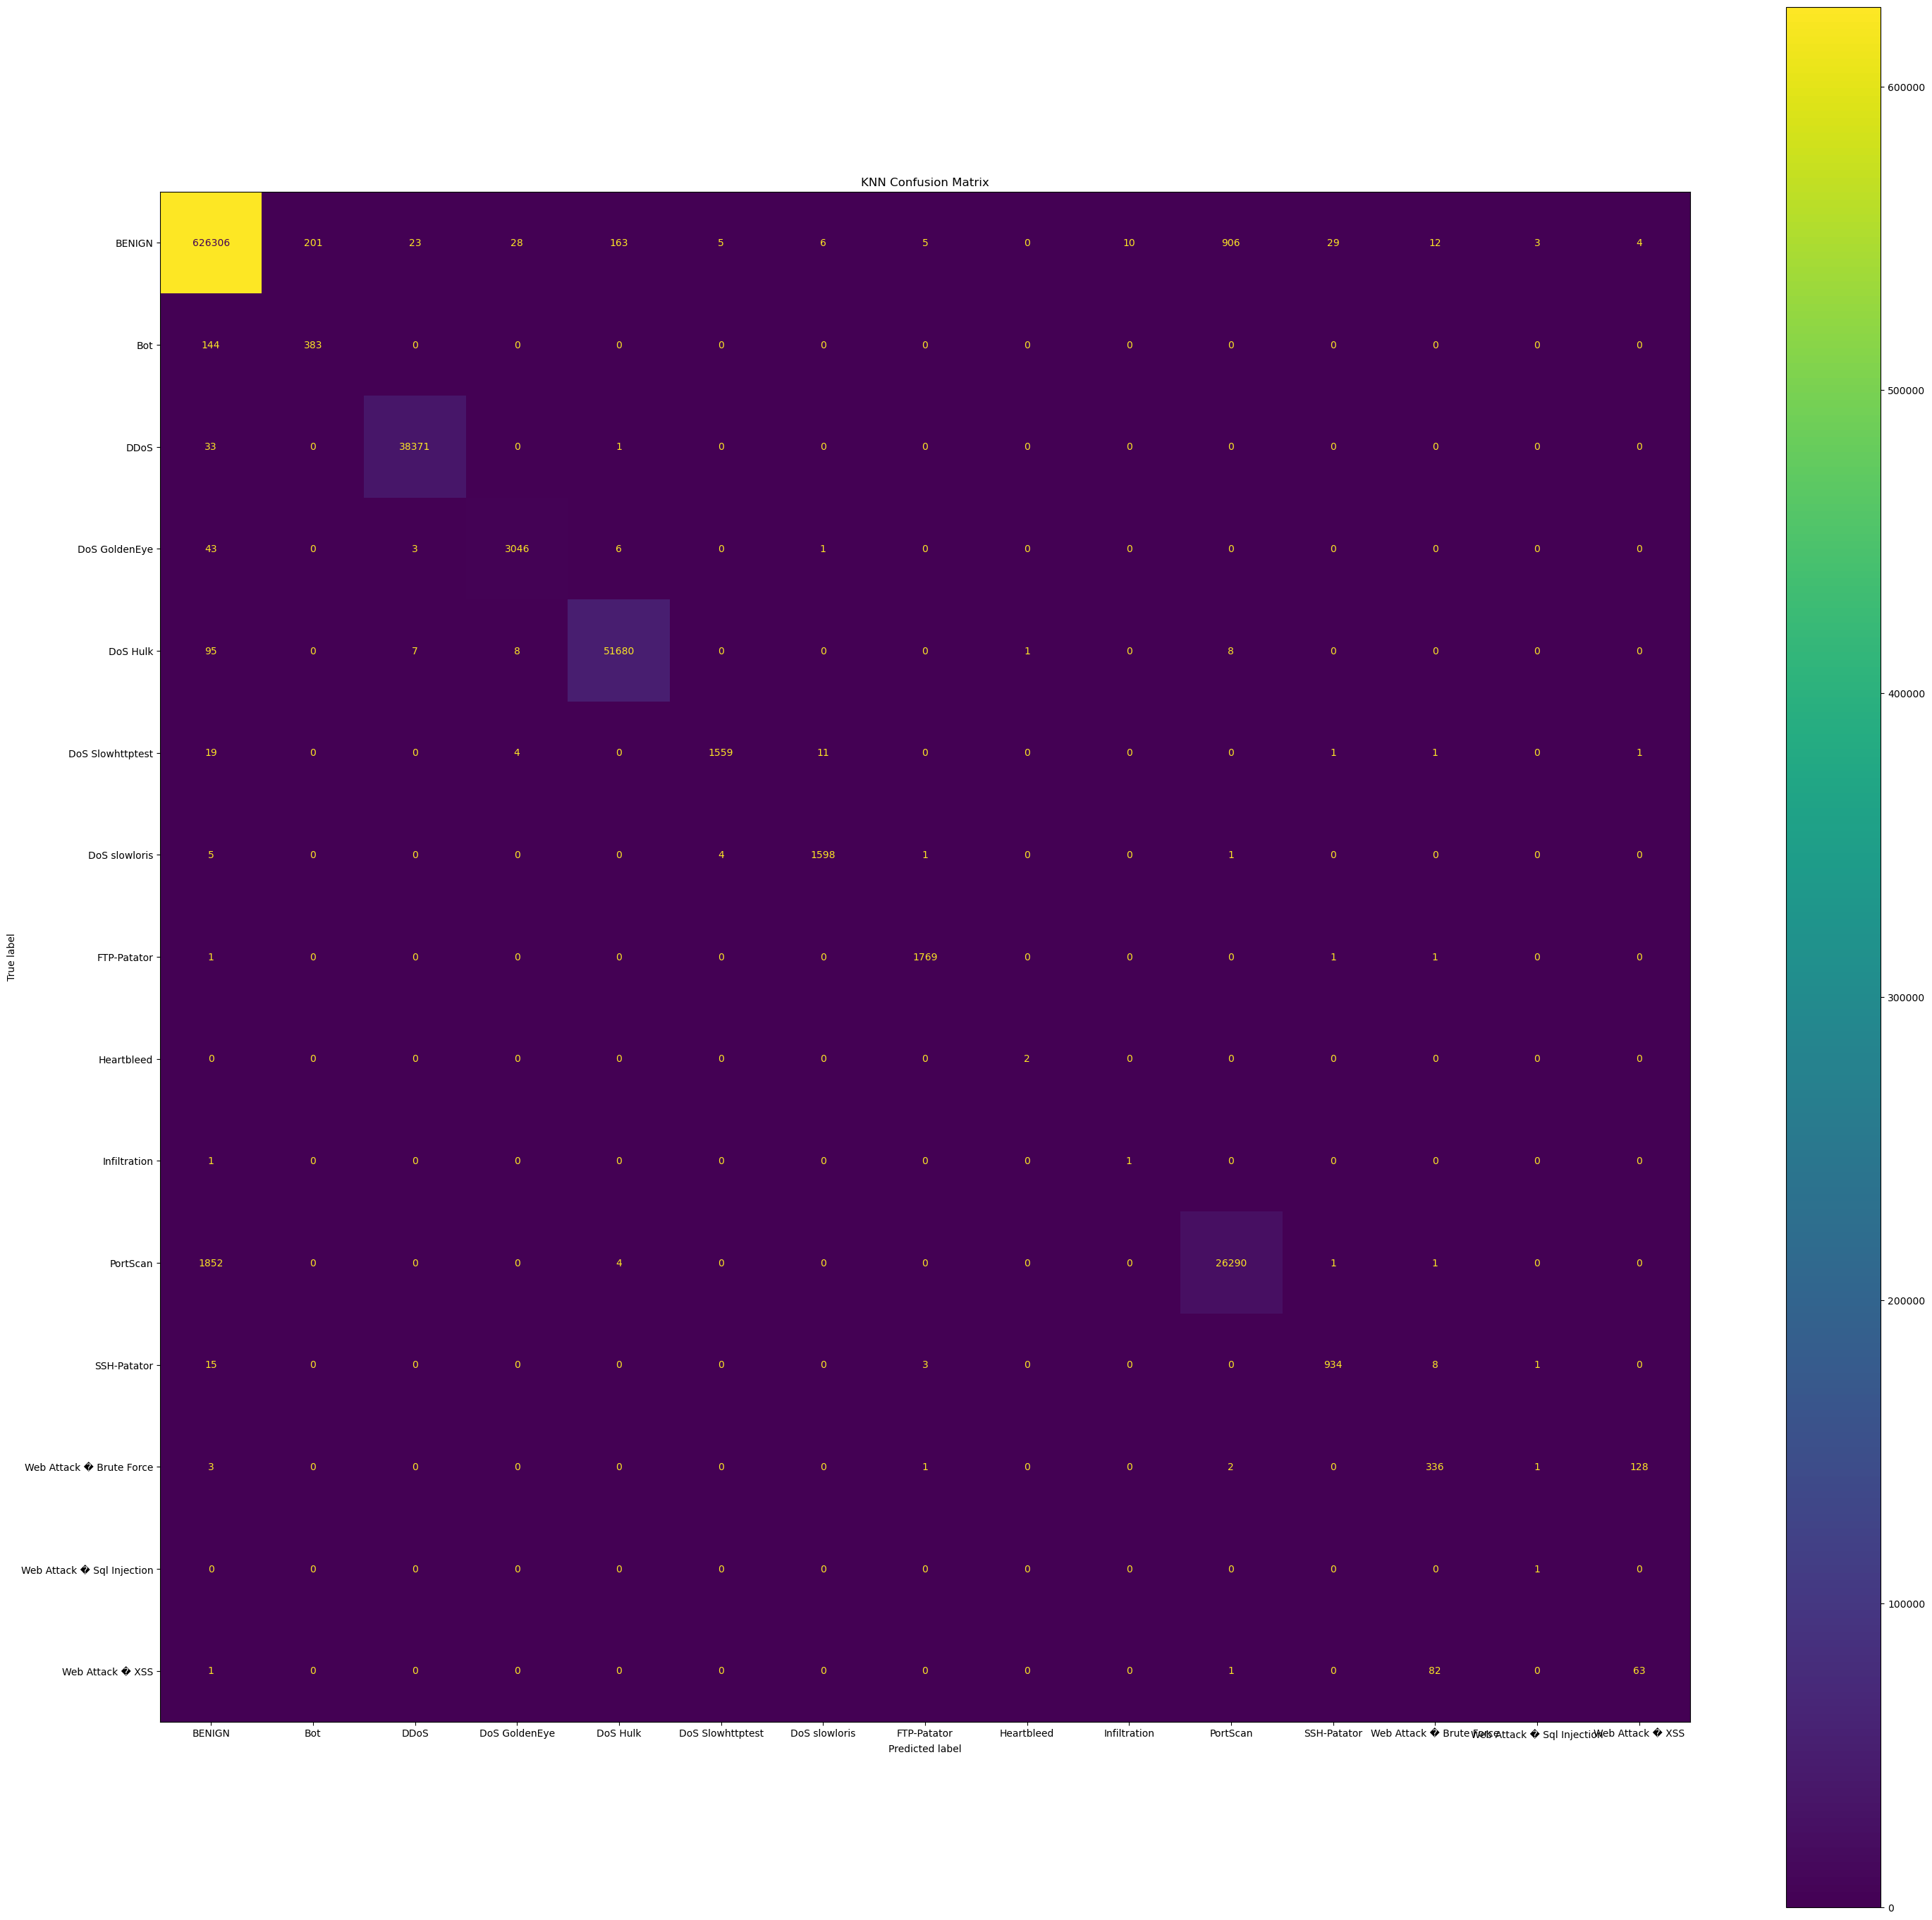

In [ ]:
confusionMatrix(predictedKNN, y_test, KNN.classes_, "KNN Confusion Matrix")

In [ ]:
getSummary(predictedKNN, y_test, "KNN")

KNN: 
Accuracy: 0.9948415846821115 
Recall: 0.8813585755547533 
Precision: 0.7702223830715859 
F1 Score: 0.7935769523305959


In [ ]:
print(classification_report(predictedKNN, y_test, labels= KNN.classes_))

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    627701
                       Bot       0.66      0.73      0.69       527
                      DDoS       1.00      1.00      1.00     38405
             DoS GoldenEye       0.99      0.98      0.98      3099
                  DoS Hulk       1.00      1.00      1.00     51799
          DoS Slowhttptest       0.99      0.98      0.99      1596
             DoS slowloris       0.99      0.99      0.99      1609
               FTP-Patator       0.99      1.00      1.00      1772
                Heartbleed       0.67      1.00      0.80         2
              Infiltration       0.09      0.50      0.15         2
                  PortScan       0.97      0.93      0.95     28148
               SSH-Patator       0.97      0.97      0.97       961
  Web Attack � Brute Force       0.76      0.71      0.74       471
Web Attack � Sql Injection       0.17      1.00

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 727.16 seconds 
Execution time: 12.12 minutes


# Logistic Regression

In [ ]:
st = time.time()
logisticRegr = LogisticRegression( max_iter= 3000, multi_class="multinomial", n_jobs= -1)
logisticRegr.fit(X_train, y_train)
predictedLog = logisticRegr.predict(X_test)
print(accuracy_score(predictedLog, y_test))
et = time.time()

0.9714997884269544


{'Class': 0, 'TP': 617471, 'FN': 10104.0, 'FP': 11047.0, 'TN': 117618.0}
{'Class': 1, 'TP': 7, 'FN': 0.0, 'FP': 577.0, 'TN': 755656.0}
{'Class': 2, 'TP': 35169, 'FN': 270.0, 'FP': 3235.0, 'TN': 717566.0}
{'Class': 3, 'TP': 2469, 'FN': 270.0, 'FP': 617.0, 'TN': 752884.0}
{'Class': 4, 'TP': 48753, 'FN': 505.0, 'FP': 3101.0, 'TN': 703881.0}
{'Class': 5, 'TP': 1148, 'FN': 242.0, 'FP': 420.0, 'TN': 754430.0}
{'Class': 6, 'TP': 892, 'FN': 70.0, 'FP': 724.0, 'TN': 754554.0}
{'Class': 7, 'TP': 1766, 'FN': 55.0, 'FP': 13.0, 'TN': 754406.0}
{'Class': 8, 'TP': 3, 'FN': 0.0, 'FP': 0.0, 'TN': 756237.0}
{'Class': 9, 'TP': 2, 'FN': 5.0, 'FP': 9.0, 'TN': 756224.0}
{'Class': 10, 'TP': 26996, 'FN': 9986.0, 'FP': 212.0, 'TN': 719046.0}
{'Class': 11, 'TP': 11, 'FN': 43.0, 'FP': 955.0, 'TN': 755231.0}
{'Class': 12, 'TP': 0, 'FN': 3.0, 'FP': 441.0, 'TN': 755796.0}
{'Class': 13, 'TP': 0, 'FN': 0.0, 'FP': 6.0, 'TN': 756234.0}
{'Class': 14, 'TP': 0, 'FN': 0.0, 'FP': 196.0, 'TN': 756044.0}
<class 'numpy.ndarray

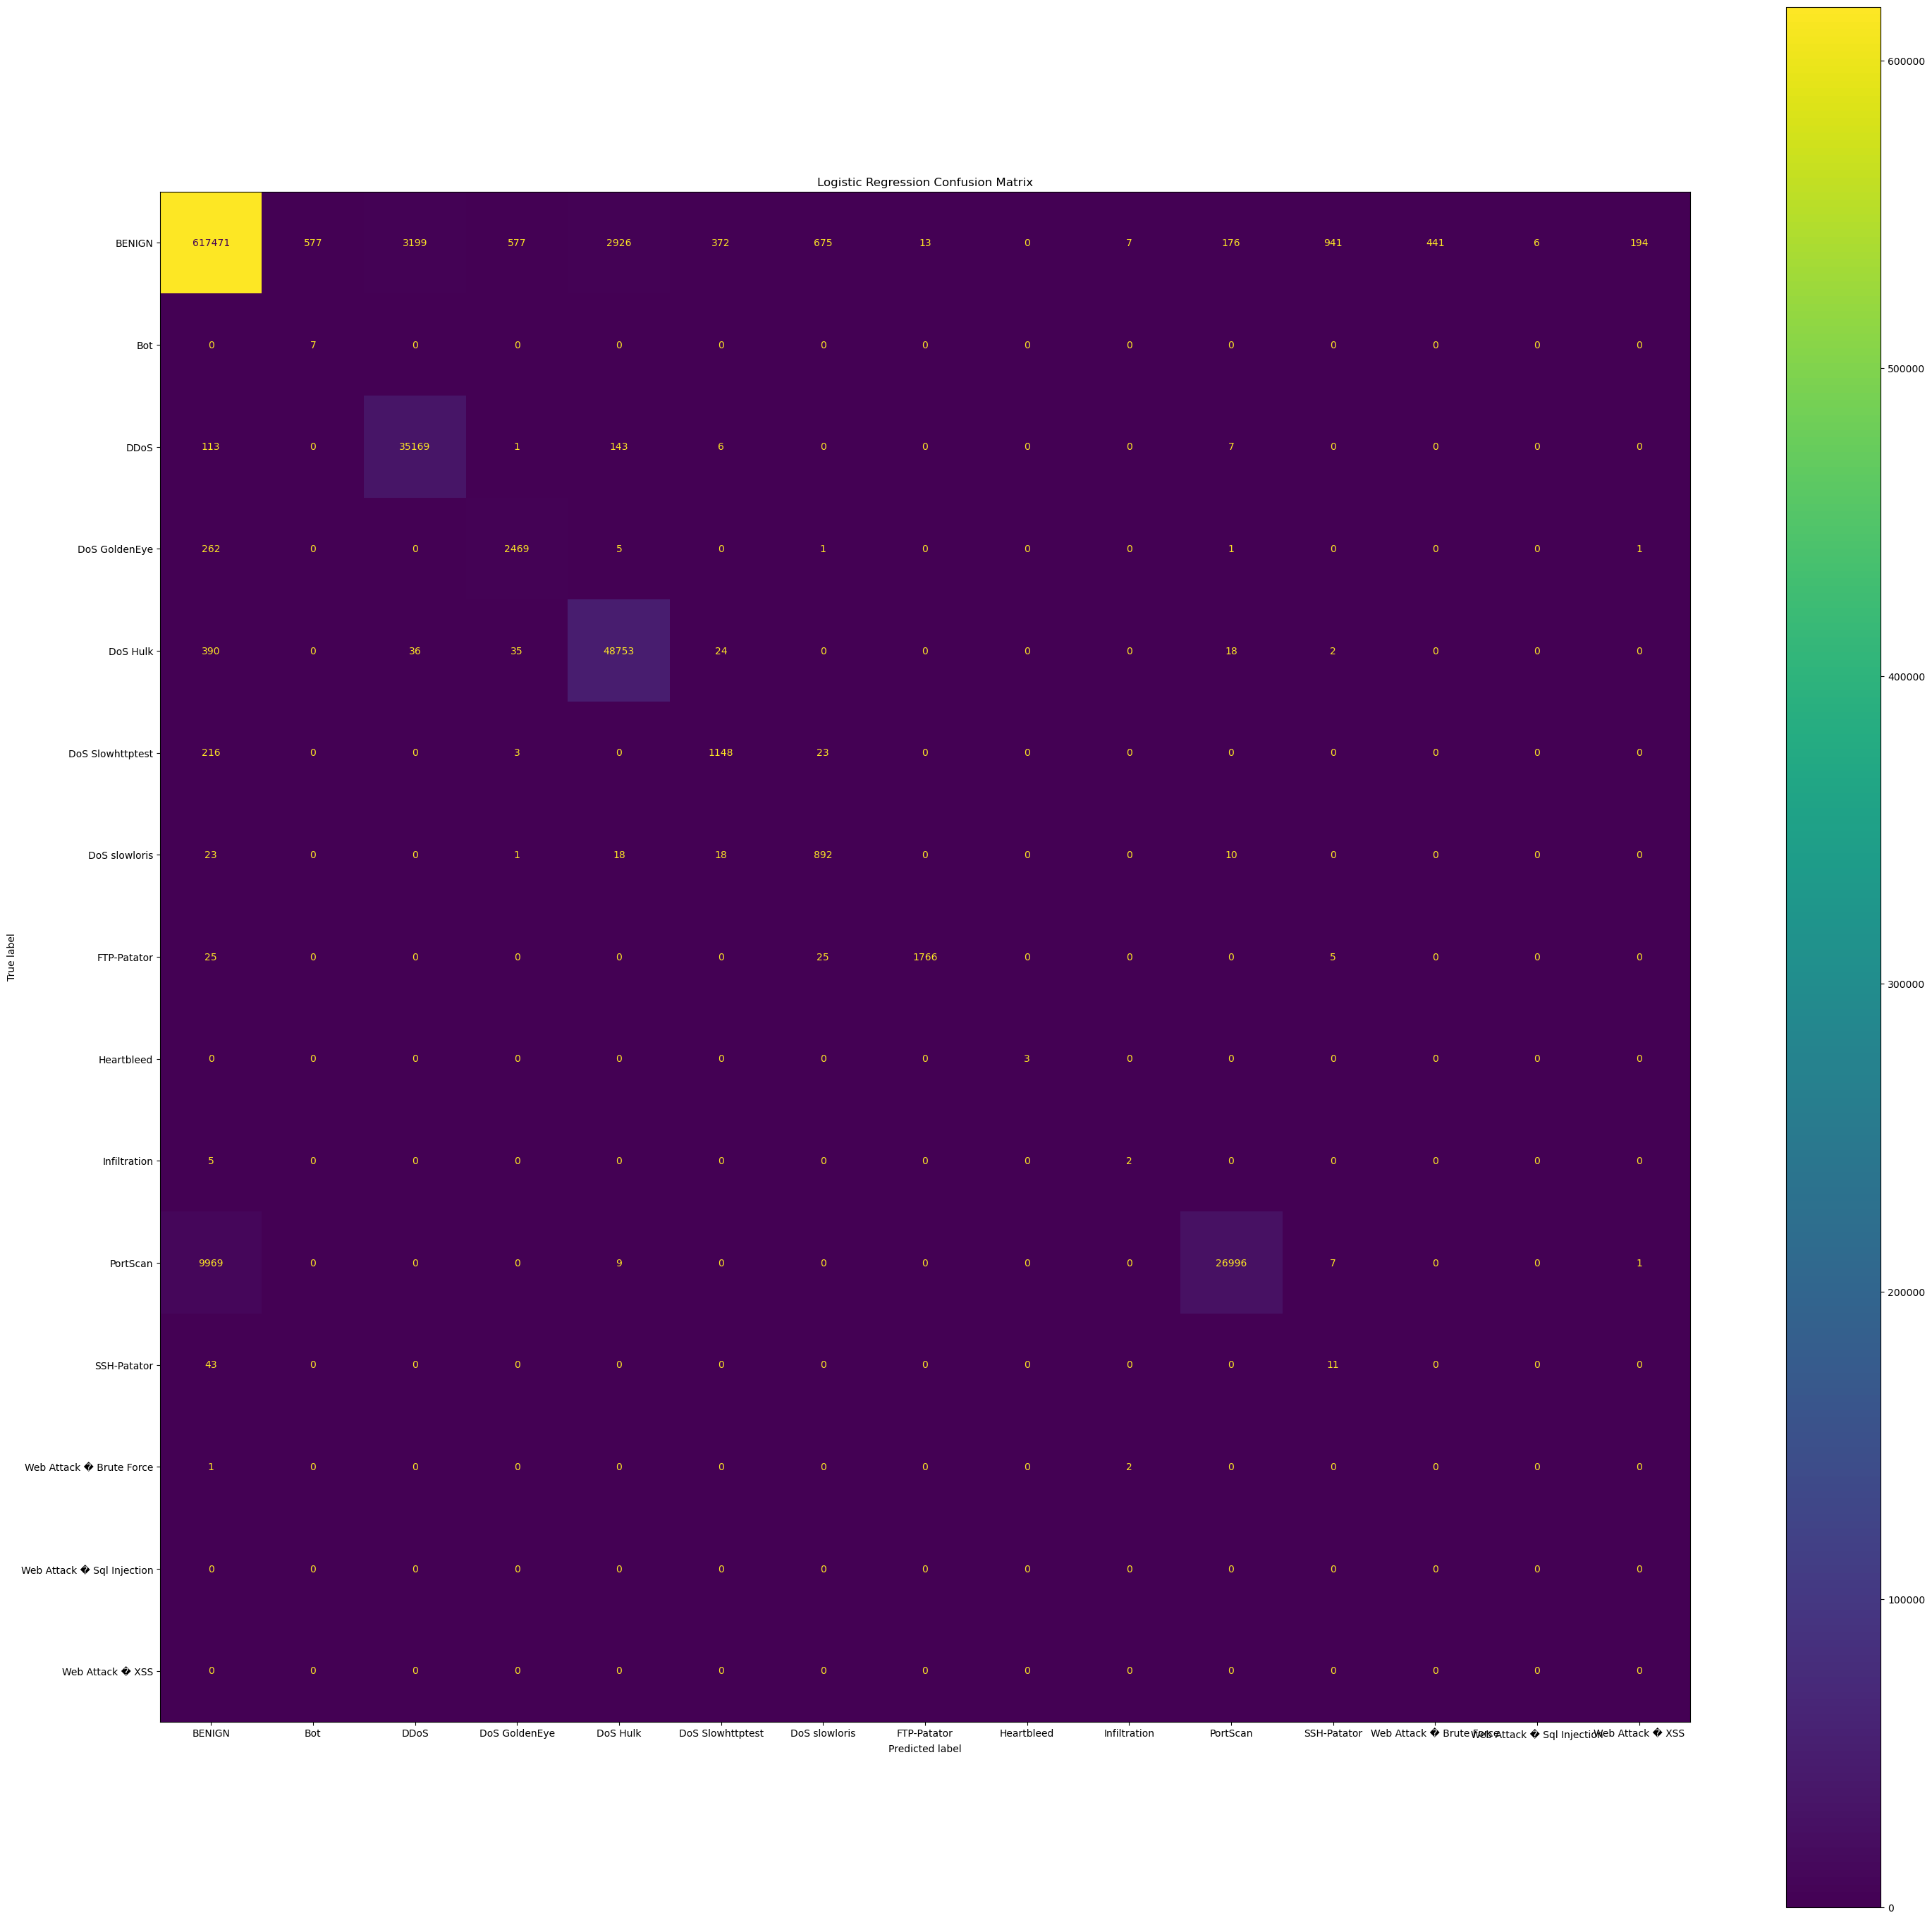

In [ ]:
confusionMatrix(predictedLog, y_test, logisticRegr.classes_, "Logistic Regression Confusion Matrix")

In [ ]:
getSummary(predictedLog, y_test, "Logistic Regression")  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Logistic Regression: 
Accuracy: 0.9714997884269544 
Recall: 0.6539852466865421 
Precision: 0.5408443601615756 
F1 Score: 0.553712371956568


In [ ]:
print(classification_report(predictedLog, y_test, labels= logisticRegr.classes_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.98      0.98      0.98    627575
                       Bot       0.01      1.00      0.02         7
                      DDoS       0.92      0.99      0.95     35439
             DoS GoldenEye       0.80      0.90      0.85      2739
                  DoS Hulk       0.94      0.99      0.96     49258
          DoS Slowhttptest       0.73      0.83      0.78      1390
             DoS slowloris       0.55      0.93      0.69       962
               FTP-Patator       0.99      0.97      0.98      1821
                Heartbleed       1.00      1.00      1.00         3
              Infiltration       0.18      0.29      0.22         7
                  PortScan       0.99      0.73      0.84     36982
               SSH-Patator       0.01      0.20      0.02        54
  Web Attack � Brute Force       0.00      0.00      0.00         3
Web Attack � Sql Injection       0.00      0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 2411.25 seconds 
Execution time: 40.19 minutes


# Bernoulli Naive Bayes

In [ ]:
st = time.time()
BNB = BernoulliNB()
BNB.fit(X_train, y_train)
predictedBNB = BNB.predict(X_test)
print(accuracy_score(predictedBNB, y_test))
et = time.time()

0.8201893578758066


{'Class': 0, 'TP': 517372, 'FN': 8545.0, 'FP': 111146.0, 'TN': 119177.0}
{'Class': 1, 'TP': 200, 'FN': 7119.0, 'FP': 384.0, 'TN': 748537.0}
{'Class': 2, 'TP': 33497, 'FN': 34694.0, 'FP': 4907.0, 'TN': 683142.0}
{'Class': 3, 'TP': 1961, 'FN': 9944.0, 'FP': 1125.0, 'TN': 743210.0}
{'Class': 4, 'TP': 38057, 'FN': 8747.0, 'FP': 13797.0, 'TN': 695639.0}
{'Class': 5, 'TP': 856, 'FN': 4237.0, 'FP': 712.0, 'TN': 750435.0}
{'Class': 6, 'TP': 559, 'FN': 14543.0, 'FP': 1057.0, 'TN': 740081.0}
{'Class': 7, 'TP': 1226, 'FN': 646.0, 'FP': 553.0, 'TN': 753815.0}
{'Class': 8, 'TP': 3, 'FN': 2.0, 'FP': 0.0, 'TN': 756235.0}
{'Class': 9, 'TP': 0, 'FN': 26.0, 'FP': 11.0, 'TN': 756203.0}
{'Class': 10, 'TP': 25464, 'FN': 29836.0, 'FP': 1744.0, 'TN': 699196.0}
{'Class': 11, 'TP': 874, 'FN': 6154.0, 'FP': 92.0, 'TN': 749120.0}
{'Class': 12, 'TP': 11, 'FN': 9442.0, 'FP': 430.0, 'TN': 746357.0}
{'Class': 13, 'TP': 0, 'FN': 65.0, 'FP': 6.0, 'TN': 756169.0}
{'Class': 14, 'TP': 180, 'FN': 1980.0, 'FP': 16.0, 'TN':

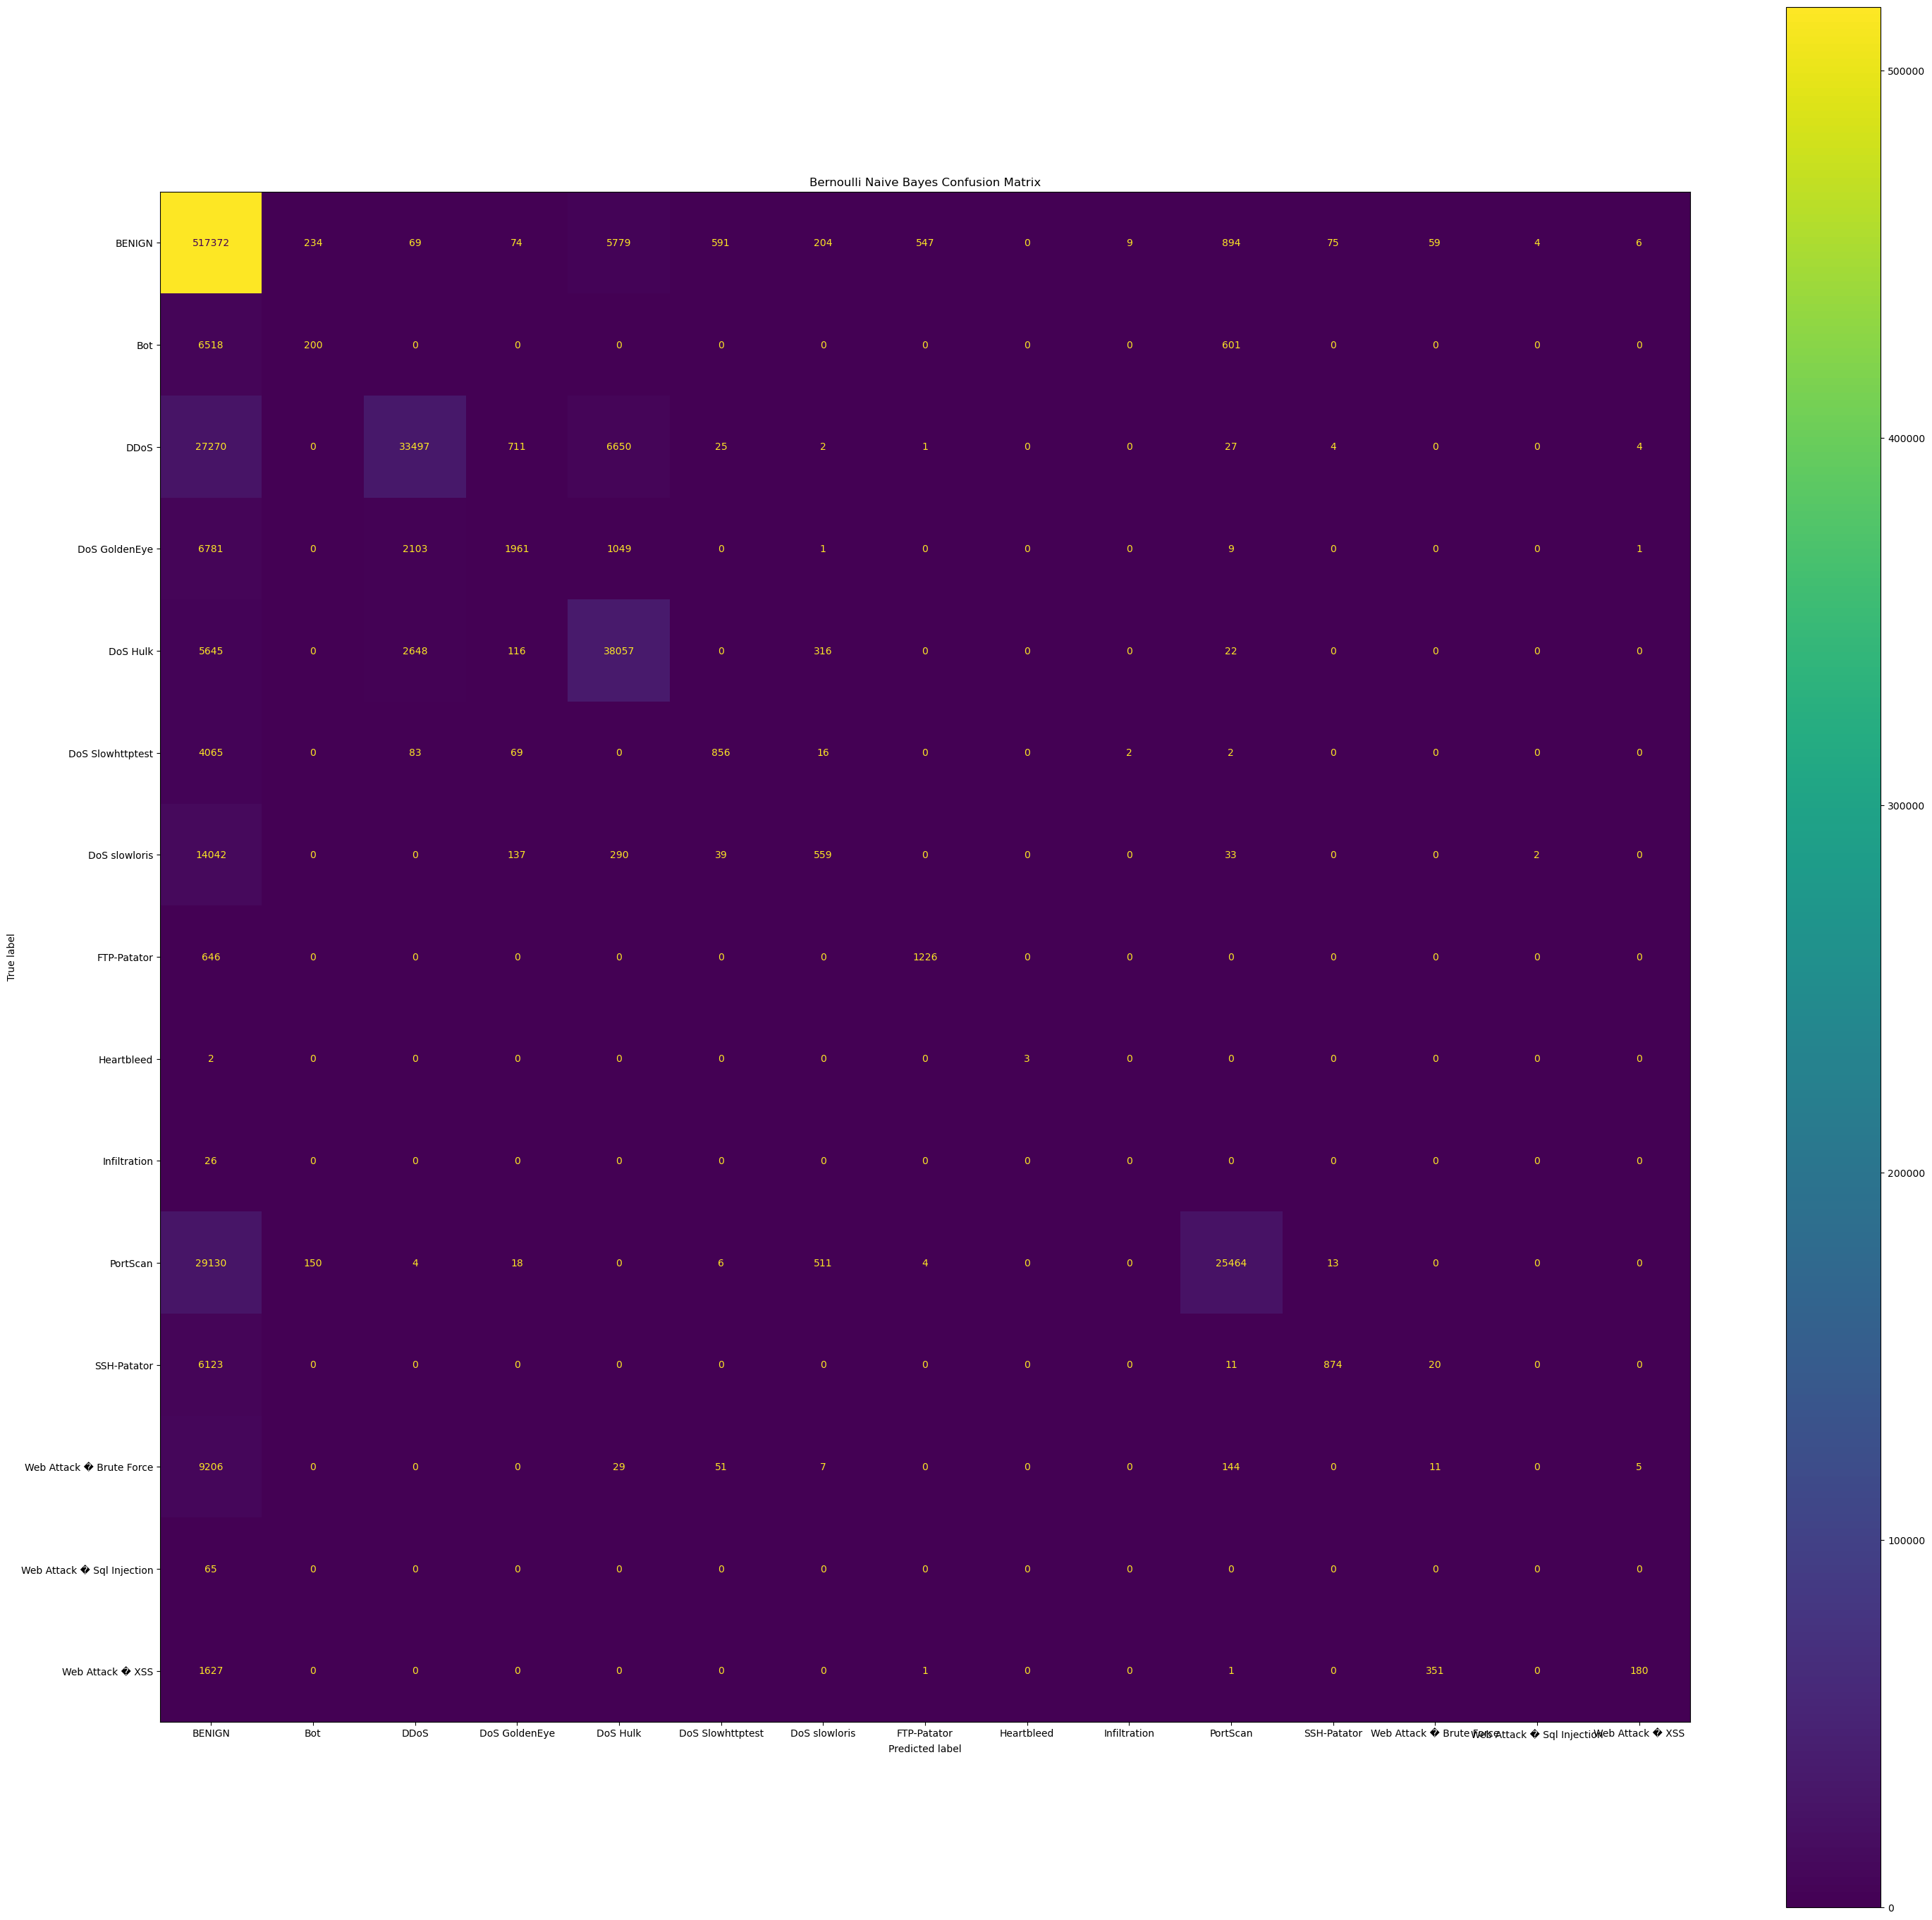

In [ ]:
confusionMatrix(predictedBNB, y_test, BNB.classes_, "Bernoulli Naive Bayes Confusion Matrix")

In [ ]:
getSummary(predictedBNB, y_test, "Bernoulli Naive Bayes")  

Bernoulli Naive Bayes: 
Accuracy: 0.8201893578758066 
Recall: 0.3072977767511769 
Precision: 0.5848126680940899 
F1 Score: 0.3563313320822847


In [ ]:
print(classification_report(predictedBNB, y_test, labels= BNB.classes_))

                            precision    recall  f1-score   support

                    BENIGN       0.82      0.98      0.90    525917
                       Bot       0.34      0.03      0.05      7319
                      DDoS       0.87      0.49      0.63     68191
             DoS GoldenEye       0.64      0.16      0.26     11905
                  DoS Hulk       0.73      0.81      0.77     46804
          DoS Slowhttptest       0.55      0.17      0.26      5093
             DoS slowloris       0.35      0.04      0.07     15102
               FTP-Patator       0.69      0.65      0.67      1872
                Heartbleed       1.00      0.60      0.75         5
              Infiltration       0.00      0.00      0.00        26
                  PortScan       0.94      0.46      0.62     55300
               SSH-Patator       0.90      0.12      0.22      7028
  Web Attack � Brute Force       0.02      0.00      0.00      9453
Web Attack � Sql Injection       0.00      0.00

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 6.81 seconds 
Execution time: 0.11 minutes


# Random Forest

In [ ]:
st = time.time()
RFC = RandomForestClassifier(n_jobs=-1)
RFC.fit(X_train, y_train)
predictedRFC = RFC.predict(X_test)
print(accuracy_score(predictedRFC, y_test))
et = time.time()

0.9979715434253676


{'Class': 0, 'TP': 628000, 'FN': 732.0, 'FP': 518.0, 'TN': 126990.0}
{'Class': 1, 'TP': 392, 'FN': 77.0, 'FP': 192.0, 'TN': 755579.0}
{'Class': 2, 'TP': 38377, 'FN': 12.0, 'FP': 27.0, 'TN': 717824.0}
{'Class': 3, 'TP': 3025, 'FN': 24.0, 'FP': 61.0, 'TN': 753130.0}
{'Class': 4, 'TP': 51714, 'FN': 107.0, 'FP': 140.0, 'TN': 704279.0}
{'Class': 5, 'TP': 1561, 'FN': 22.0, 'FP': 7.0, 'TN': 754650.0}
{'Class': 6, 'TP': 1590, 'FN': 9.0, 'FP': 26.0, 'TN': 754615.0}
{'Class': 7, 'TP': 1769, 'FN': 0.0, 'FP': 10.0, 'TN': 754461.0}
{'Class': 8, 'TP': 1, 'FN': 0.0, 'FP': 2.0, 'TN': 756237.0}
{'Class': 9, 'TP': 3, 'FN': 0.0, 'FP': 8.0, 'TN': 756229.0}
{'Class': 10, 'TP': 26939, 'FN': 305.0, 'FP': 269.0, 'TN': 728727.0}
{'Class': 11, 'TP': 936, 'FN': 16.0, 'FP': 30.0, 'TN': 755258.0}
{'Class': 12, 'TP': 334, 'FN': 131.0, 'FP': 107.0, 'TN': 755668.0}
{'Class': 13, 'TP': 1, 'FN': 0.0, 'FP': 5.0, 'TN': 756234.0}
{'Class': 14, 'TP': 64, 'FN': 99.0, 'FP': 132.0, 'TN': 755945.0}
<class 'numpy.ndarray'>


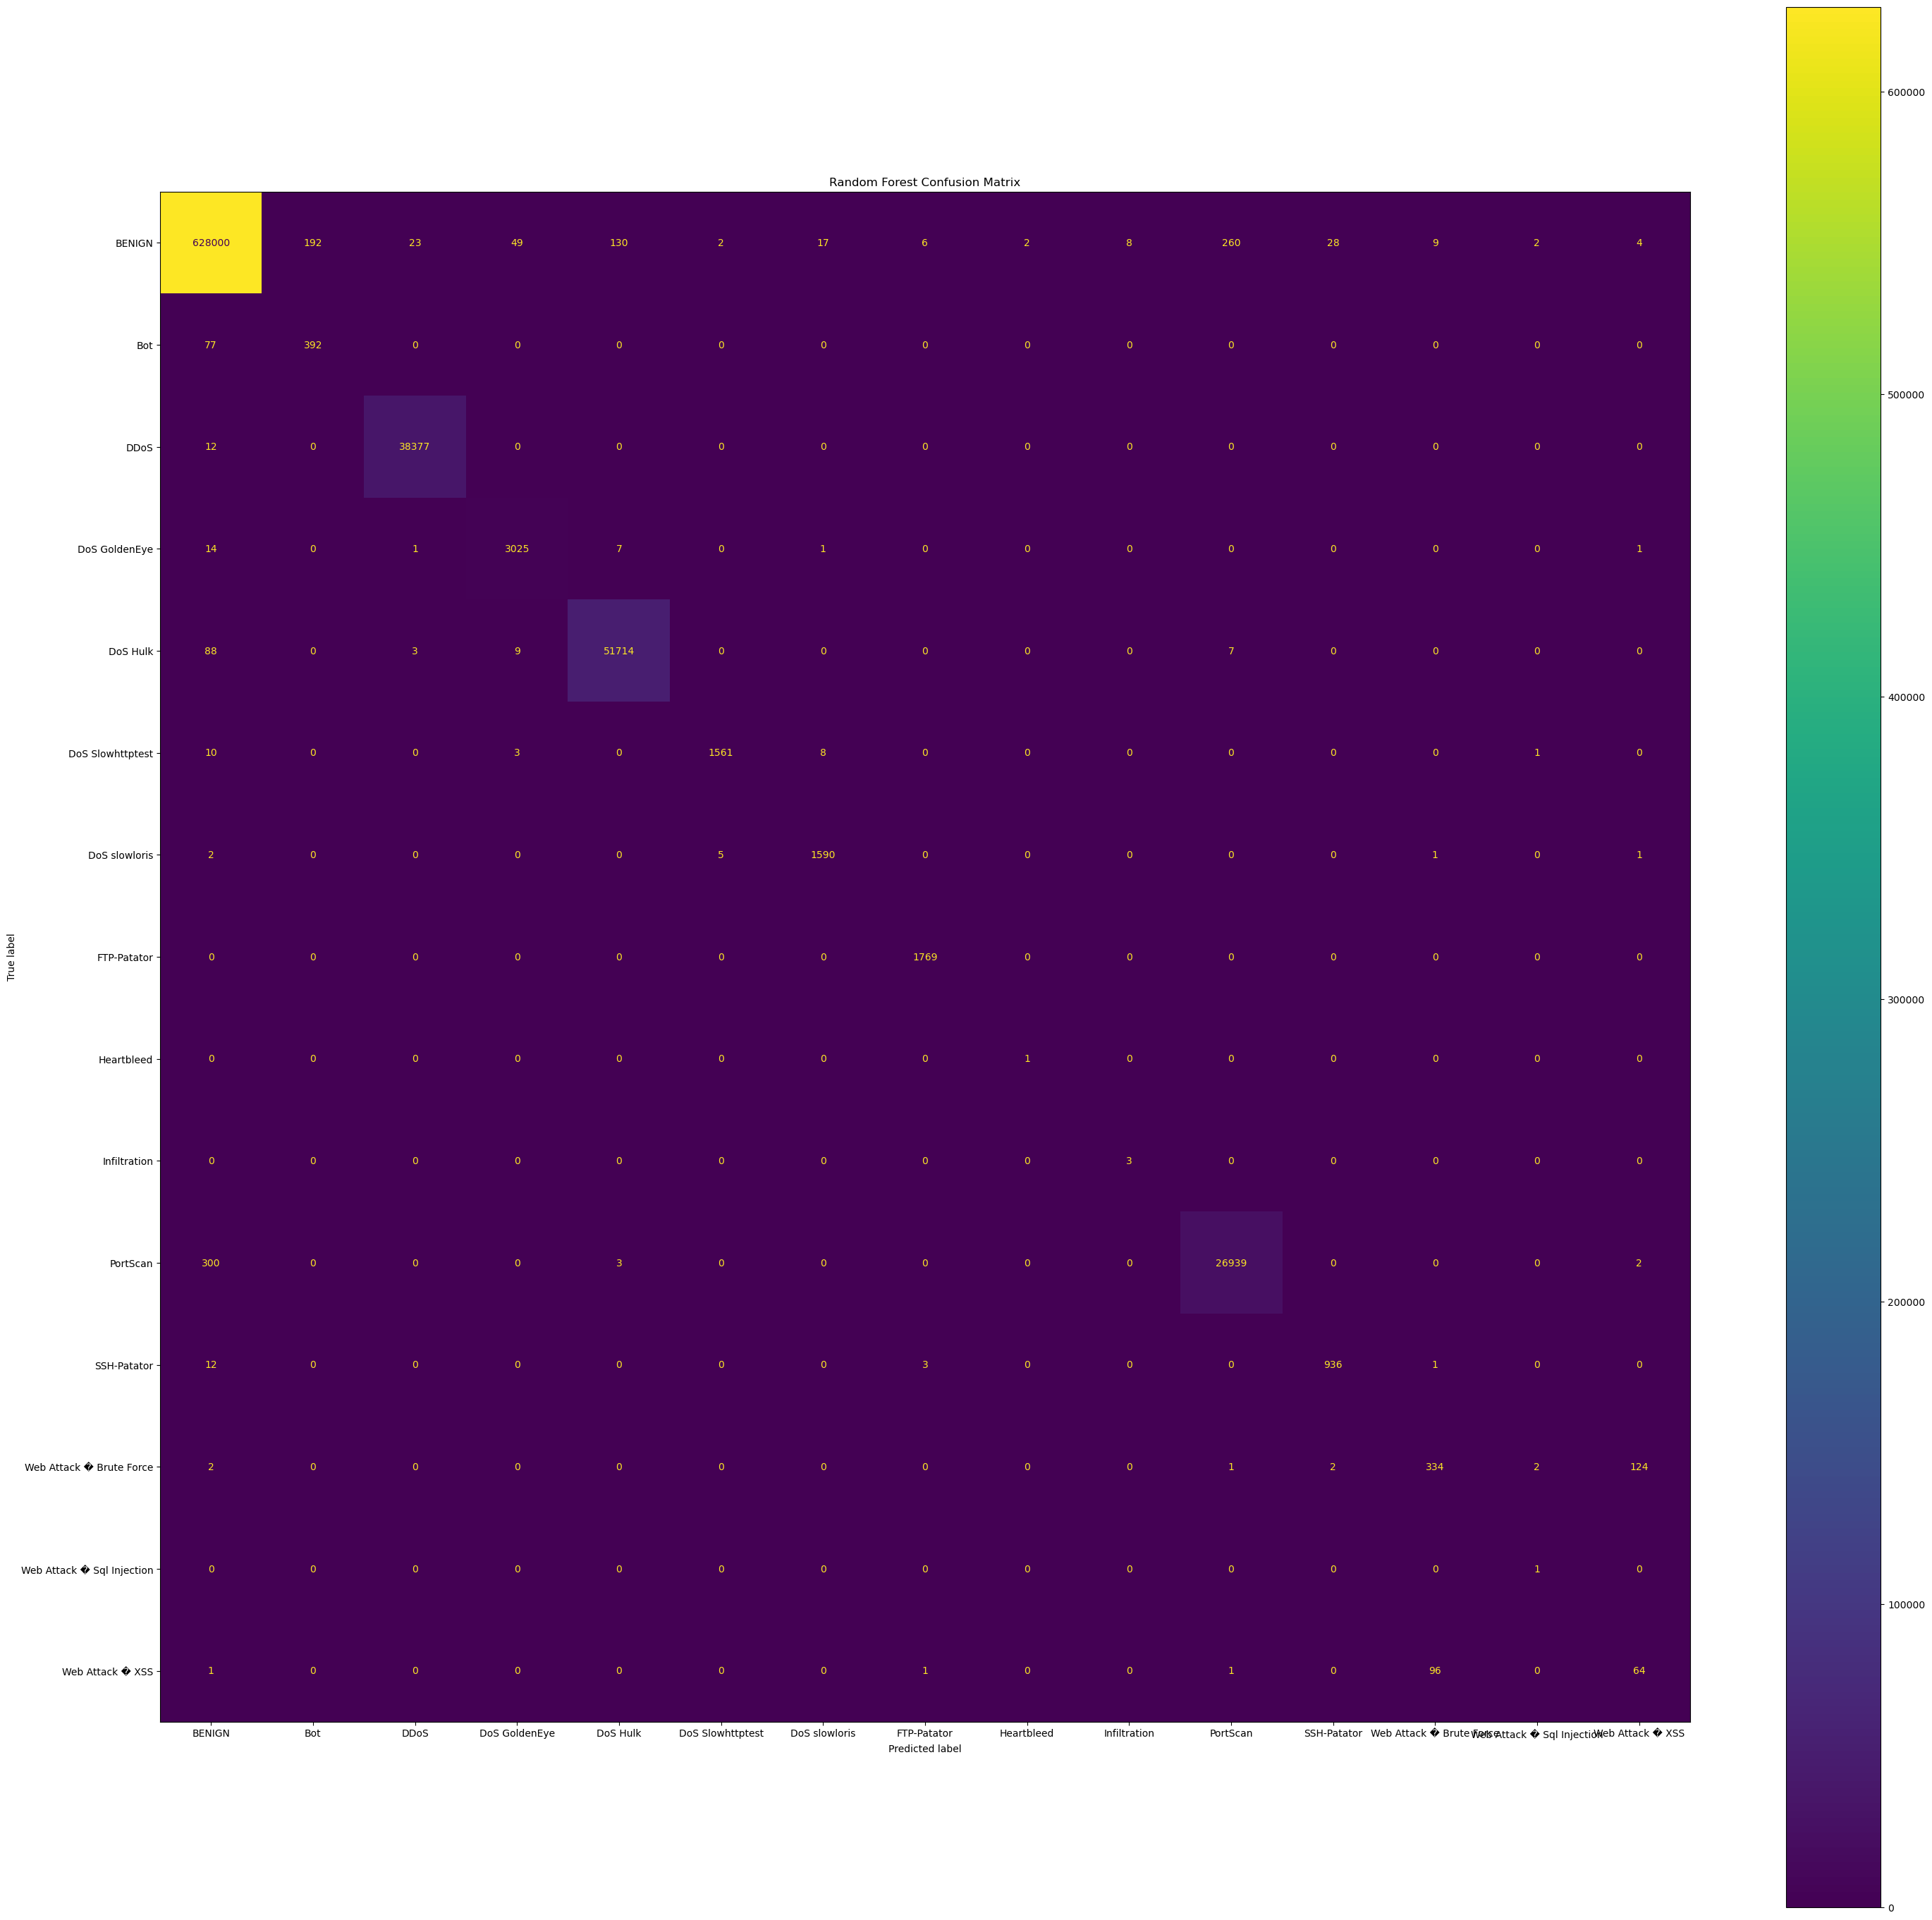

In [ ]:
confusionMatrix(predictedRFC, y_test, RFC.classes_, "Random Forest Confusion Matrix")

In [ ]:
getSummary(predictedRFC, y_test, "Random Forest")  

Random Forest: 
Accuracy: 0.9979715434253676 
Recall: 0.9258531601791049 
Precision: 0.7624499572223609 
F1 Score: 0.7985003576669302


In [ ]:
print(classification_report(predictedRFC, y_test, labels= RFC.classes_))

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    628732
                       Bot       0.67      0.84      0.74       469
                      DDoS       1.00      1.00      1.00     38389
             DoS GoldenEye       0.98      0.99      0.99      3049
                  DoS Hulk       1.00      1.00      1.00     51821
          DoS Slowhttptest       1.00      0.99      0.99      1583
             DoS slowloris       0.98      0.99      0.99      1599
               FTP-Patator       0.99      1.00      1.00      1769
                Heartbleed       0.33      1.00      0.50         1
              Infiltration       0.27      1.00      0.43         3
                  PortScan       0.99      0.99      0.99     27244
               SSH-Patator       0.97      0.98      0.98       952
  Web Attack � Brute Force       0.76      0.72      0.74       465
Web Attack � Sql Injection       0.17      1.00

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 283.77 seconds 
Execution time: 4.73 minutes


# Support Vector Machine

In [ ]:
st = time.time()
SVM = LinearSVC()
SVM.fit(X_train, y_train)
predictedSVM = SVM.predict(X_test)
print(accuracy_score(predictedSVM, y_test))
et = time.time()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9542856765048133


{'Class': 0, 'TP': 619323, 'FN': 24907.0, 'FP': 9195.0, 'TN': 102815.0}
{'Class': 1, 'TP': 0, 'FN': 7.0, 'FP': 584.0, 'TN': 755649.0}
{'Class': 2, 'TP': 26410, 'FN': 267.0, 'FP': 11994.0, 'TN': 717569.0}
{'Class': 3, 'TP': 2174, 'FN': 320.0, 'FP': 912.0, 'TN': 752834.0}
{'Class': 4, 'TP': 44511, 'FN': 175.0, 'FP': 7343.0, 'TN': 704211.0}
{'Class': 5, 'TP': 1139, 'FN': 371.0, 'FP': 429.0, 'TN': 754301.0}
{'Class': 6, 'TP': 846, 'FN': 60.0, 'FP': 770.0, 'TN': 754564.0}
{'Class': 7, 'TP': 1235, 'FN': 79.0, 'FP': 544.0, 'TN': 754382.0}
{'Class': 8, 'TP': 0, 'FN': 0.0, 'FP': 3.0, 'TN': 756237.0}
{'Class': 9, 'TP': 1, 'FN': 103.0, 'FP': 10.0, 'TN': 756126.0}
{'Class': 10, 'TP': 26030, 'FN': 8046.0, 'FP': 1178.0, 'TN': 720986.0}
{'Class': 11, 'TP': 0, 'FN': 15.0, 'FP': 966.0, 'TN': 755259.0}
{'Class': 12, 'TP': 0, 'FN': 3.0, 'FP': 441.0, 'TN': 755796.0}
{'Class': 13, 'TP': 0, 'FN': 213.0, 'FP': 6.0, 'TN': 756021.0}
{'Class': 14, 'TP': 0, 'FN': 5.0, 'FP': 196.0, 'TN': 756039.0}
<class 'numpy.n

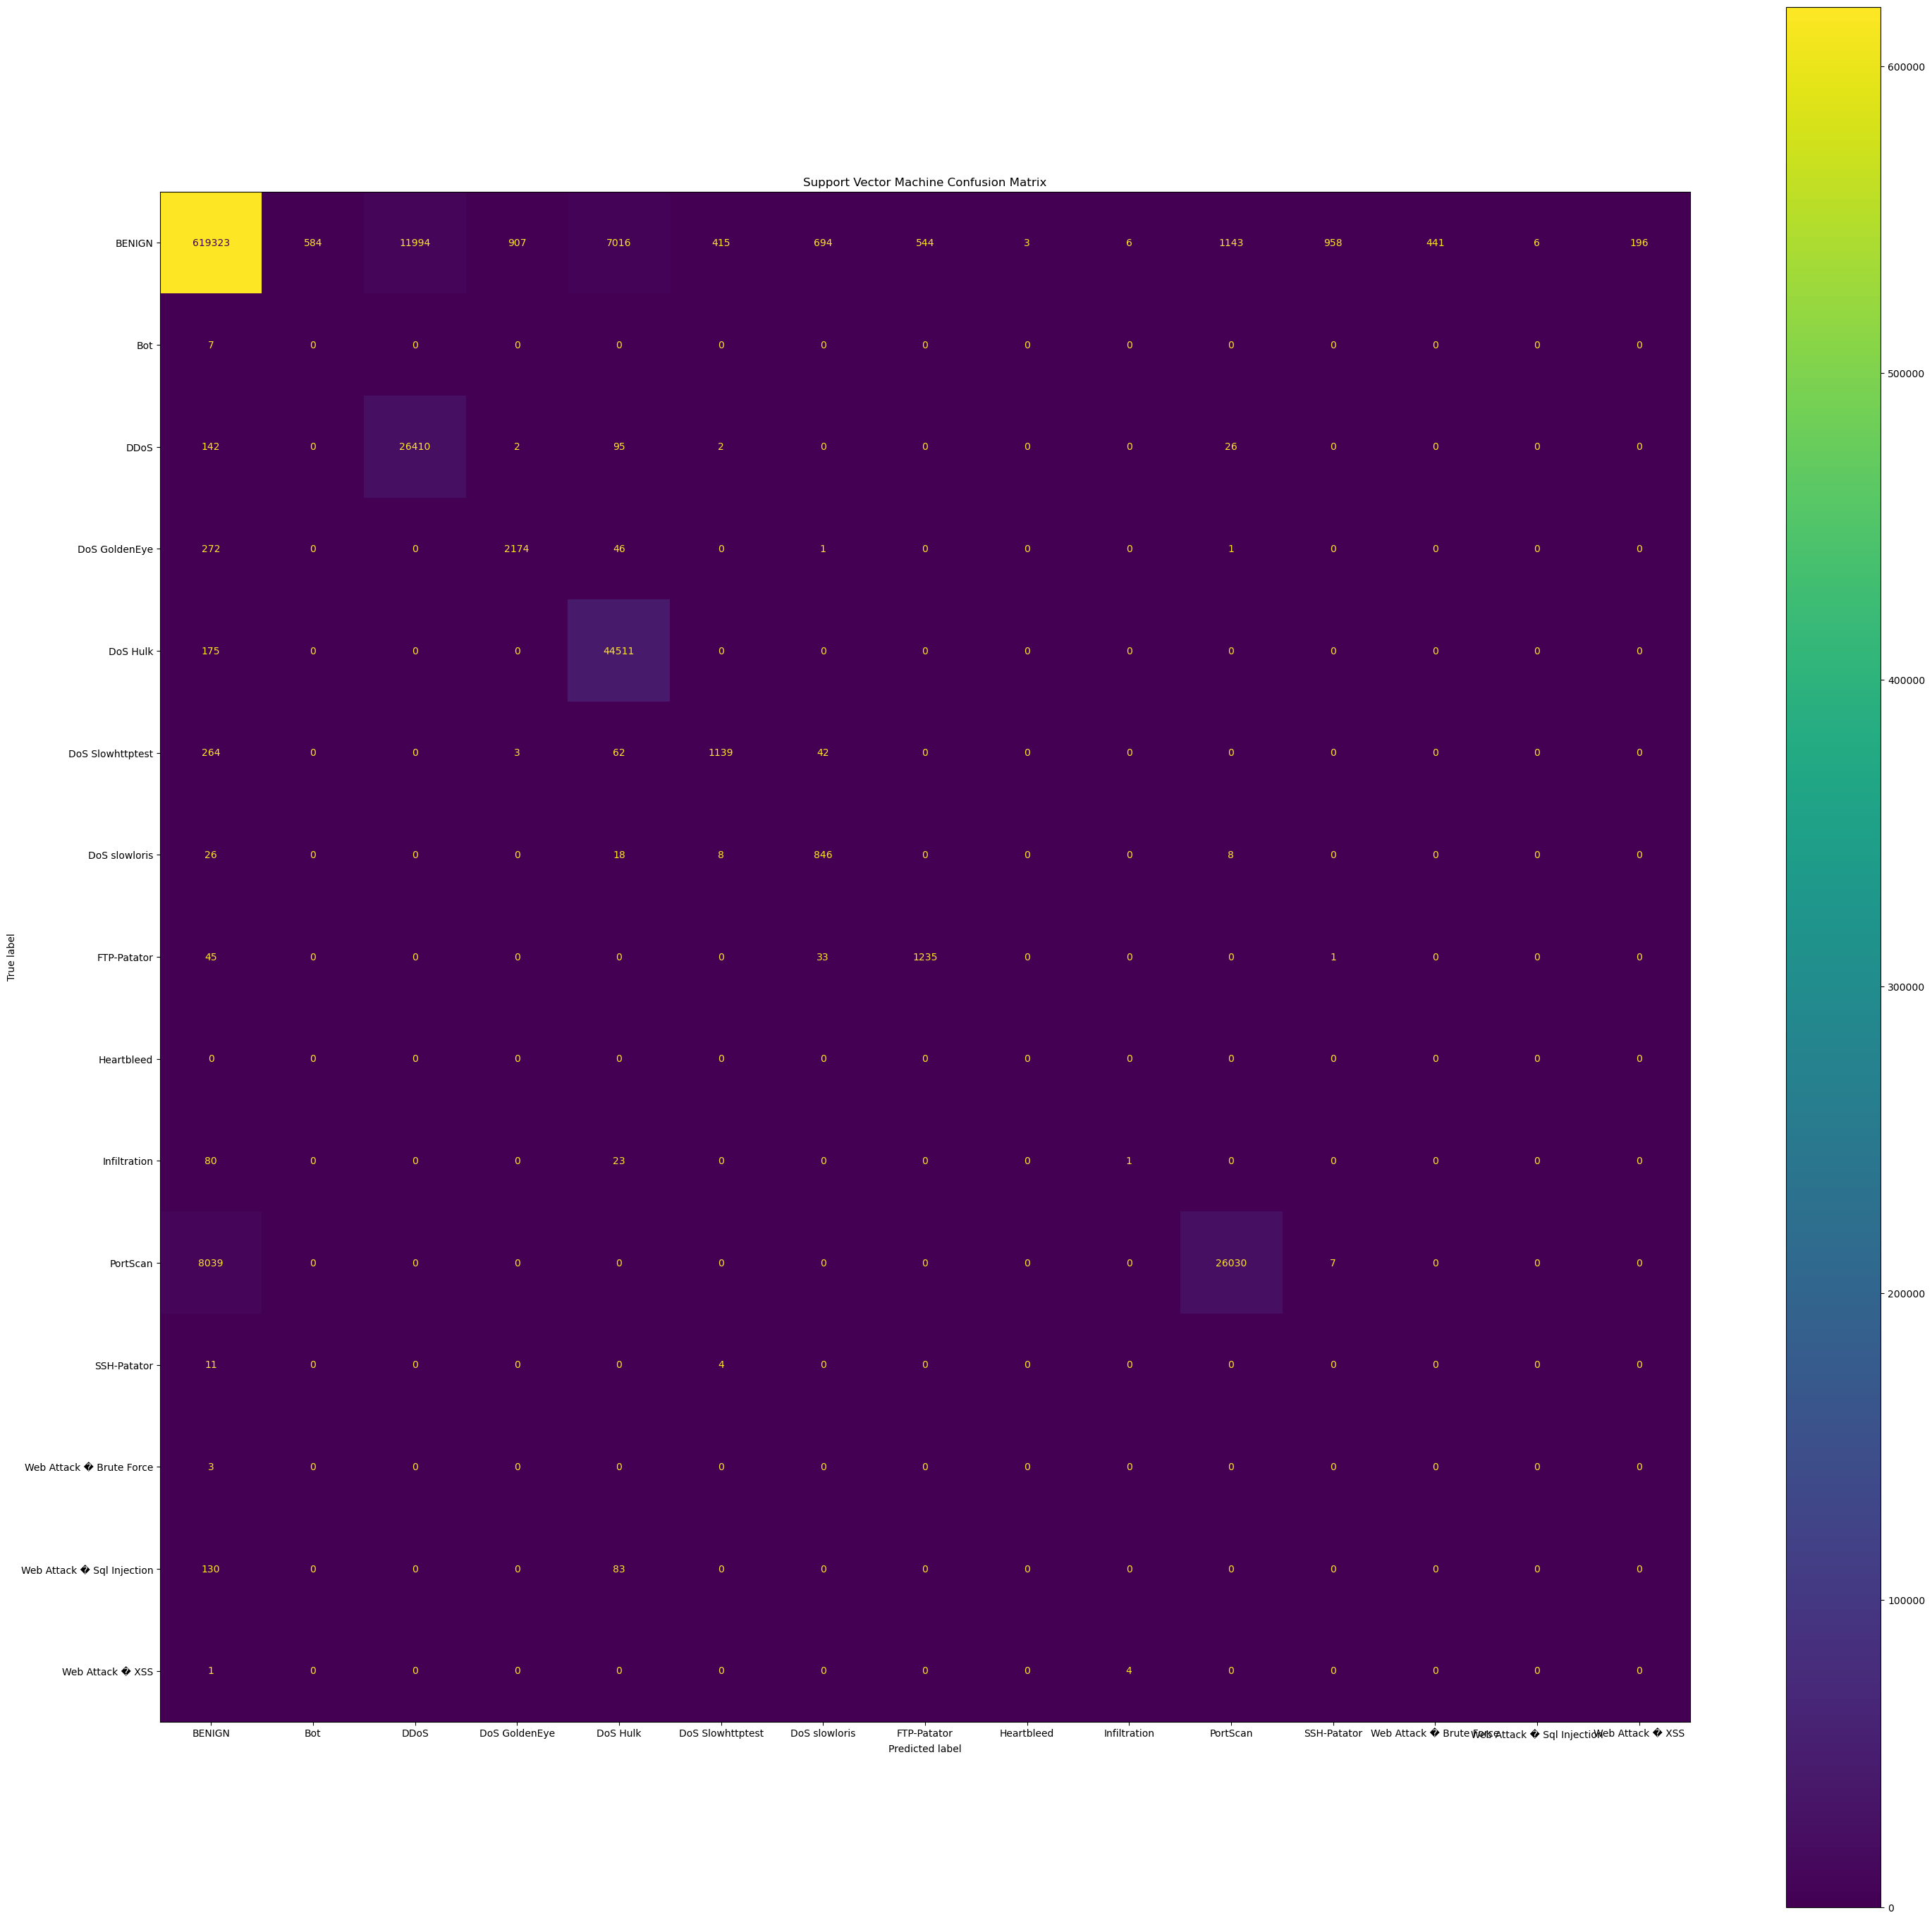

In [ ]:
confusionMatrix(predictedSVM, y_test, SVM.classes_, "Support Vector Machine Confusion Matrix")

In [ ]:
getSummary(predictedSVM, y_test, "Support Vector Machine")  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Support Vector Machine: 
Accuracy: 0.9542856765048133 
Recall: 0.48137062614685283 
Precision: 0.41517752995579543 
F1 Score: 0.4375060315518981


In [ ]:
print(classification_report(predictedSVM, y_test, labels= SVM.classes_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                            precision    recall  f1-score   support

                    BENIGN       0.99      0.96      0.97    644230
                       Bot       0.00      0.00      0.00         7
                      DDoS       0.69      0.99      0.81     26677
             DoS GoldenEye       0.70      0.87      0.78      2494
                  DoS Hulk       0.86      1.00      0.92     44686
          DoS Slowhttptest       0.73      0.75      0.74      1510
             DoS slowloris       0.52      0.93      0.67       906
               FTP-Patator       0.69      0.94      0.80      1314
                Heartbleed       0.00      0.00      0.00         0
              Infiltration       0.09      0.01      0.02       104
                  PortScan       0.96      0.76      0.85     34076
               SSH-Patator       0.00      0.00      0.00        15
  Web Attack � Brute Force       0.00      0.00      0.00         3
Web Attack � Sql Injection       0.00      0.00

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 2712.01 seconds 
Execution time: 45.20 minutes


# XGBoost




In [ ]:
print(xgb.__version__)
print(xgb.core.Booster)

1.7.5
<class 'xgboost.core.Booster'>


In [ ]:
st = time.time()
XGB = xgb.XGBClassifier(objective ="mult:softprob", random_state=666, tree_method='gpu_hist')
XGB.fit(X_train, y_trainle)
predictedXGB = XGB.predict(X_test)
print(accuracy_score(predictedXGB, y_testle))
et = time.time()

0.9979821220776474


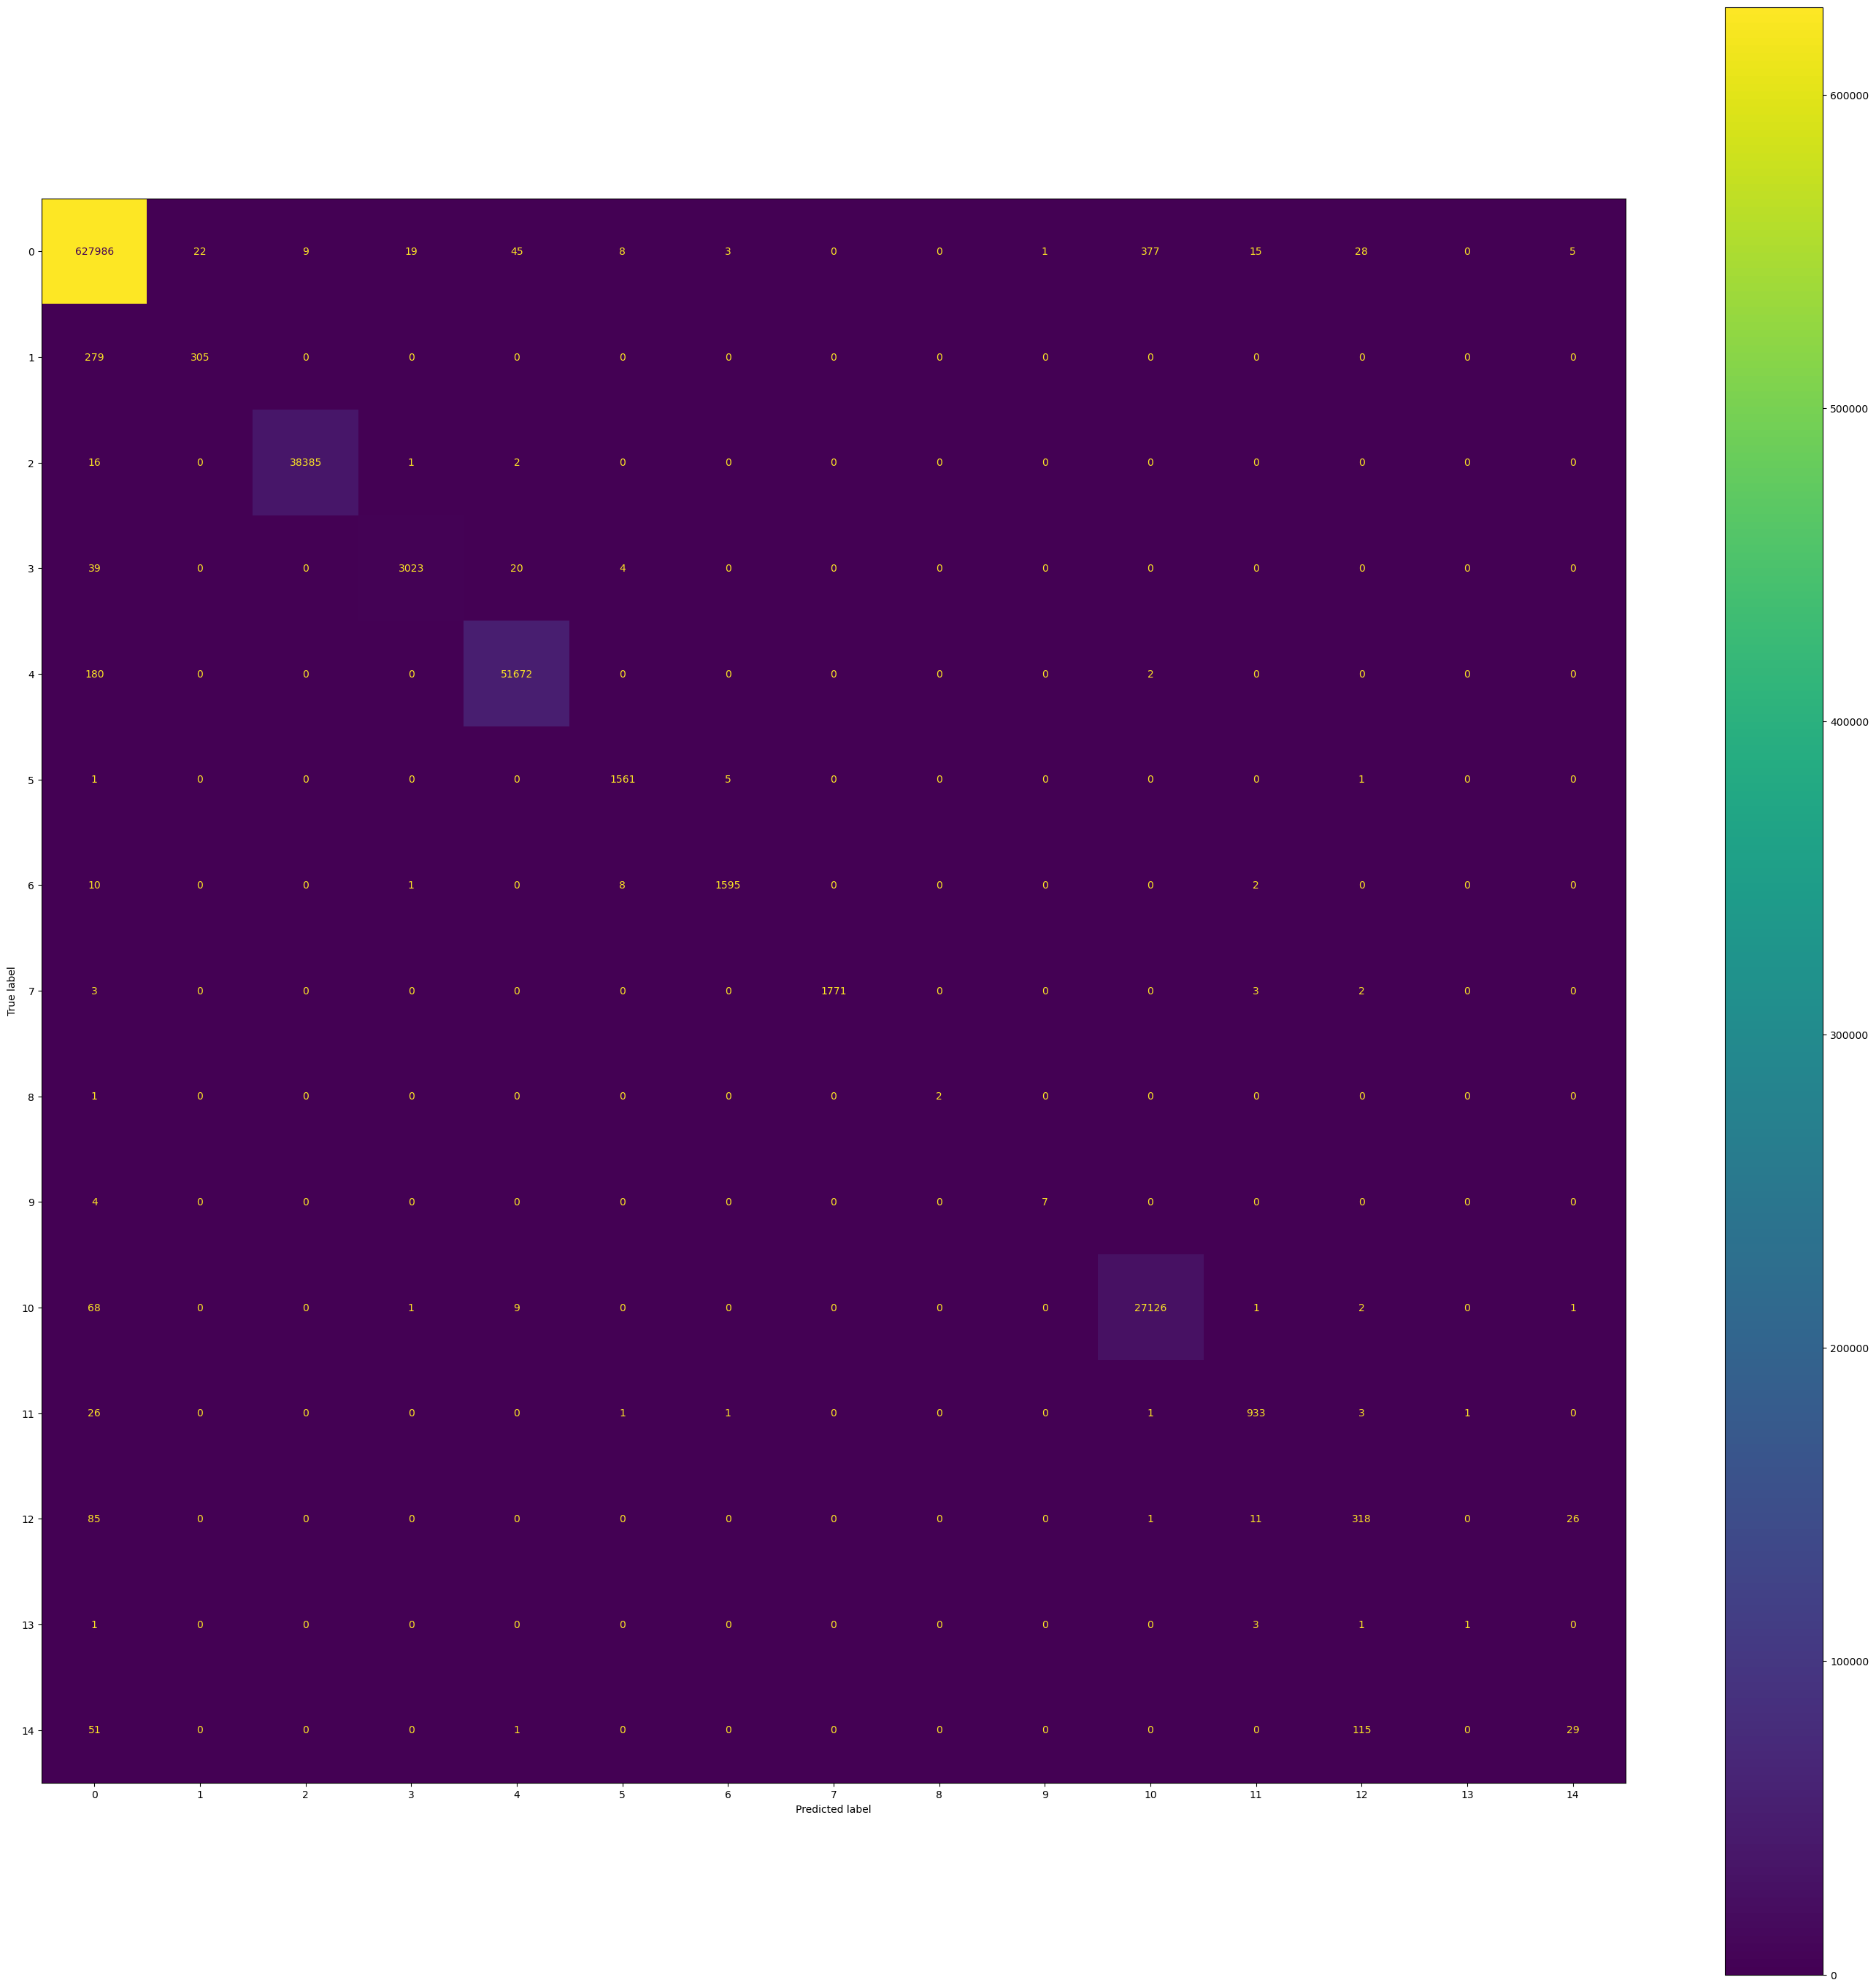

{'Class': 0, 'TP': 627986, 'FN': 532.0, 'FP': 764.0, 'TN': 126958.0}
{'Class': 1, 'TP': 305, 'FN': 279.0, 'FP': 22.0, 'TN': 755634.0}
{'Class': 2, 'TP': 38385, 'FN': 19.0, 'FP': 9.0, 'TN': 717827.0}
{'Class': 3, 'TP': 3023, 'FN': 63.0, 'FP': 22.0, 'TN': 753132.0}
{'Class': 4, 'TP': 51672, 'FN': 182.0, 'FP': 77.0, 'TN': 704309.0}
{'Class': 5, 'TP': 1561, 'FN': 7.0, 'FP': 21.0, 'TN': 754651.0}
{'Class': 6, 'TP': 1595, 'FN': 21.0, 'FP': 9.0, 'TN': 754615.0}
{'Class': 7, 'TP': 1771, 'FN': 8.0, 'FP': 0.0, 'TN': 754461.0}
{'Class': 8, 'TP': 2, 'FN': 1.0, 'FP': 0.0, 'TN': 756237.0}
{'Class': 9, 'TP': 7, 'FN': 4.0, 'FP': 1.0, 'TN': 756228.0}
{'Class': 10, 'TP': 27126, 'FN': 82.0, 'FP': 381.0, 'TN': 728651.0}
{'Class': 11, 'TP': 933, 'FN': 33.0, 'FP': 35.0, 'TN': 755239.0}
{'Class': 12, 'TP': 318, 'FN': 123.0, 'FP': 152.0, 'TN': 755647.0}
{'Class': 13, 'TP': 1, 'FN': 5.0, 'FP': 1.0, 'TN': 756233.0}
{'Class': 14, 'TP': 29, 'FN': 167.0, 'FP': 32.0, 'TN': 756012.0}


In [ ]:
cm = confusion_matrix(y_testle, predictedXGB )
CmDisp = ConfusionMatrixDisplay(confusion_matrix= cm)
fig, ax = plt.subplots(figsize = (35,35))
CmDisp.plot(ax=ax)
plt.show()
counts_from_confusion(cm)

In [ ]:
getSummary(predictedXGB, y_testle, "XGBoost")  

XGBoost: 
Accuracy: 0.9979821220776474 
Recall: 0.8920447672347479 
Precision: 0.7851071668172277 
F1 Score: 0.8198940009074708


In [ ]:
print(classification_report(predictedXGB, y_testle, labels= XGB.classes_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    628750
           1       0.52      0.93      0.67       327
           2       1.00      1.00      1.00     38394
           3       0.98      0.99      0.99      3045
           4       1.00      1.00      1.00     51749
           5       1.00      0.99      0.99      1582
           6       0.99      0.99      0.99      1604
           7       1.00      1.00      1.00      1771
           8       0.67      1.00      0.80         2
           9       0.64      0.88      0.74         8
          10       1.00      0.99      0.99     27507
          11       0.97      0.96      0.96       968
          12       0.72      0.68      0.70       470
          13       0.17      0.50      0.25         2
          14       0.15      0.48      0.23        61

    accuracy                           1.00    756240
   macro avg       0.79      0.89      0.82    756240
weighted avg       1.00   

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 13.81 seconds 
Execution time: 0.23 minutes


# ANN



In [ ]:

# Define the model architecture
def create_model(num_neurons=64, activation='relu', num_epochs = 10):
  model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_neurons, activation=activation, input_shape=(30,)),
        tf.keras.layers.Dense(num_neurons, activation=activation),
        tf.keras.layers.Dense(15, activation='softmax')
    ])
    # Compile the model
  model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

  return model

# Define the parameter grid
param_grid = {'num_neurons': [32, 64, 128],
              'activation': ['relu', 'tanh', 'swish'],
              'num_epochs': [5,10,20,30]}
# Add an early stopping function
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

st = time.time()
# Create a model
model = KerasClassifier(build_fn=create_model,  batch_size=32, verbose=1)

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train, y_trainle)


# Use the best parameters to retrain the model
best_model = create_model(num_neurons=grid_result.best_params_['num_neurons'],
                          activation=grid_result.best_params_['activation'],
                          num_epochs=grid_result.best_params_['num_epochs'])

best_model.fit(X_train, y_trainle, epochs=grid_result.best_params_['num_epochs'], validation_data=(X_test, y_testle), callbacks=[early_stopping], verbose=1)



# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

test_loss, test_accuracy = best_model.evaluate(X_test, y_testle, verbose=0)

predictedANN = best_model.predict(X_test).argmax(axis=1)

print('Accuracy:', test_accuracy)
et = time.time()

C:\Users\Jack\AppData\Local\Temp\ipykernel_7516\4084352868.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,  batch_size=32, verbose=1)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
55143/55143 [==============================] - 99s 2ms/step - loss: 0.0605 - accuracy: 0.9760
Epoch 1/30
55143/55143 [==============================] - 129s 2ms/step - loss: 0.0599 - accuracy: 0.9762 - val_loss: 0.0463 - val_accuracy: 0.9796
Epoch 2/30
55143/55143 [==============================] - 129s 2ms/step - loss: 0.0442 - accuracy: 0.9805 - val_loss: 0.0508 - val_accuracy: 0.9820
Epoch 3/30
55143/55143 [==============================] - 130s 2ms/step - loss: 0.0420 - accuracy: 0.9811 - val_loss: 0.0402 - val_accuracy: 0.9829
Epoch 4/30
55143/55143 [==============================] - 130s 2ms/step - loss: 0.0414 - accuracy: 0.9817 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch 5/30
55143/55143 [==============================] - 129s 2ms/step - loss: 0.0392 - accuracy: 0.9823 - val_loss: 0.0391 - val_accuracy: 0.9819
Epoch 6/30
55143/55143 [==============================] - 130s 2ms/step - loss: 0.0390 - accuracy: 0.982

In [ ]:
unique, counts = np.unique(le.inverse_transform(y_testle), return_counts=True)
print(np.asarray((unique, counts)).T)

[['BENIGN' 628518]
 ['Bot' 584]
 ['DDoS' 38404]
 ['DoS GoldenEye' 3086]
 ['DoS Hulk' 51854]
 ['DoS Slowhttptest' 1568]
 ['DoS slowloris' 1616]
 ['FTP-Patator' 1779]
 ['Heartbleed' 3]
 ['Infiltration' 11]
 ['PortScan' 27208]
 ['SSH-Patator' 966]
 ['Web Attack � Brute Force' 441]
 ['Web Attack � Sql Injection' 6]
 ['Web Attack � XSS' 196]]


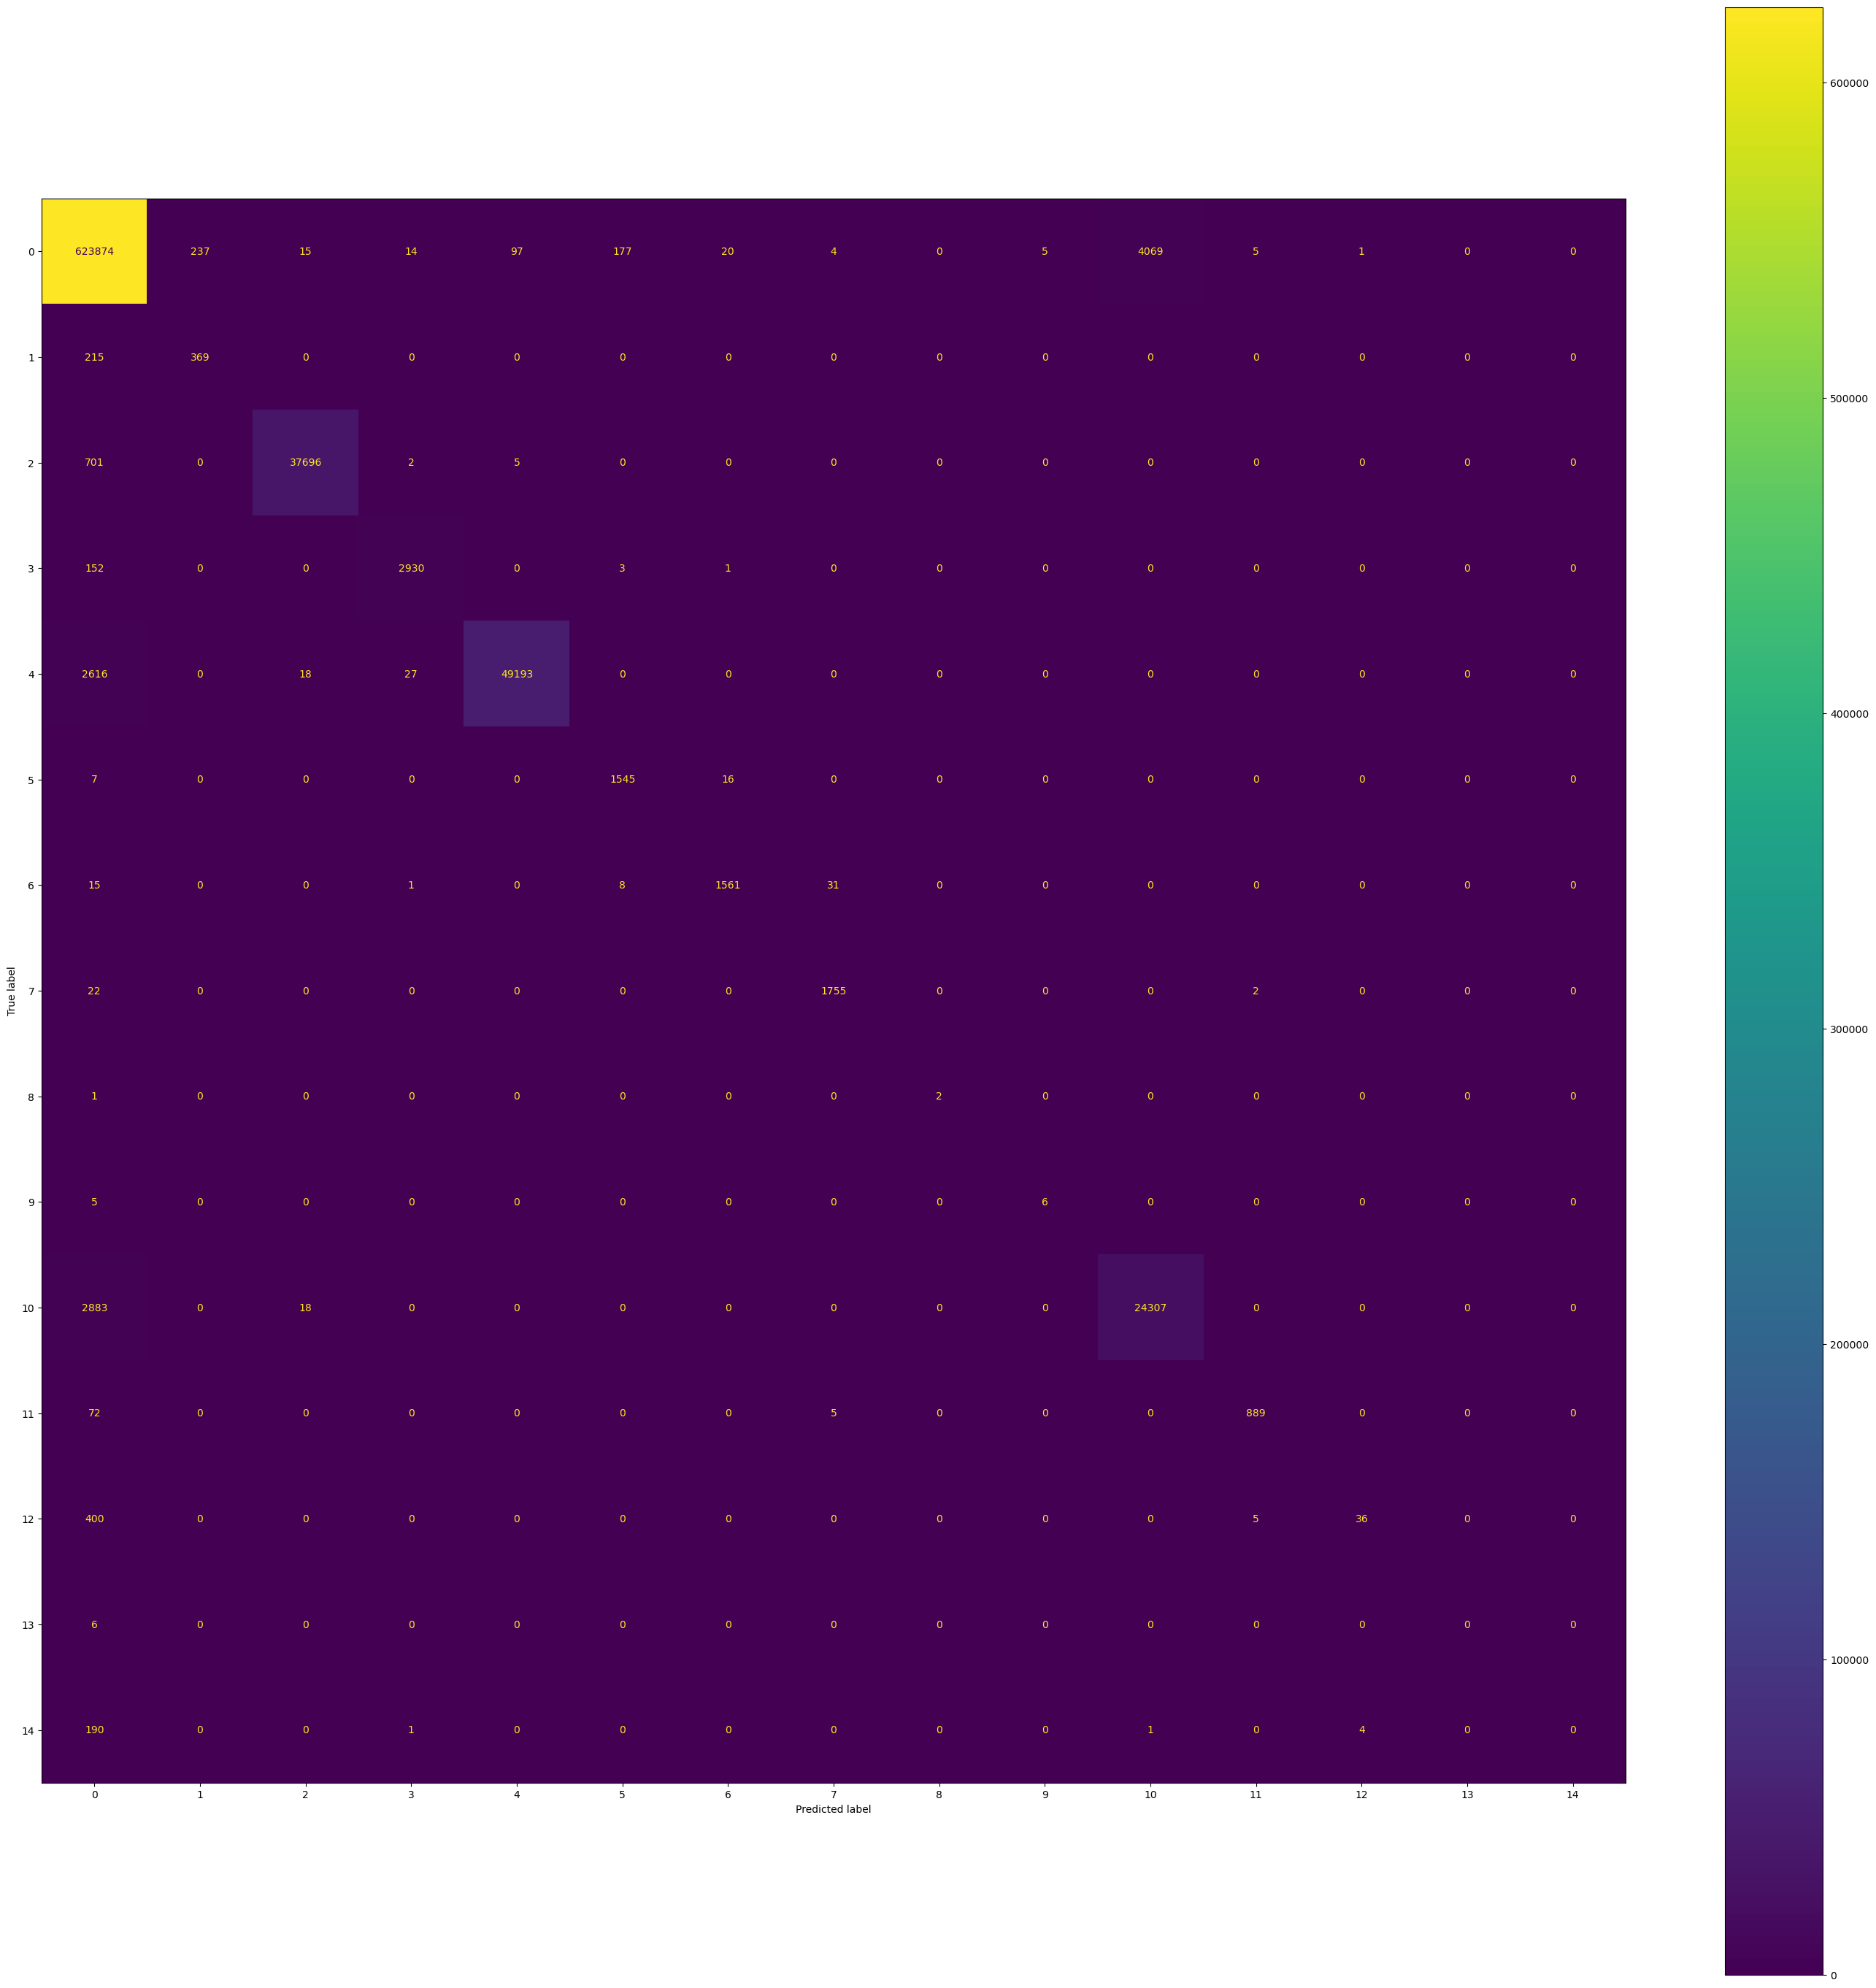

{'Class': 0, 'TP': 623874, 'FN': 4644.0, 'FP': 7285.0, 'TN': 120437.0}
{'Class': 1, 'TP': 369, 'FN': 215.0, 'FP': 237.0, 'TN': 755419.0}
{'Class': 2, 'TP': 37696, 'FN': 708.0, 'FP': 51.0, 'TN': 717785.0}
{'Class': 3, 'TP': 2930, 'FN': 156.0, 'FP': 45.0, 'TN': 753109.0}
{'Class': 4, 'TP': 49193, 'FN': 2661.0, 'FP': 102.0, 'TN': 704284.0}
{'Class': 5, 'TP': 1545, 'FN': 23.0, 'FP': 188.0, 'TN': 754484.0}
{'Class': 6, 'TP': 1561, 'FN': 55.0, 'FP': 37.0, 'TN': 754587.0}
{'Class': 7, 'TP': 1755, 'FN': 24.0, 'FP': 40.0, 'TN': 754421.0}
{'Class': 8, 'TP': 2, 'FN': 1.0, 'FP': 0.0, 'TN': 756237.0}
{'Class': 9, 'TP': 6, 'FN': 5.0, 'FP': 5.0, 'TN': 756224.0}
{'Class': 10, 'TP': 24307, 'FN': 2901.0, 'FP': 4070.0, 'TN': 724962.0}
{'Class': 11, 'TP': 889, 'FN': 77.0, 'FP': 12.0, 'TN': 755262.0}
{'Class': 12, 'TP': 36, 'FN': 405.0, 'FP': 5.0, 'TN': 755794.0}
{'Class': 13, 'TP': 0, 'FN': 6.0, 'FP': 0.0, 'TN': 756234.0}
{'Class': 14, 'TP': 0, 'FN': 196.0, 'FP': 0.0, 'TN': 756044.0}


In [ ]:
#confusionMatrix(predictedANN, y_testANN, classlabel, "Artificial Neural Network Confusion Matrix")
cm = confusion_matrix(y_testle, predictedANN)
CmDisp = ConfusionMatrixDisplay(confusion_matrix= cm)
fig, ax = plt.subplots(figsize = (35,35))
CmDisp.plot(ax=ax)
plt.show()
counts_from_confusion(cm)

In [ ]:
getSummary(predictedANN, y_testle, "Artificial Neural Network")  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Artificial Neural Network: 
Accuracy: 0.9840302020522586 
Recall: 0.7794440412051228 
Precision: 0.7032922542140209 
F1 Score: 0.7167700538926681


In [ ]:
print(classification_report(predictedANN, y_testle))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    631159
           1       0.63      0.61      0.62       606
           2       0.98      1.00      0.99     37747
           3       0.95      0.98      0.97      2975
           4       0.95      1.00      0.97     49295
           5       0.99      0.89      0.94      1733
           6       0.97      0.98      0.97      1598
           7       0.99      0.98      0.98      1795
           8       0.67      1.00      0.80         2
           9       0.55      0.55      0.55        11
          10       0.89      0.86      0.87     28377
          11       0.92      0.99      0.95       901
          12       0.08      0.88      0.15        41
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0

    accuracy                           0.98    756240
   macro avg       0.70      0.78      0.72    756240
weighted avg       0.98   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 11520.11 seconds 
Execution time: 192.00 minutes


# SMOTE

Class=0, n=2095057 (83.111%)
Class=2, n=128014 (5.078%)
Class=10, n=90694 (3.598%)
Class=1, n=1948 (0.077%)
Class=9, n=36 (0.001%)
Class=12, n=1470 (0.058%)
Class=14, n=652 (0.026%)
Class=13, n=21 (0.001%)
Class=7, n=5931 (0.235%)
Class=11, n=3219 (0.128%)
Class=6, n=5385 (0.214%)
Class=5, n=5228 (0.207%)
Class=4, n=172846 (6.857%)
Class=3, n=10286 (0.408%)
Class=8, n=11 (0.000%)


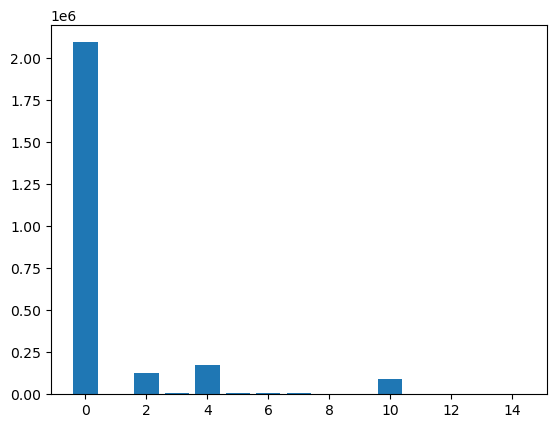

In [ ]:
ytest = LabelEncoder().fit_transform(y)
counter = Counter(ytest)
for k,v in counter.items():
  per = v / len(ytest) * 100
  print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
### training data sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy='not majority', n_jobs=-1)
under = RandomUnderSampler(sampling_strategy={'BENIGN':200000})
steps = [('u', under), ('o', over)]
Smotepipeline = Pipeline(steps=steps)
X_train_resampled, y_train_resampled = Smotepipeline.fit_resample(X_train, y_train)

#sampling_strategy = { 'DDoS':128014, "FTP-Patator":128014,"DoS slowloris":128014,"PortScan":128014,"SSH-Patator":128014,"SSH-Patator":128014,"DoS Slowhttptest":128014,"DoS GoldenEye":128014,"Bot":128014,"Web Attack � Brute Force":128014,"Web Attack � XSS":128014,"Infiltration":128014,"Web Attack � Sql Injection":128014,"Heartbleed":128014}

# Perform SMOTE on the training data
#smote = SMOTE(sampling_strategy='auto', random_state=42)
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\imblearn\over_sampling\_smote\base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
y_train_resampled.value_counts()

BENIGN                        200000
Bot                           200000
DDoS                          200000
DoS GoldenEye                 200000
DoS Hulk                      200000
DoS Slowhttptest              200000
DoS slowloris                 200000
FTP-Patator                   200000
Heartbleed                    200000
Infiltration                  200000
PortScan                      200000
SSH-Patator                   200000
Web Attack � Brute Force      200000
Web Attack � Sql Injection    200000
Web Attack � XSS              200000
Name: label, dtype: int64

Class=0, n=200000 (6.667%)
Class=1, n=200000 (6.667%)
Class=2, n=200000 (6.667%)
Class=3, n=200000 (6.667%)
Class=4, n=200000 (6.667%)
Class=5, n=200000 (6.667%)
Class=6, n=200000 (6.667%)
Class=7, n=200000 (6.667%)
Class=8, n=200000 (6.667%)
Class=9, n=200000 (6.667%)
Class=10, n=200000 (6.667%)
Class=11, n=200000 (6.667%)
Class=12, n=200000 (6.667%)
Class=13, n=200000 (6.667%)
Class=14, n=200000 (6.667%)


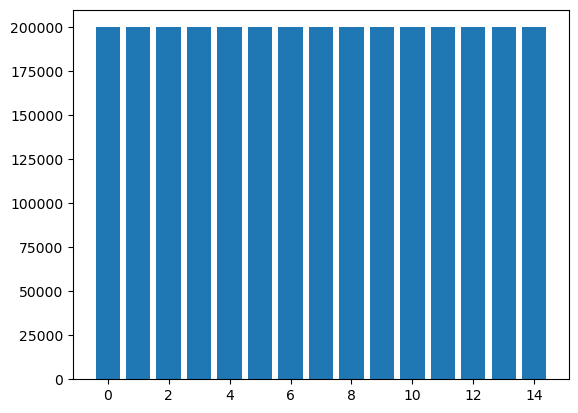

In [ ]:
ytest = LabelEncoder().fit_transform(y_train_resampled)
counter = Counter(ytest)
for k,v in counter.items():
 per = v / len(ytest) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [ ]:
del ytest

In [ ]:
y_trainleSmote = le.fit_transform(y_train_resampled)

In [ ]:
y_trainleSmote

array([ 0,  0,  0, ..., 14, 14, 14])

In [ ]:
y_train_resampled

0                    BENIGN
1                    BENIGN
2                    BENIGN
3                    BENIGN
4                    BENIGN
                 ...       
2999995    Web Attack � XSS
2999996    Web Attack � XSS
2999997    Web Attack � XSS
2999998    Web Attack � XSS
2999999    Web Attack � XSS
Name: label, Length: 3000000, dtype: object

# KNN Classifier After SMOTE

In [ ]:
st = time.time()
KNNSmote = KNeighborsClassifier(n_neighbors=3)
KNNSmote.fit(X_train_resampled, y_train_resampled)
predictedKNNSmote = KNNSmote.predict(X_test)
print(accuracy_score(predictedKNNSmote, y_test))
et = time.time()

0.9858140272929229


{'Class': 0, 'TP': 618271, 'FN': 130.0, 'FP': 10247.0, 'TN': 127592.0}
{'Class': 1, 'TP': 557, 'FN': 2097.0, 'FP': 27.0, 'TN': 753559.0}
{'Class': 2, 'TP': 38390, 'FN': 158.0, 'FP': 14.0, 'TN': 717678.0}
{'Class': 3, 'TP': 3071, 'FN': 355.0, 'FP': 15.0, 'TN': 752799.0}
{'Class': 4, 'TP': 51789, 'FN': 815.0, 'FP': 65.0, 'TN': 703571.0}
{'Class': 5, 'TP': 1562, 'FN': 186.0, 'FP': 6.0, 'TN': 754486.0}
{'Class': 6, 'TP': 1592, 'FN': 112.0, 'FP': 24.0, 'TN': 754512.0}
{'Class': 7, 'TP': 1772, 'FN': 48.0, 'FP': 7.0, 'TN': 754413.0}
{'Class': 8, 'TP': 2, 'FN': 0.0, 'FP': 1.0, 'TN': 756237.0}
{'Class': 9, 'TP': 9, 'FN': 139.0, 'FP': 2.0, 'TN': 756090.0}
{'Class': 10, 'TP': 27155, 'FN': 5943.0, 'FP': 53.0, 'TN': 723089.0}
{'Class': 11, 'TP': 961, 'FN': 212.0, 'FP': 5.0, 'TN': 755062.0}
{'Class': 12, 'TP': 268, 'FN': 198.0, 'FP': 173.0, 'TN': 755601.0}
{'Class': 13, 'TP': 1, 'FN': 57.0, 'FP': 5.0, 'TN': 756177.0}
{'Class': 14, 'TP': 112, 'FN': 278.0, 'FP': 84.0, 'TN': 755766.0}
<class 'numpy.nda

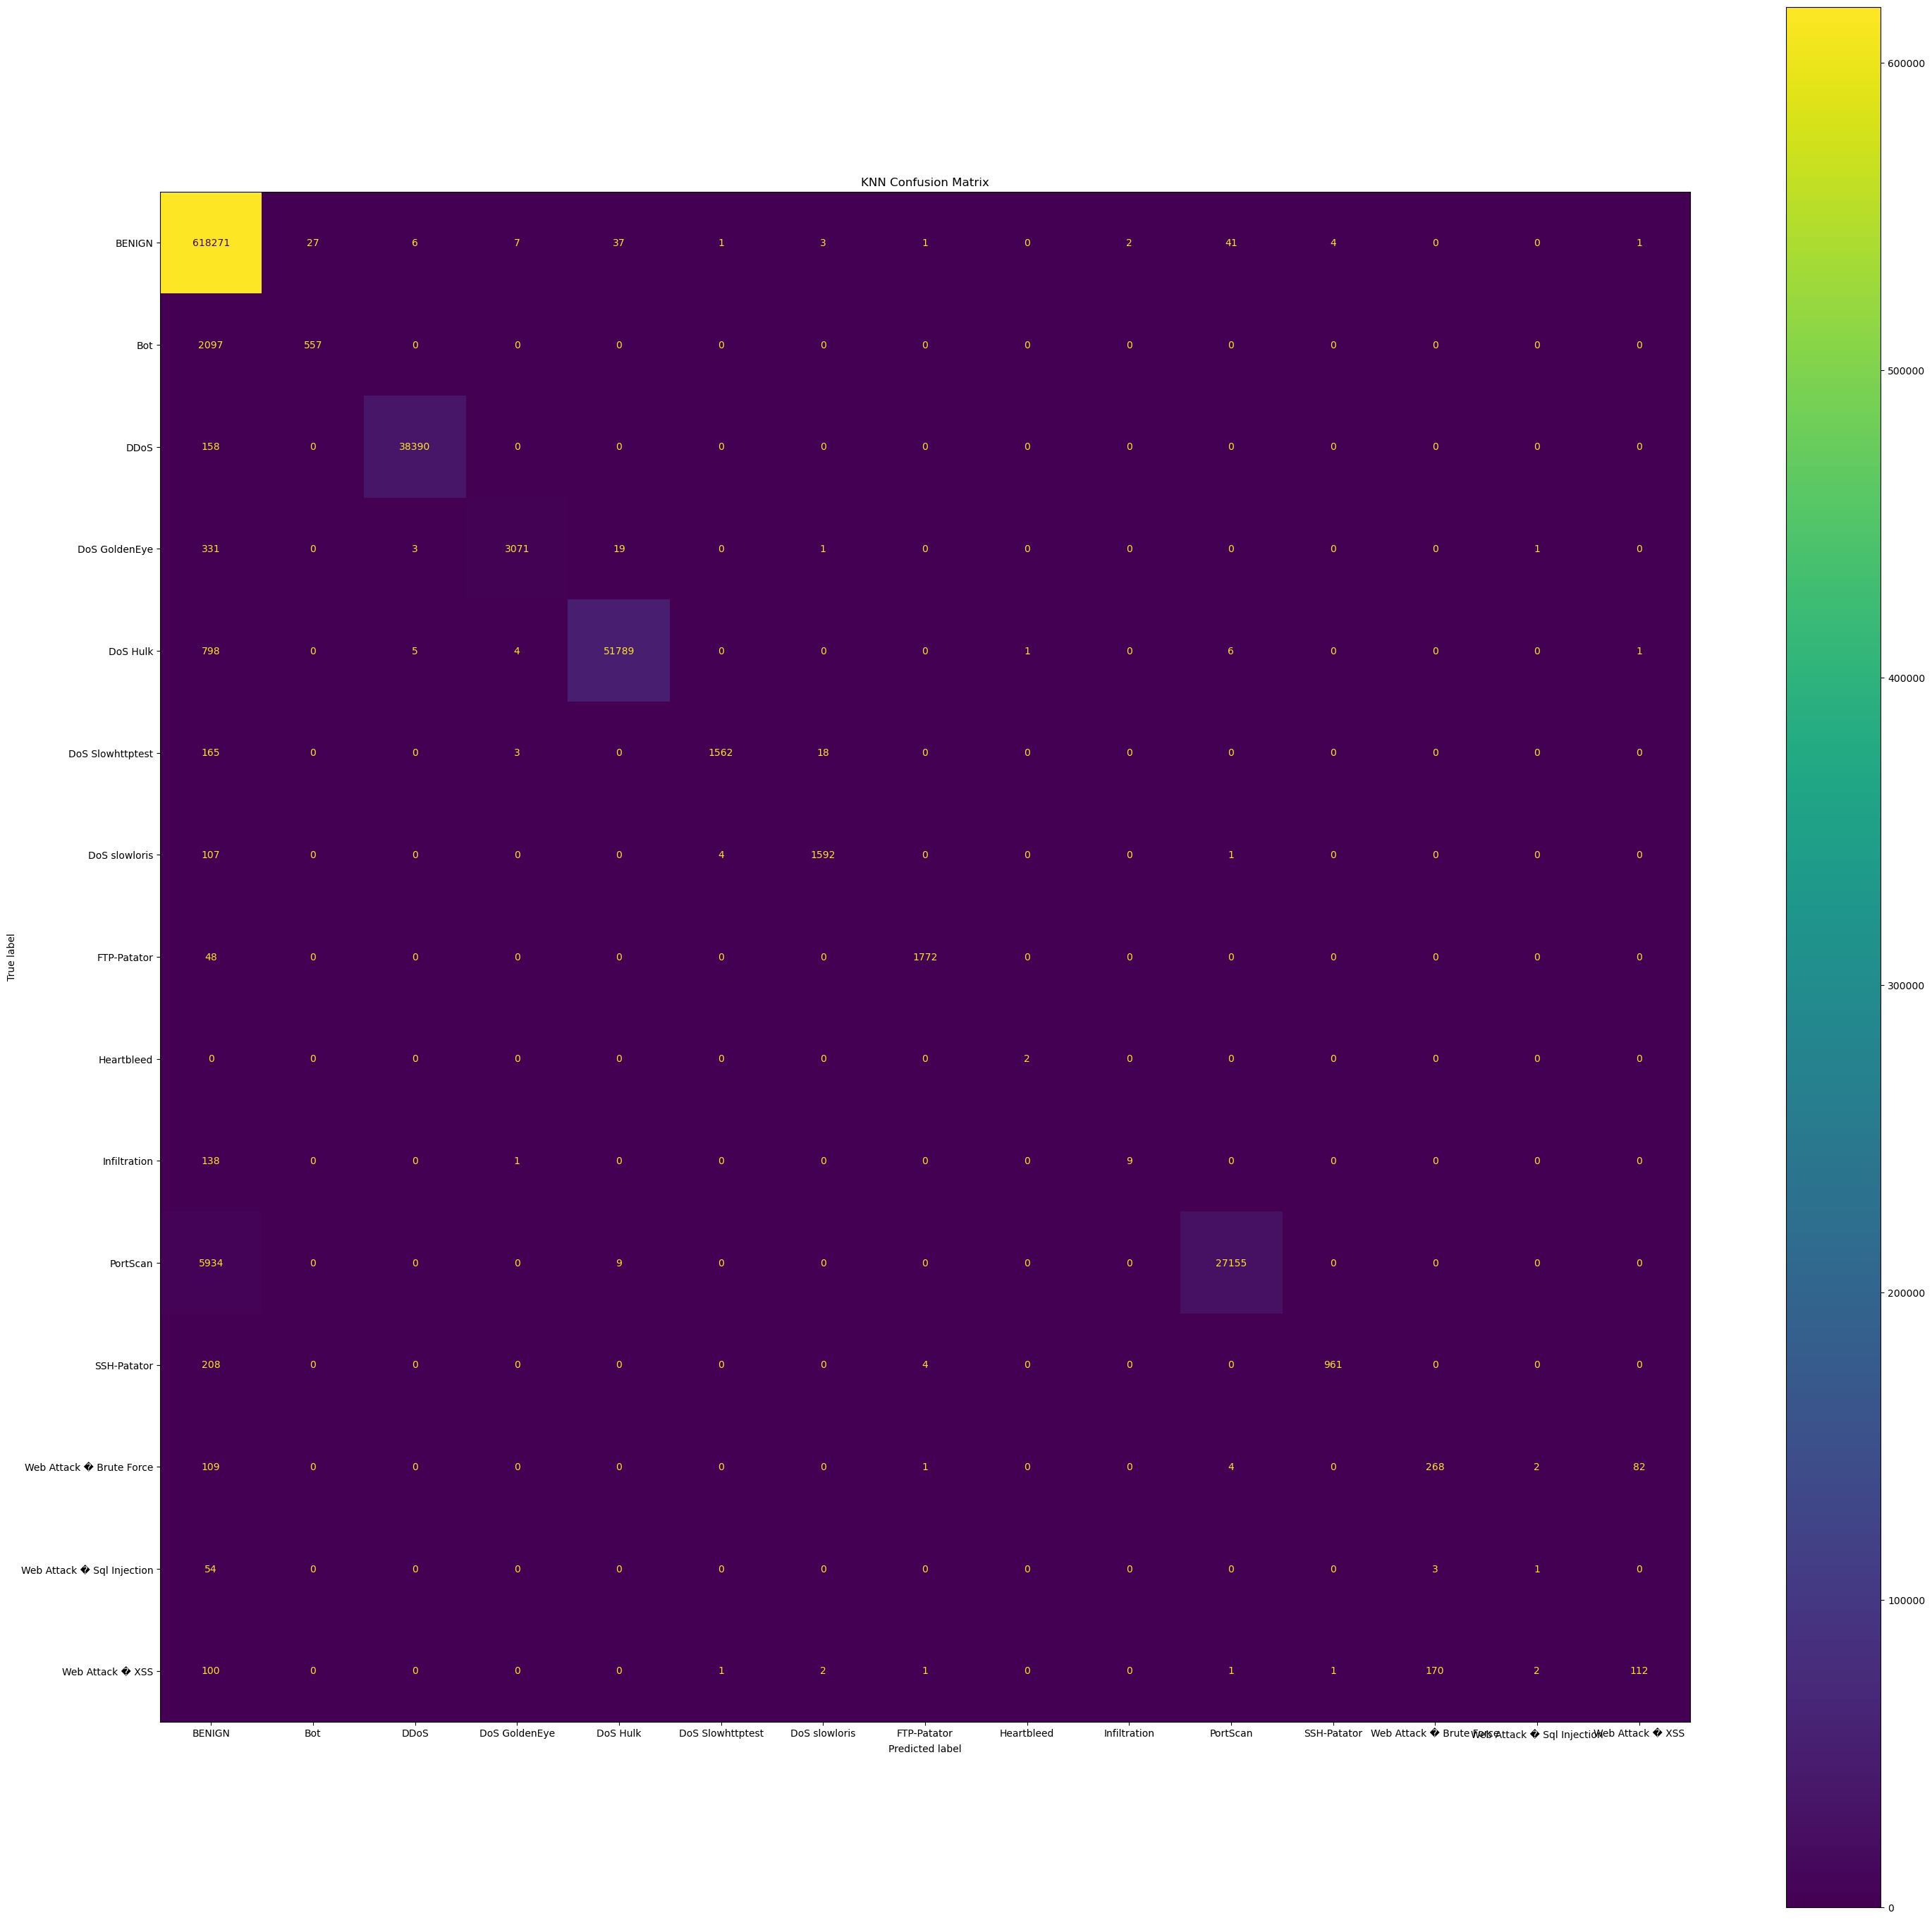

In [ ]:
confusionMatrix(predictedKNNSmote, y_test, KNNSmote.classes_, "KNN Confusion Matrix")

In [ ]:
getSummary(predictedKNNSmote, y_test, "KNN")

KNN: 
Accuracy: 0.9858140272929229 
Recall: 0.6978659914149509 
Precision: 0.8487934459423812 
F1 Score: 0.7247257635167065


In [ ]:
print(classification_report(predictedKNNSmote, y_test, labels= KNNSmote.classes_))

                            precision    recall  f1-score   support

                    BENIGN       0.98      1.00      0.99    618401
                       Bot       0.95      0.21      0.34      2654
                      DDoS       1.00      1.00      1.00     38548
             DoS GoldenEye       1.00      0.90      0.94      3426
                  DoS Hulk       1.00      0.98      0.99     52604
          DoS Slowhttptest       1.00      0.89      0.94      1748
             DoS slowloris       0.99      0.93      0.96      1704
               FTP-Patator       1.00      0.97      0.98      1820
                Heartbleed       0.67      1.00      0.80         2
              Infiltration       0.82      0.06      0.11       148
                  PortScan       1.00      0.82      0.90     33098
               SSH-Patator       0.99      0.82      0.90      1173
  Web Attack � Brute Force       0.61      0.58      0.59       466
Web Attack � Sql Injection       0.17      0.02

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 1188.42 seconds 
Execution time: 19.81 minutes


# Logistic Regression After SMOTE

In [ ]:
st = time.time()
logisticRegrSmote = LogisticRegression( max_iter= 3000, multi_class="multinomial", n_jobs= -1)
logisticRegrSmote.fit(X_train_resampled, y_train_resampled)
predictedLogSmote = logisticRegrSmote.predict(X_test)
print(accuracy_score(predictedLogSmote, y_test))
et = time.time()


0.796302761028245


{'Class': 0, 'TP': 475538, 'FN': 191.0, 'FP': 152980.0, 'TN': 127531.0}
{'Class': 1, 'TP': 579, 'FN': 44358.0, 'FP': 5.0, 'TN': 711298.0}
{'Class': 2, 'TP': 38350, 'FN': 7078.0, 'FP': 54.0, 'TN': 710758.0}
{'Class': 3, 'TP': 2928, 'FN': 5981.0, 'FP': 158.0, 'TN': 747173.0}
{'Class': 4, 'TP': 51625, 'FN': 11170.0, 'FP': 229.0, 'TN': 693216.0}
{'Class': 5, 'TP': 1498, 'FN': 15583.0, 'FP': 70.0, 'TN': 739089.0}
{'Class': 6, 'TP': 1543, 'FN': 5200.0, 'FP': 73.0, 'TN': 749424.0}
{'Class': 7, 'TP': 1772, 'FN': 2165.0, 'FP': 7.0, 'TN': 752296.0}
{'Class': 8, 'TP': 3, 'FN': 21.0, 'FP': 0.0, 'TN': 756216.0}
{'Class': 9, 'TP': 11, 'FN': 13178.0, 'FP': 0.0, 'TN': 743051.0}
{'Class': 10, 'TP': 27096, 'FN': 12387.0, 'FP': 112.0, 'TN': 716645.0}
{'Class': 11, 'TP': 879, 'FN': 2945.0, 'FP': 87.0, 'TN': 752329.0}
{'Class': 12, 'TP': 216, 'FN': 5215.0, 'FP': 225.0, 'TN': 750584.0}
{'Class': 13, 'TP': 6, 'FN': 14679.0, 'FP': 0.0, 'TN': 741555.0}
{'Class': 14, 'TP': 152, 'FN': 13893.0, 'FP': 44.0, 'TN': 

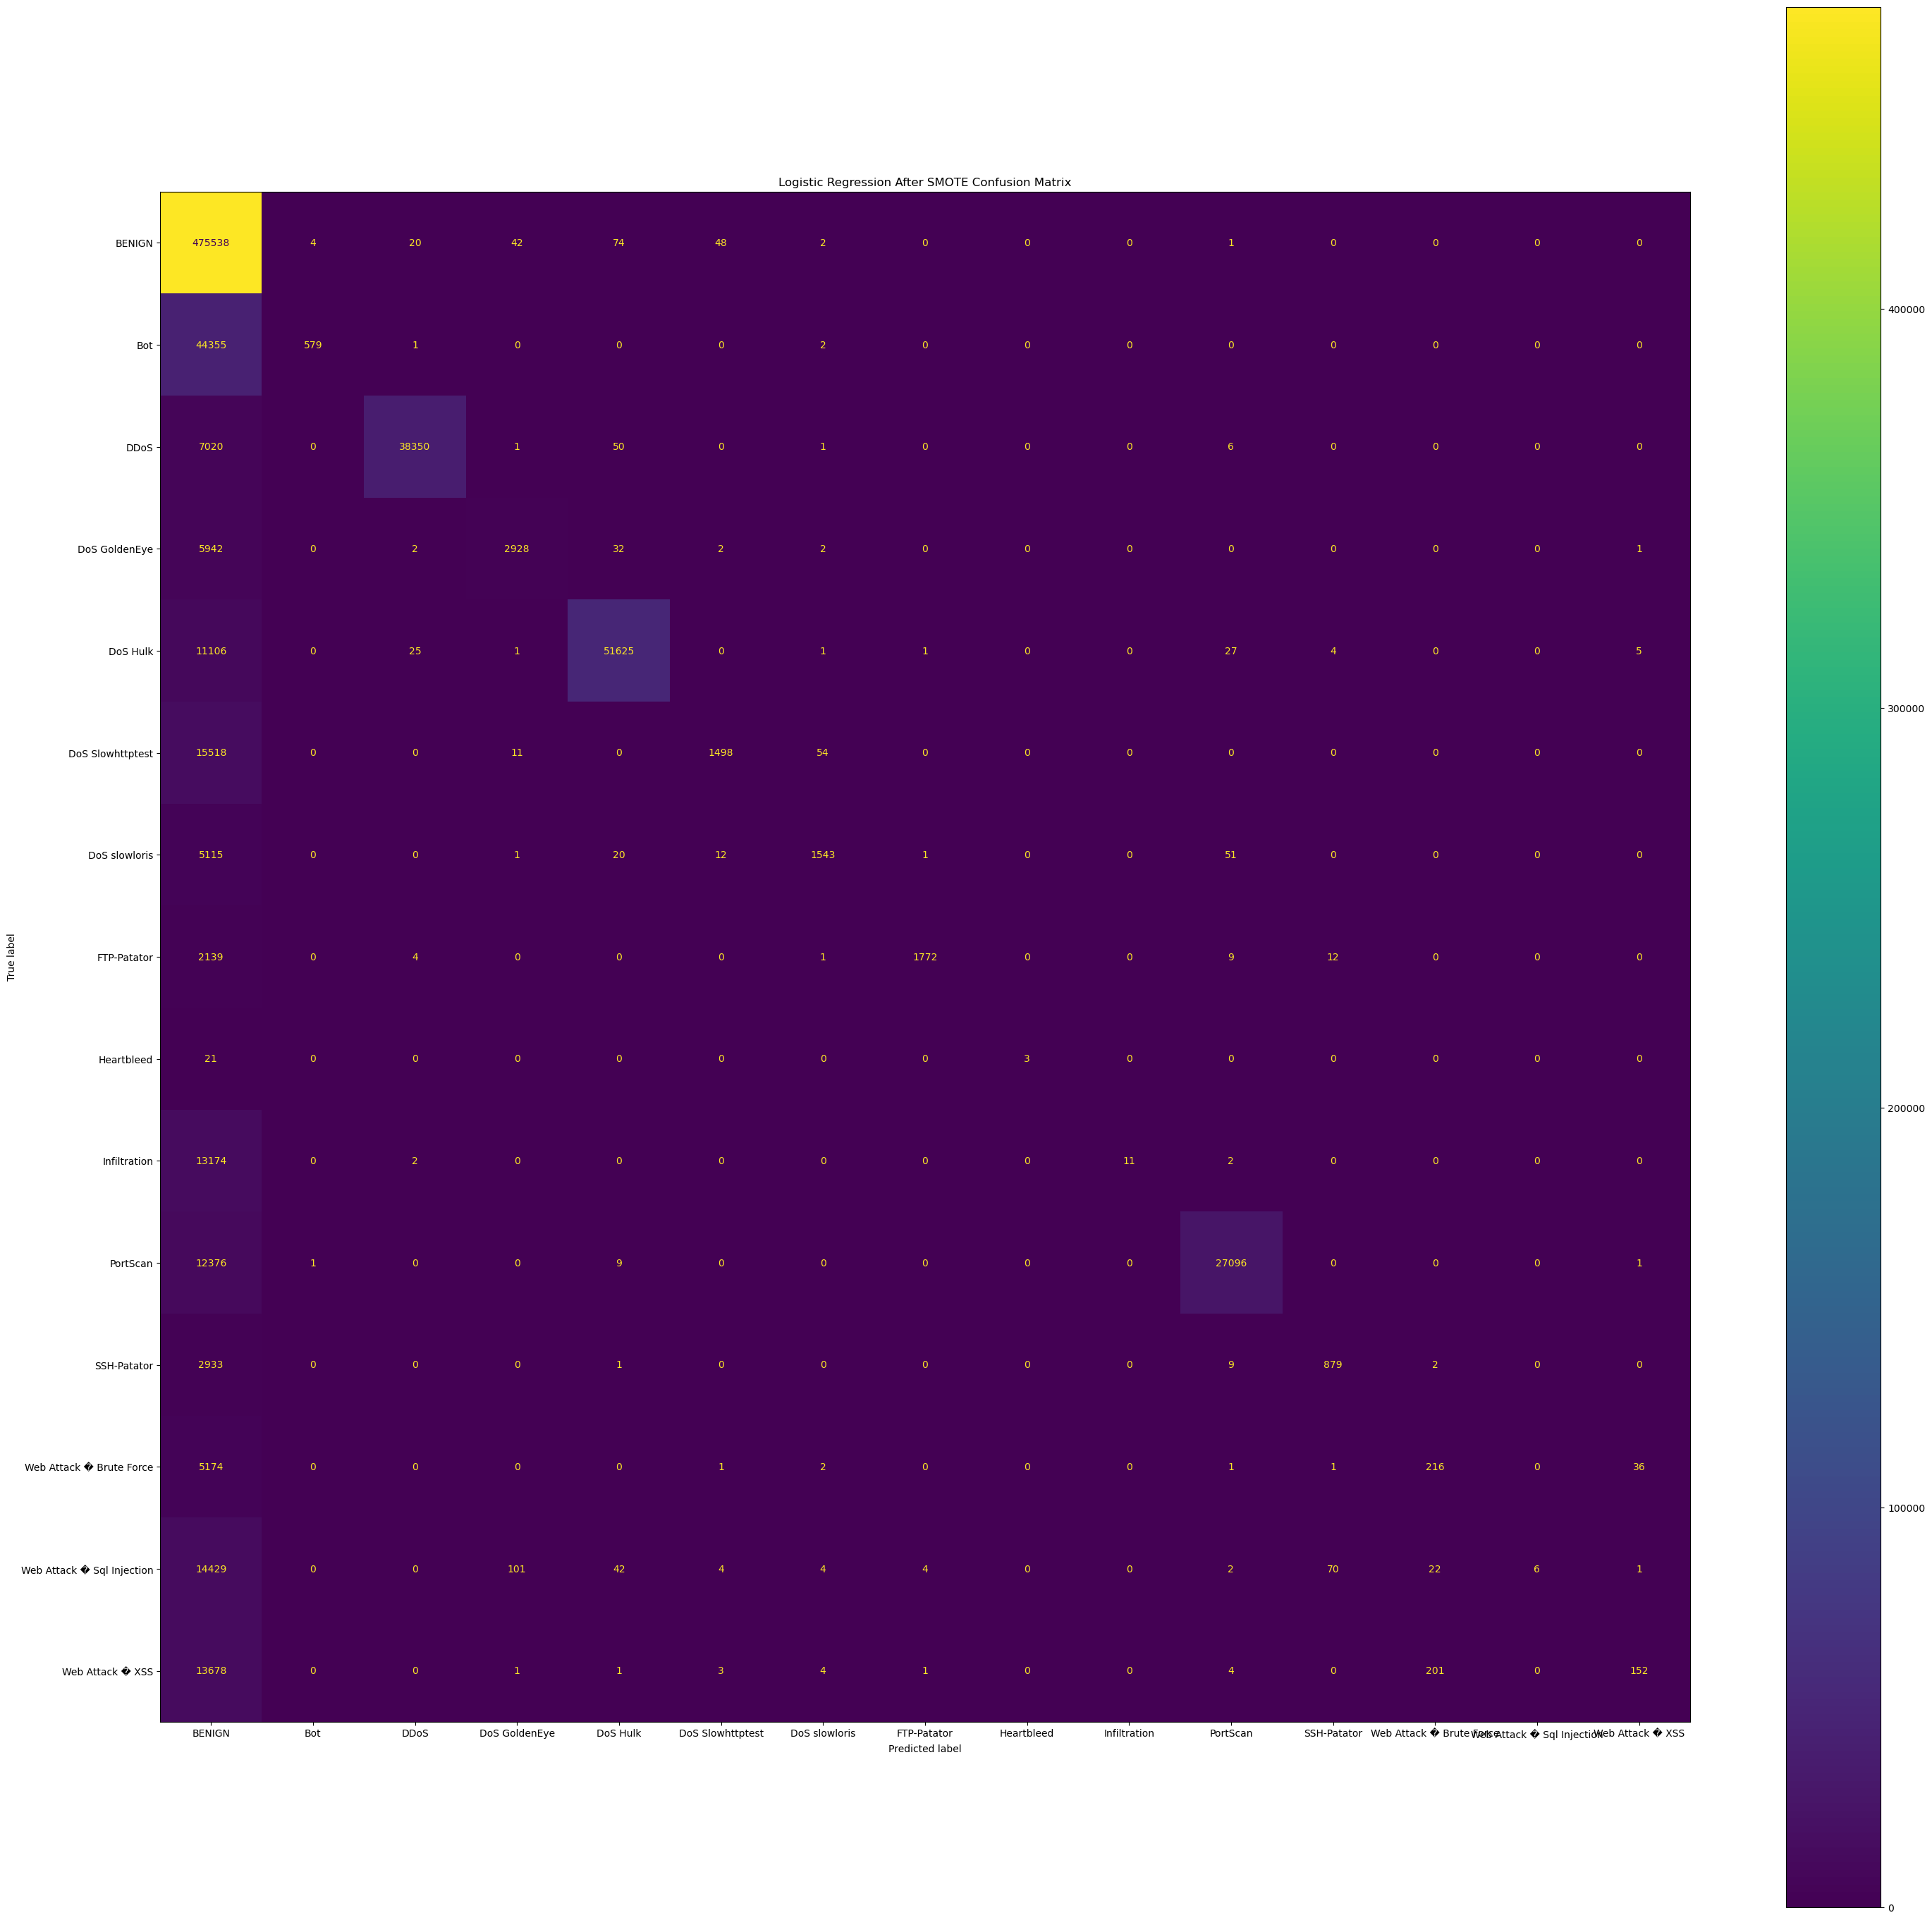

In [ ]:
confusionMatrix(predictedLogSmote, y_test, logisticRegrSmote.classes_, "Logistic Regression After SMOTE Confusion Matrix")

In [ ]:
getSummary(predictedLogSmote, y_test, "Logistic Regression After SMOTE")

Logistic Regression After SMOTE: 
Accuracy: 0.796302761028245 
Recall: 0.3244694346560972 
Precision: 0.9178930491610119 
F1 Score: 0.3893000194113193


In [ ]:
print(classification_report(predictedLogSmote, y_test, labels= logisticRegrSmote.classes_))

                            precision    recall  f1-score   support

                    BENIGN       0.76      1.00      0.86    475729
                       Bot       0.99      0.01      0.03     44937
                      DDoS       1.00      0.84      0.91     45428
             DoS GoldenEye       0.95      0.33      0.49      8909
                  DoS Hulk       1.00      0.82      0.90     62795
          DoS Slowhttptest       0.96      0.09      0.16     17081
             DoS slowloris       0.95      0.23      0.37      6743
               FTP-Patator       1.00      0.45      0.62      3937
                Heartbleed       1.00      0.12      0.22        24
              Infiltration       1.00      0.00      0.00     13189
                  PortScan       1.00      0.69      0.81     39483
               SSH-Patator       0.91      0.23      0.37      3824
  Web Attack � Brute Force       0.49      0.04      0.07      5431
Web Attack � Sql Injection       1.00      0.00

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 4458.05 seconds 
Execution time: 74.30 minutes


# **Bernoulli Naive Bayes After SMOTE**

In [ ]:
st = time.time()
BNBSmote = BernoulliNB()
BNBSmote.fit(X_train_resampled, y_train_resampled)
predictedBNBSmote = BNBSmote.predict(X_test)
print(accuracy_score(predictedBNBSmote, y_test))
et = time.time()

0.593100074050566


{'Class': 0, 'TP': 356539, 'FN': 3149.0, 'FP': 271979.0, 'TN': 124573.0}
{'Class': 1, 'TP': 323, 'FN': 55485.0, 'FP': 261.0, 'TN': 700171.0}
{'Class': 2, 'TP': 25506, 'FN': 44888.0, 'FP': 12898.0, 'TN': 672948.0}
{'Class': 3, 'TP': 1906, 'FN': 30822.0, 'FP': 1180.0, 'TN': 722332.0}
{'Class': 4, 'TP': 35990, 'FN': 8803.0, 'FP': 15864.0, 'TN': 695583.0}
{'Class': 5, 'TP': 922, 'FN': 38055.0, 'FP': 646.0, 'TN': 716617.0}
{'Class': 6, 'TP': 602, 'FN': 41173.0, 'FP': 1014.0, 'TN': 713451.0}
{'Class': 7, 'TP': 1230, 'FN': 3632.0, 'FP': 549.0, 'TN': 750829.0}
{'Class': 8, 'TP': 3, 'FN': 4.0, 'FP': 0.0, 'TN': 756233.0}
{'Class': 9, 'TP': 8, 'FN': 25704.0, 'FP': 3.0, 'TN': 730525.0}
{'Class': 10, 'TP': 24437, 'FN': 14442.0, 'FP': 2771.0, 'TN': 714590.0}
{'Class': 11, 'TP': 874, 'FN': 14264.0, 'FP': 92.0, 'TN': 741010.0}
{'Class': 12, 'TP': 2, 'FN': 12502.0, 'FP': 439.0, 'TN': 743297.0}
{'Class': 13, 'TP': 2, 'FN': 11880.0, 'FP': 4.0, 'TN': 744354.0}
{'Class': 14, 'TP': 182, 'FN': 2911.0, 'FP': 

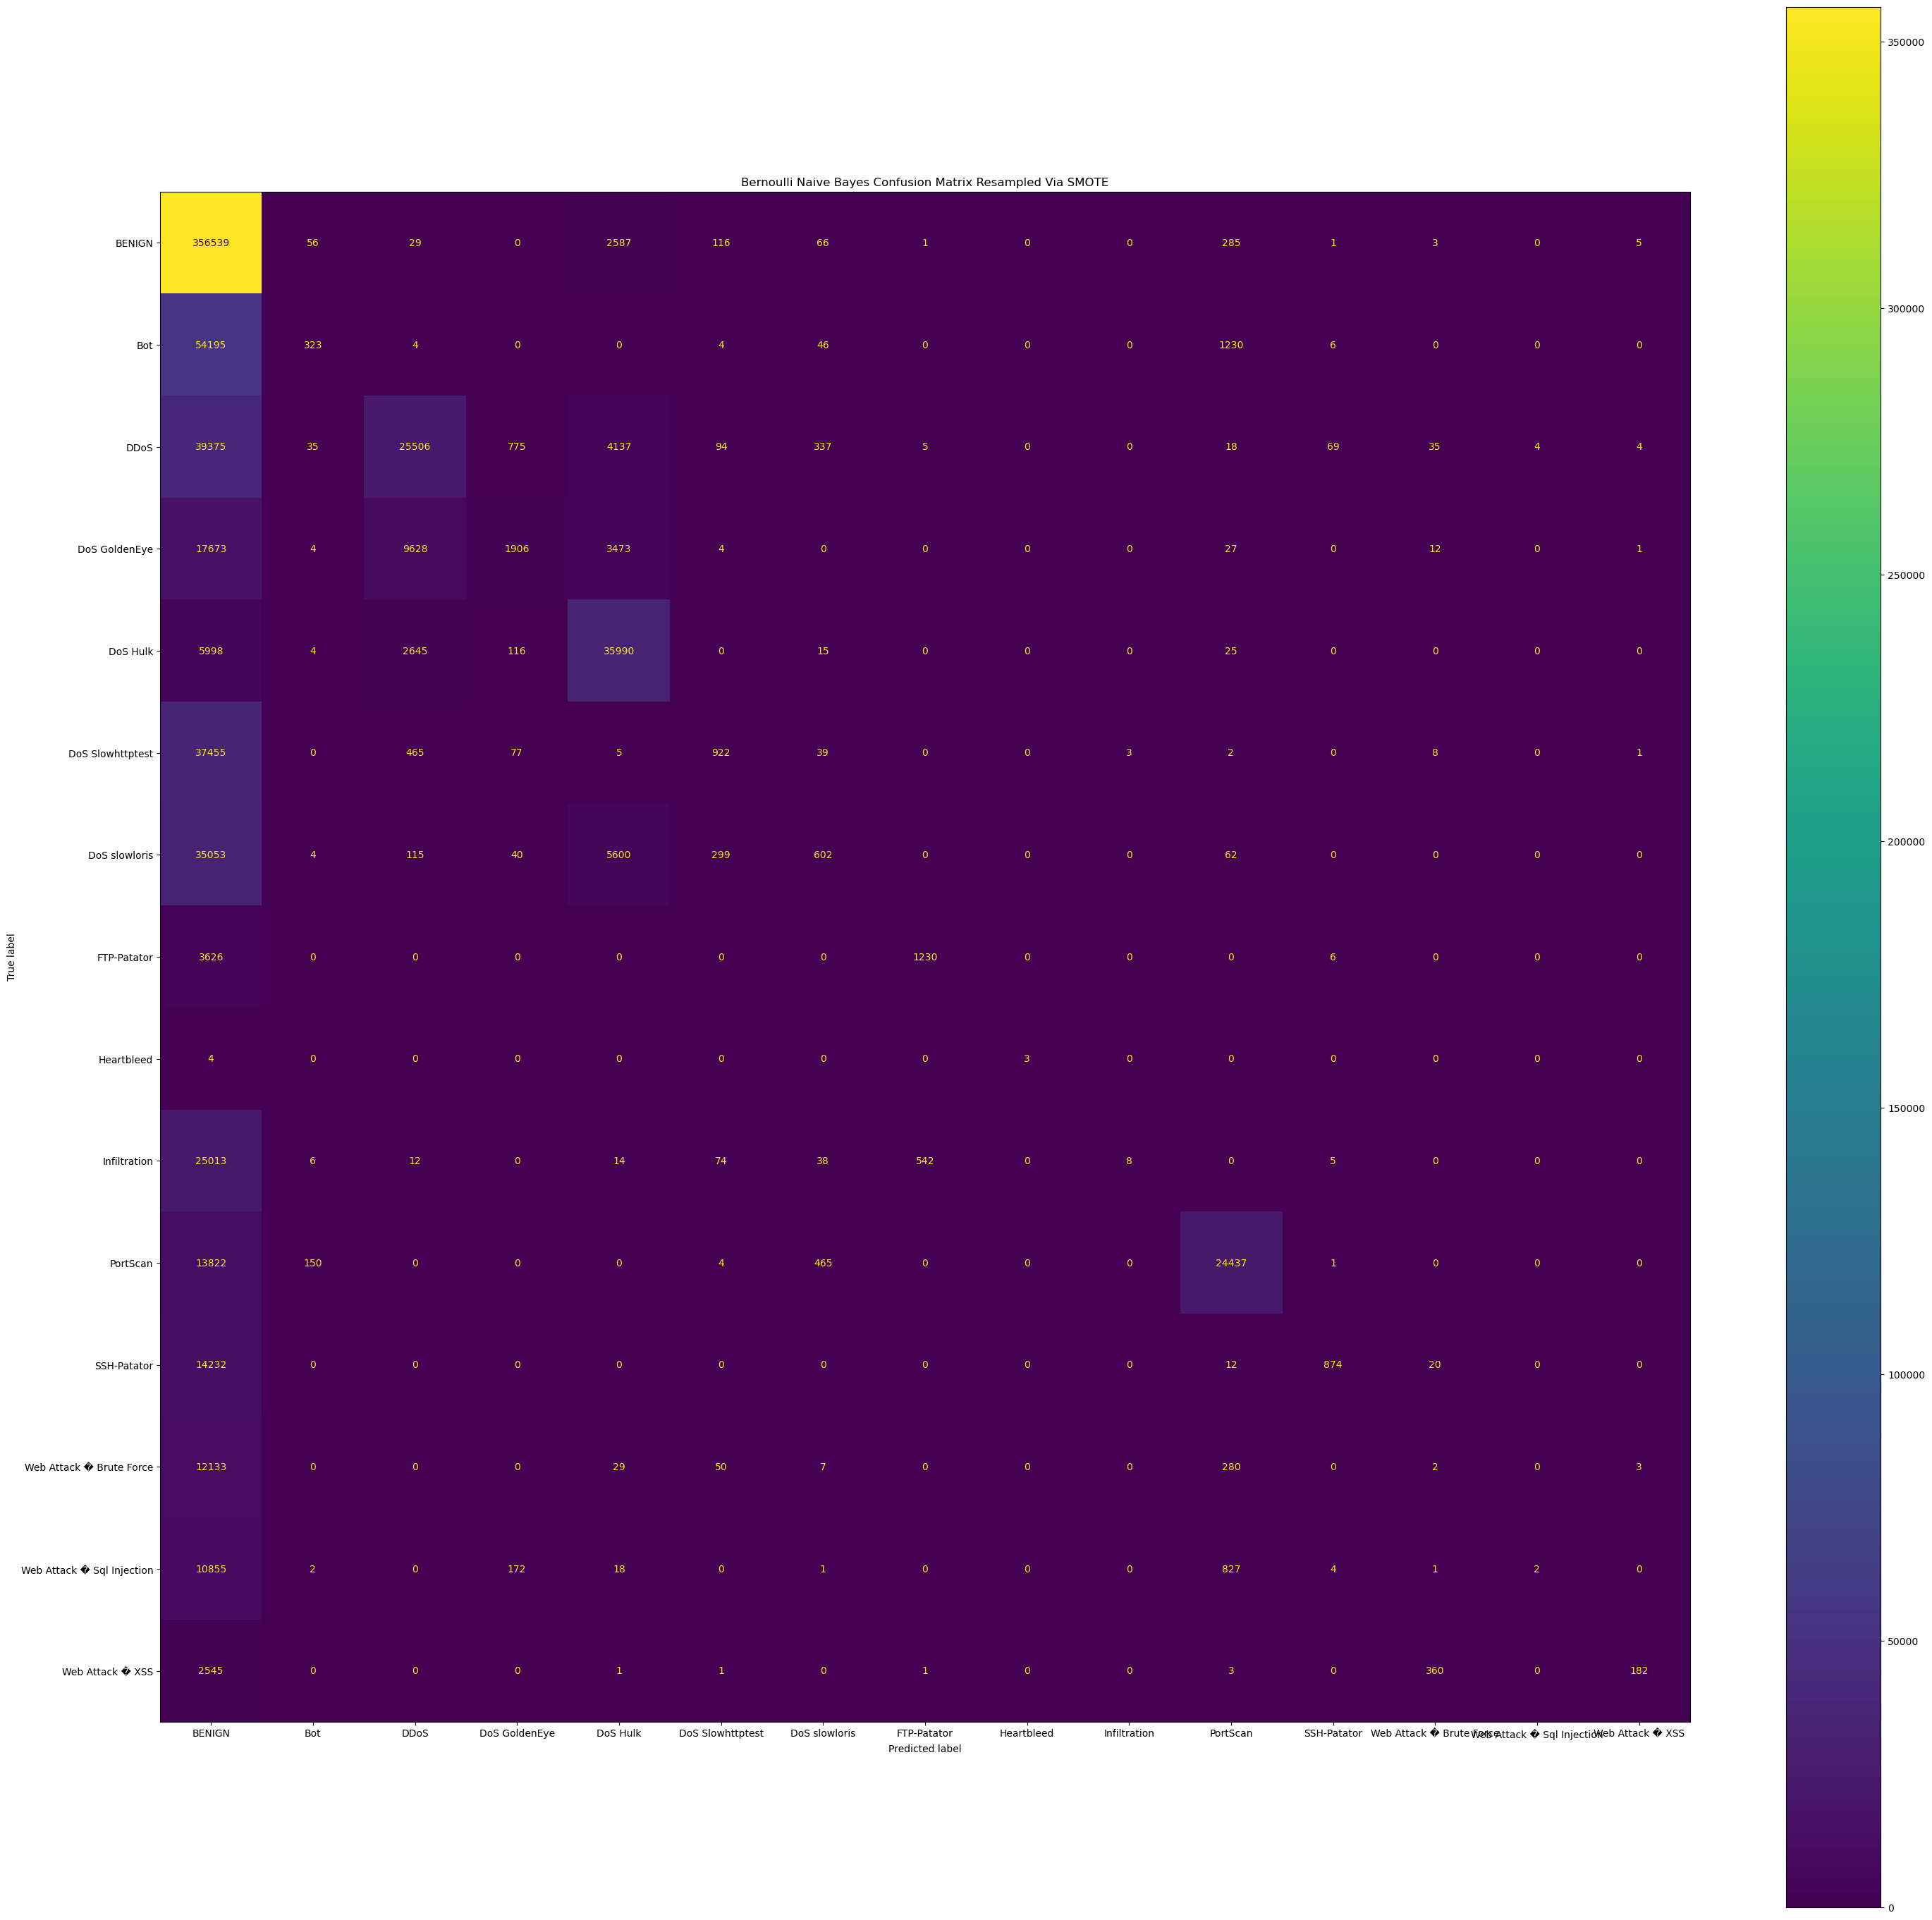

In [ ]:
confusionMatrix(predictedBNBSmote, y_test, BNBSmote.classes_, "Bernoulli Naive Bayes Confusion Matrix Resampled Via SMOTE")

In [ ]:
getSummary(predictedBNBSmote, y_test, "Bernoulli Naive Bayes Resampled Via SMOTE")

Bernoulli Naive Bayes Resampled Via SMOTE: 
Accuracy: 0.593100074050566 
Recall: 0.2457635196367323 
Precision: 0.6363171552869847 
F1 Score: 0.2704534822480188


In [ ]:
print(classification_report(predictedBNBSmote, y_test, labels= BNBSmote.classes_))

                            precision    recall  f1-score   support

                    BENIGN       0.57      0.99      0.72    359688
                       Bot       0.55      0.01      0.01     55808
                      DDoS       0.66      0.36      0.47     70394
             DoS GoldenEye       0.62      0.06      0.11     32728
                  DoS Hulk       0.69      0.80      0.74     44793
          DoS Slowhttptest       0.59      0.02      0.05     38977
             DoS slowloris       0.37      0.01      0.03     41775
               FTP-Patator       0.69      0.25      0.37      4862
                Heartbleed       1.00      0.43      0.60         7
              Infiltration       0.73      0.00      0.00     25712
                  PortScan       0.90      0.63      0.74     38879
               SSH-Patator       0.90      0.06      0.11     15138
  Web Attack � Brute Force       0.00      0.00      0.00     12504
Web Attack � Sql Injection       0.33      0.00

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 11.20 seconds 
Execution time: 0.19 minutes


# Random Forest After SMOTE

In [ ]:
st = time.time()
RFCSmote = RandomForestClassifier(n_jobs=-1)
RFCSmote.fit(X_train_resampled, y_train_resampled)
predictedRFCSmote = RFCSmote.predict(X_test)
print(accuracy_score(predictedRFCSmote, y_test))
et = time.time()

0.9961202792764202


{'Class': 0, 'TP': 626039, 'FN': 124.0, 'FP': 2479.0, 'TN': 127598.0}
{'Class': 1, 'TP': 555, 'FN': 1096.0, 'FP': 29.0, 'TN': 754560.0}
{'Class': 2, 'TP': 38394, 'FN': 105.0, 'FP': 10.0, 'TN': 717731.0}
{'Class': 3, 'TP': 3069, 'FN': 144.0, 'FP': 17.0, 'TN': 753010.0}
{'Class': 4, 'TP': 51810, 'FN': 419.0, 'FP': 44.0, 'TN': 703967.0}
{'Class': 5, 'TP': 1561, 'FN': 75.0, 'FP': 7.0, 'TN': 754597.0}
{'Class': 6, 'TP': 1599, 'FN': 27.0, 'FP': 17.0, 'TN': 754597.0}
{'Class': 7, 'TP': 1771, 'FN': 16.0, 'FP': 8.0, 'TN': 754445.0}
{'Class': 8, 'TP': 2, 'FN': 0.0, 'FP': 1.0, 'TN': 756237.0}
{'Class': 9, 'TP': 9, 'FN': 40.0, 'FP': 2.0, 'TN': 756189.0}
{'Class': 10, 'TP': 27158, 'FN': 438.0, 'FP': 50.0, 'TN': 728594.0}
{'Class': 11, 'TP': 962, 'FN': 115.0, 'FP': 4.0, 'TN': 755159.0}
{'Class': 12, 'TP': 267, 'FN': 127.0, 'FP': 174.0, 'TN': 755672.0}
{'Class': 13, 'TP': 1, 'FN': 11.0, 'FP': 5.0, 'TN': 756223.0}
{'Class': 14, 'TP': 109, 'FN': 197.0, 'FP': 87.0, 'TN': 755847.0}
<class 'numpy.ndarray'

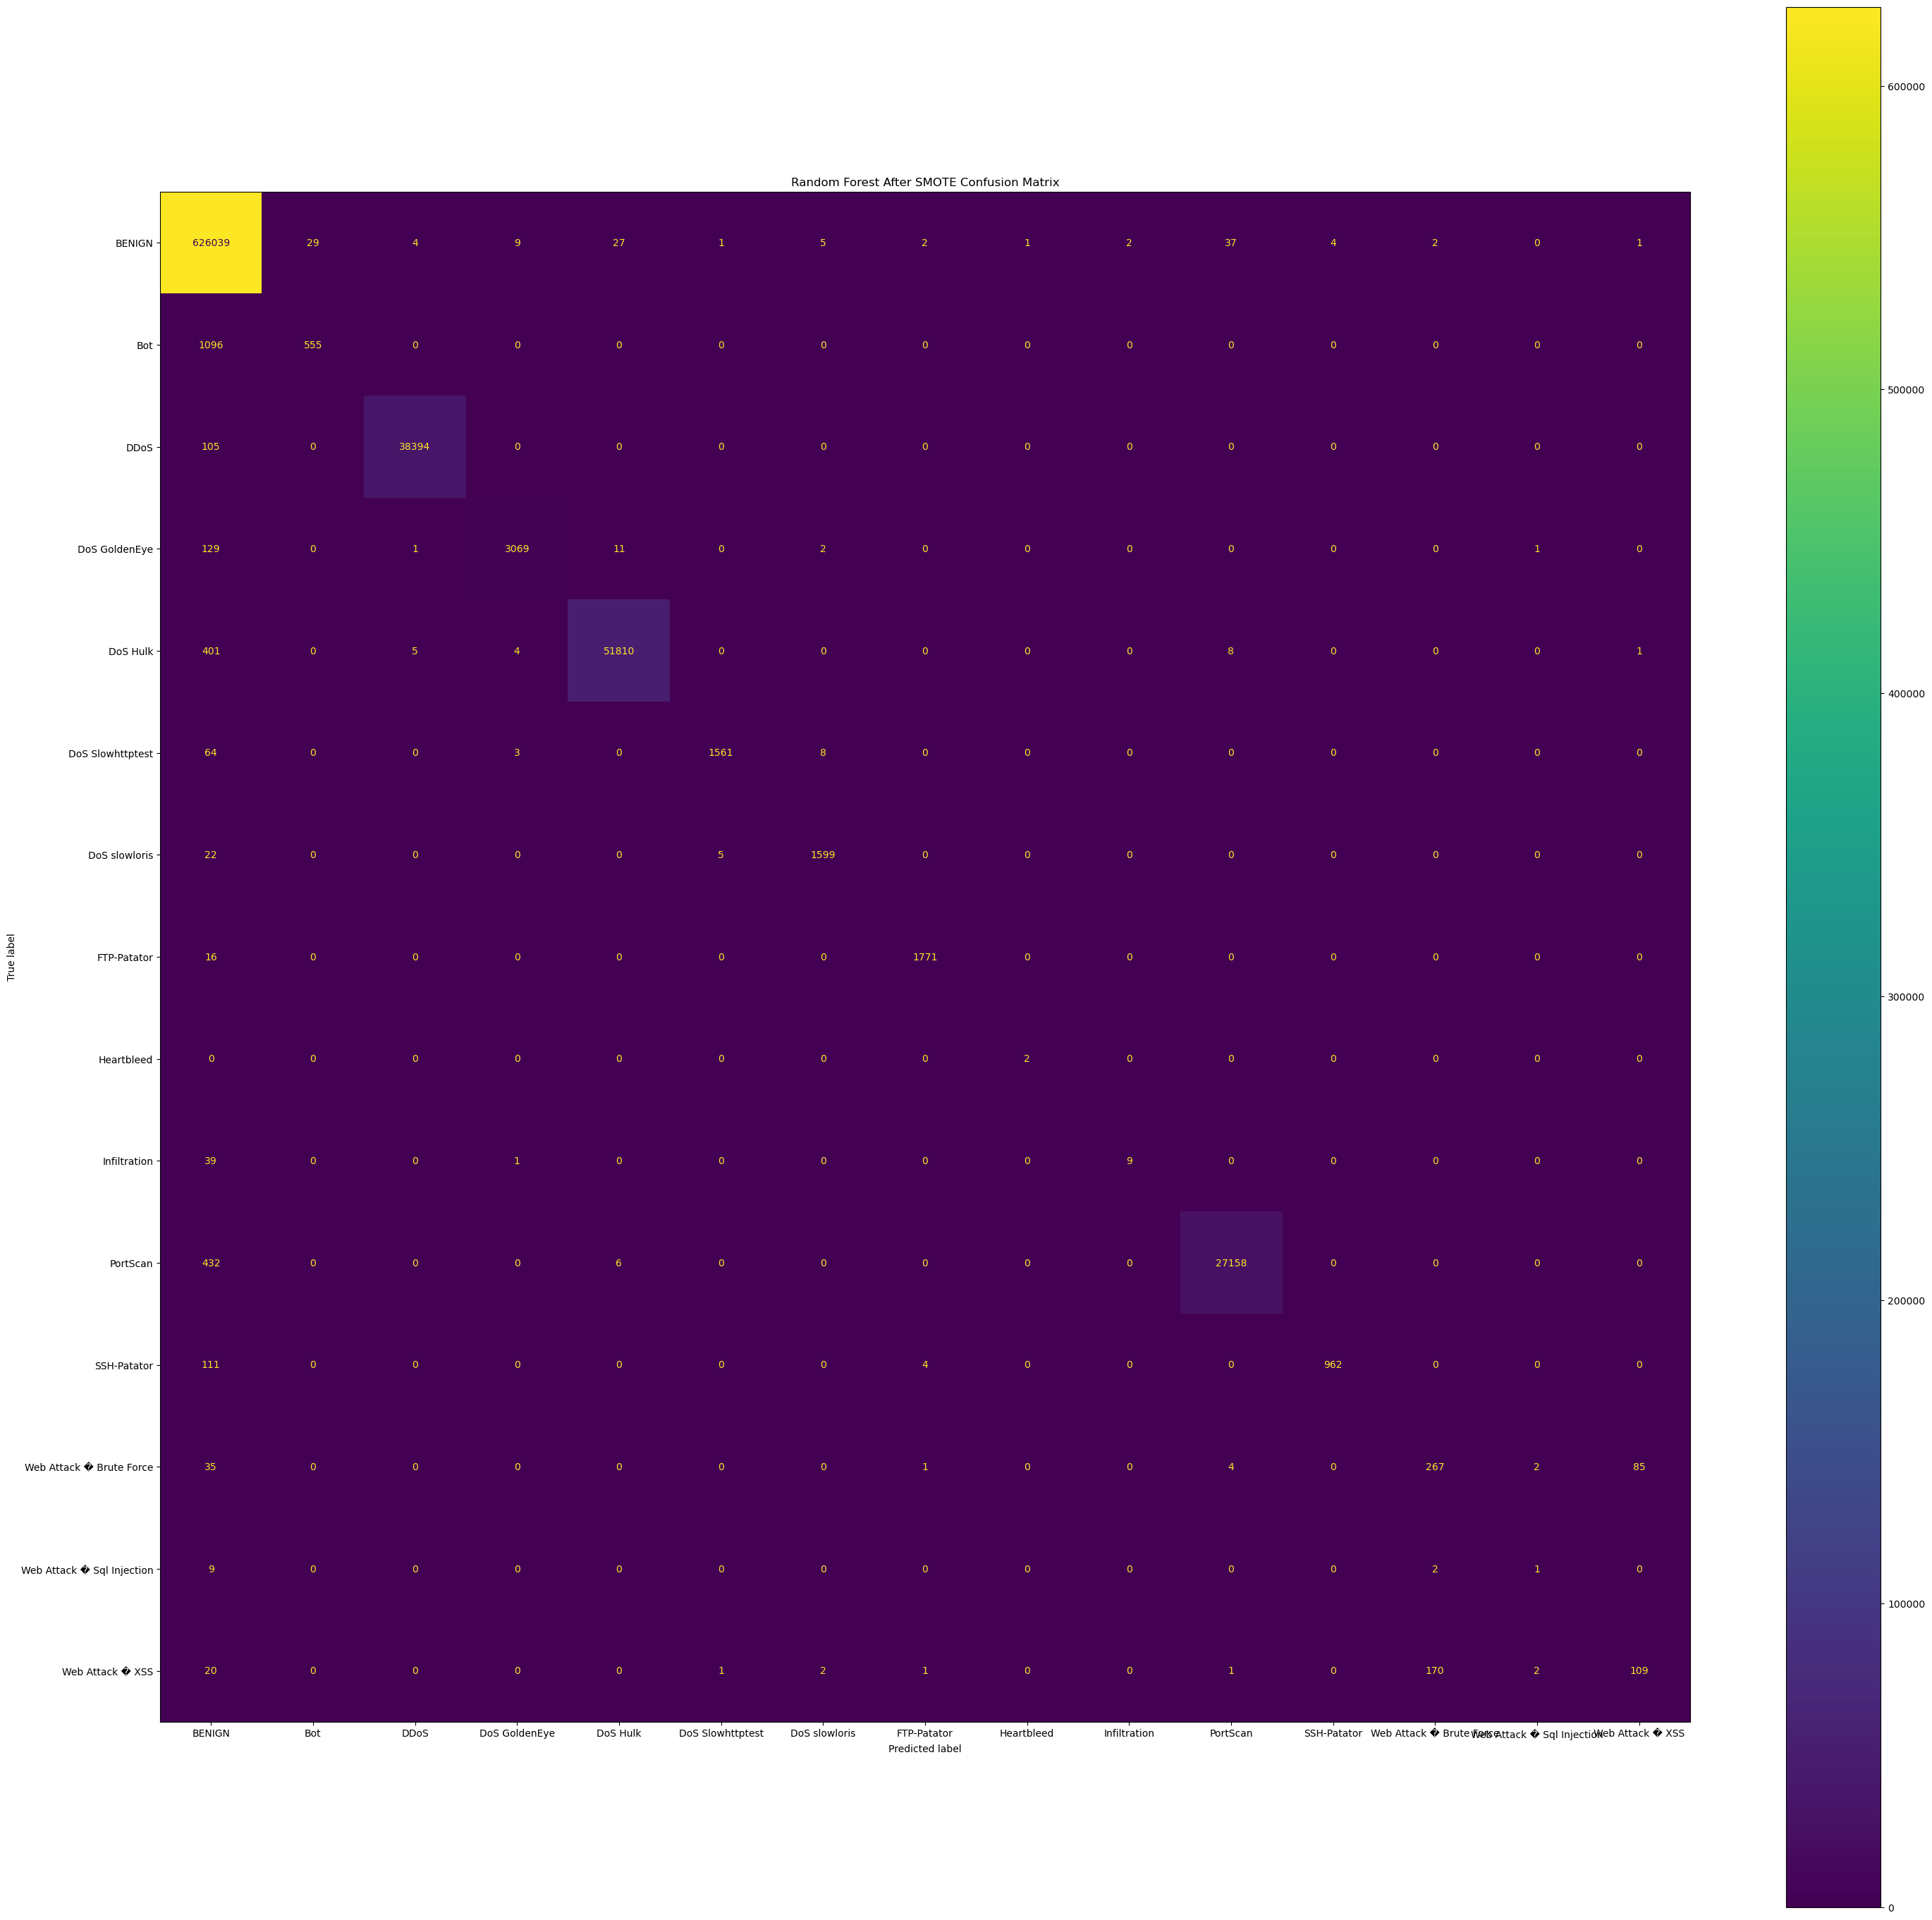

In [ ]:
confusionMatrix(predictedRFCSmote, y_test, RFCSmote.classes_, "Random Forest After SMOTE Confusion Matrix")

In [ ]:
getSummary(predictedRFCSmote, y_test, "Random Forest After SMOTE")

Random Forest After SMOTE: 
Accuracy: 0.9961202792764202 
Recall: 0.7591481981611455 
Precision: 0.8484933927735312 
F1 Score: 0.775660937566245


In [ ]:
print(classification_report(predictedRFCSmote, y_test, labels= RFCSmote.classes_))

                            precision    recall  f1-score   support

                    BENIGN       1.00      1.00      1.00    626163
                       Bot       0.95      0.34      0.50      1651
                      DDoS       1.00      1.00      1.00     38499
             DoS GoldenEye       0.99      0.96      0.97      3213
                  DoS Hulk       1.00      0.99      1.00     52229
          DoS Slowhttptest       1.00      0.95      0.97      1636
             DoS slowloris       0.99      0.98      0.99      1626
               FTP-Patator       1.00      0.99      0.99      1787
                Heartbleed       0.67      1.00      0.80         2
              Infiltration       0.82      0.18      0.30        49
                  PortScan       1.00      0.98      0.99     27596
               SSH-Patator       1.00      0.89      0.94      1077
  Web Attack � Brute Force       0.61      0.68      0.64       394
Web Attack � Sql Injection       0.17      0.08

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 338.81 seconds 
Execution time: 5.65 minutes


# Support Vector Machine After SMOTE

In [ ]:
st = time.time()
SVMSmote = LinearSVC()
SVMSmote.fit(X_train_resampled, y_train_resampled)
predictedSVMSmote = SVMSmote.predict(X_test)
print(accuracy_score(predictedSVMSmote, y_test))
et = time.time()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.765459377975246


{'Class': 0, 'TP': 455602, 'FN': 208.0, 'FP': 172916.0, 'TN': 127514.0}
{'Class': 1, 'TP': 579, 'FN': 53522.0, 'FP': 5.0, 'TN': 702134.0}
{'Class': 2, 'TP': 38366, 'FN': 18504.0, 'FP': 38.0, 'TN': 699332.0}
{'Class': 3, 'TP': 2933, 'FN': 5486.0, 'FP': 153.0, 'TN': 747668.0}
{'Class': 4, 'TP': 48582, 'FN': 14890.0, 'FP': 3272.0, 'TN': 689496.0}
{'Class': 5, 'TP': 1367, 'FN': 6255.0, 'FP': 201.0, 'TN': 748417.0}
{'Class': 6, 'TP': 1485, 'FN': 13001.0, 'FP': 131.0, 'TN': 741623.0}
{'Class': 7, 'TP': 1772, 'FN': 844.0, 'FP': 7.0, 'TN': 753617.0}
{'Class': 8, 'TP': 3, 'FN': 273.0, 'FP': 0.0, 'TN': 755964.0}
{'Class': 9, 'TP': 9, 'FN': 19620.0, 'FP': 2.0, 'TN': 736609.0}
{'Class': 10, 'TP': 27062, 'FN': 10822.0, 'FP': 146.0, 'TN': 718210.0}
{'Class': 11, 'TP': 880, 'FN': 2505.0, 'FP': 86.0, 'TN': 752769.0}
{'Class': 12, 'TP': 37, 'FN': 6500.0, 'FP': 404.0, 'TN': 749299.0}
{'Class': 13, 'TP': 6, 'FN': 11265.0, 'FP': 0.0, 'TN': 744969.0}
{'Class': 14, 'TP': 188, 'FN': 13674.0, 'FP': 8.0, 'TN':

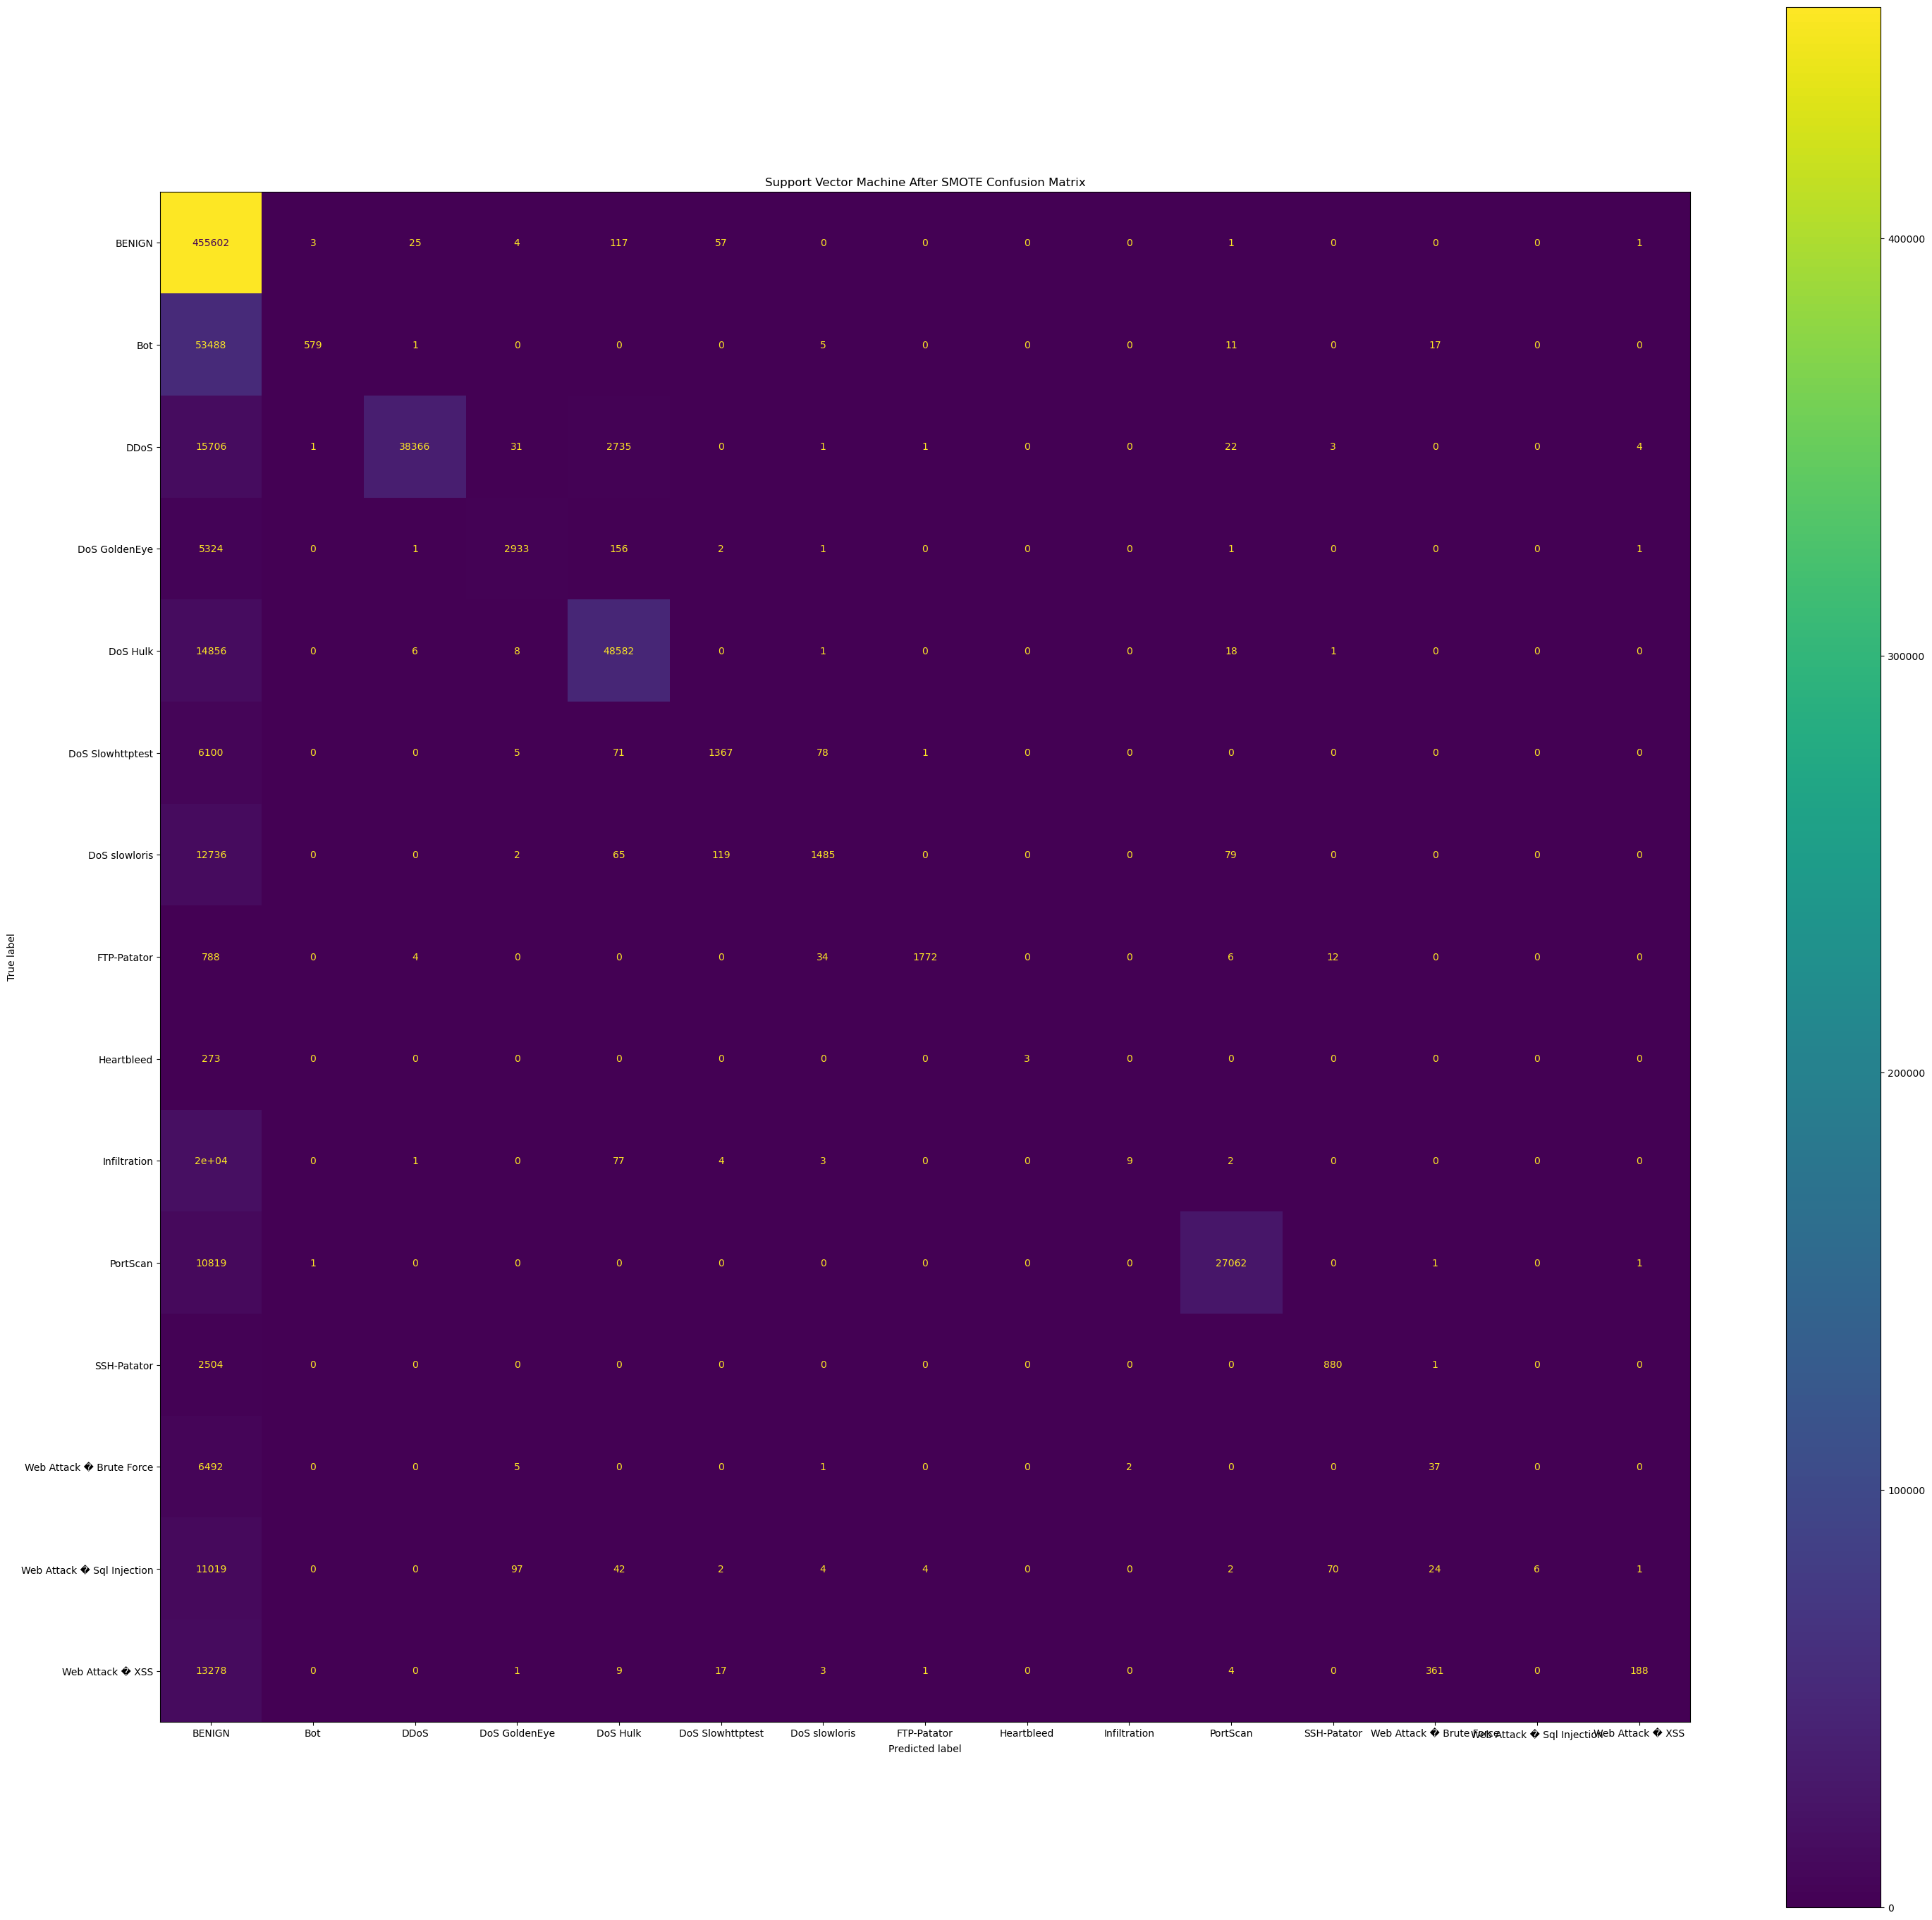

In [ ]:
confusionMatrix(predictedSVMSmote, y_test, SVMSmote.classes_, "Support Vector Machine After SMOTE Confusion Matrix")

In [ ]:
getSummary(predictedSVMSmote, y_test, "Support Vector Machine After SMOTE")

Support Vector Machine After SMOTE: 
Accuracy: 0.765459377975246 
Recall: 0.31755220171776805 
Precision: 0.8770891784406355 
F1 Score: 0.3736292272455212


In [ ]:
print(classification_report(predictedSVMSmote, y_test, labels= SVMSmote.classes_))

                            precision    recall  f1-score   support

                    BENIGN       0.72      1.00      0.84    455810
                       Bot       0.99      0.01      0.02     54101
                      DDoS       1.00      0.67      0.81     56870
             DoS GoldenEye       0.95      0.35      0.51      8419
                  DoS Hulk       0.94      0.77      0.84     63472
          DoS Slowhttptest       0.87      0.18      0.30      7622
             DoS slowloris       0.92      0.10      0.18     14486
               FTP-Patator       1.00      0.68      0.81      2616
                Heartbleed       1.00      0.01      0.02       276
              Infiltration       0.82      0.00      0.00     19629
                  PortScan       0.99      0.71      0.83     37884
               SSH-Patator       0.91      0.26      0.40      3385
  Web Attack � Brute Force       0.08      0.01      0.01      6537
Web Attack � Sql Injection       1.00      0.00

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 5506.42 seconds 
Execution time: 91.77 minutes


# XGBoost After SMOTE

In [ ]:
st = time.time()
XGBSmote = xgb.XGBClassifier(objective ="mult:softprob", random_state=666, tree_method='gpu_hist'  )
XGBSmote.fit(X_train_resampled, y_trainleSmote)
predictedXGBSmote = XGBSmote.predict(X_test)
print(accuracy_score(predictedXGBSmote, y_testle))
et = time.time()

0.9932402411932719


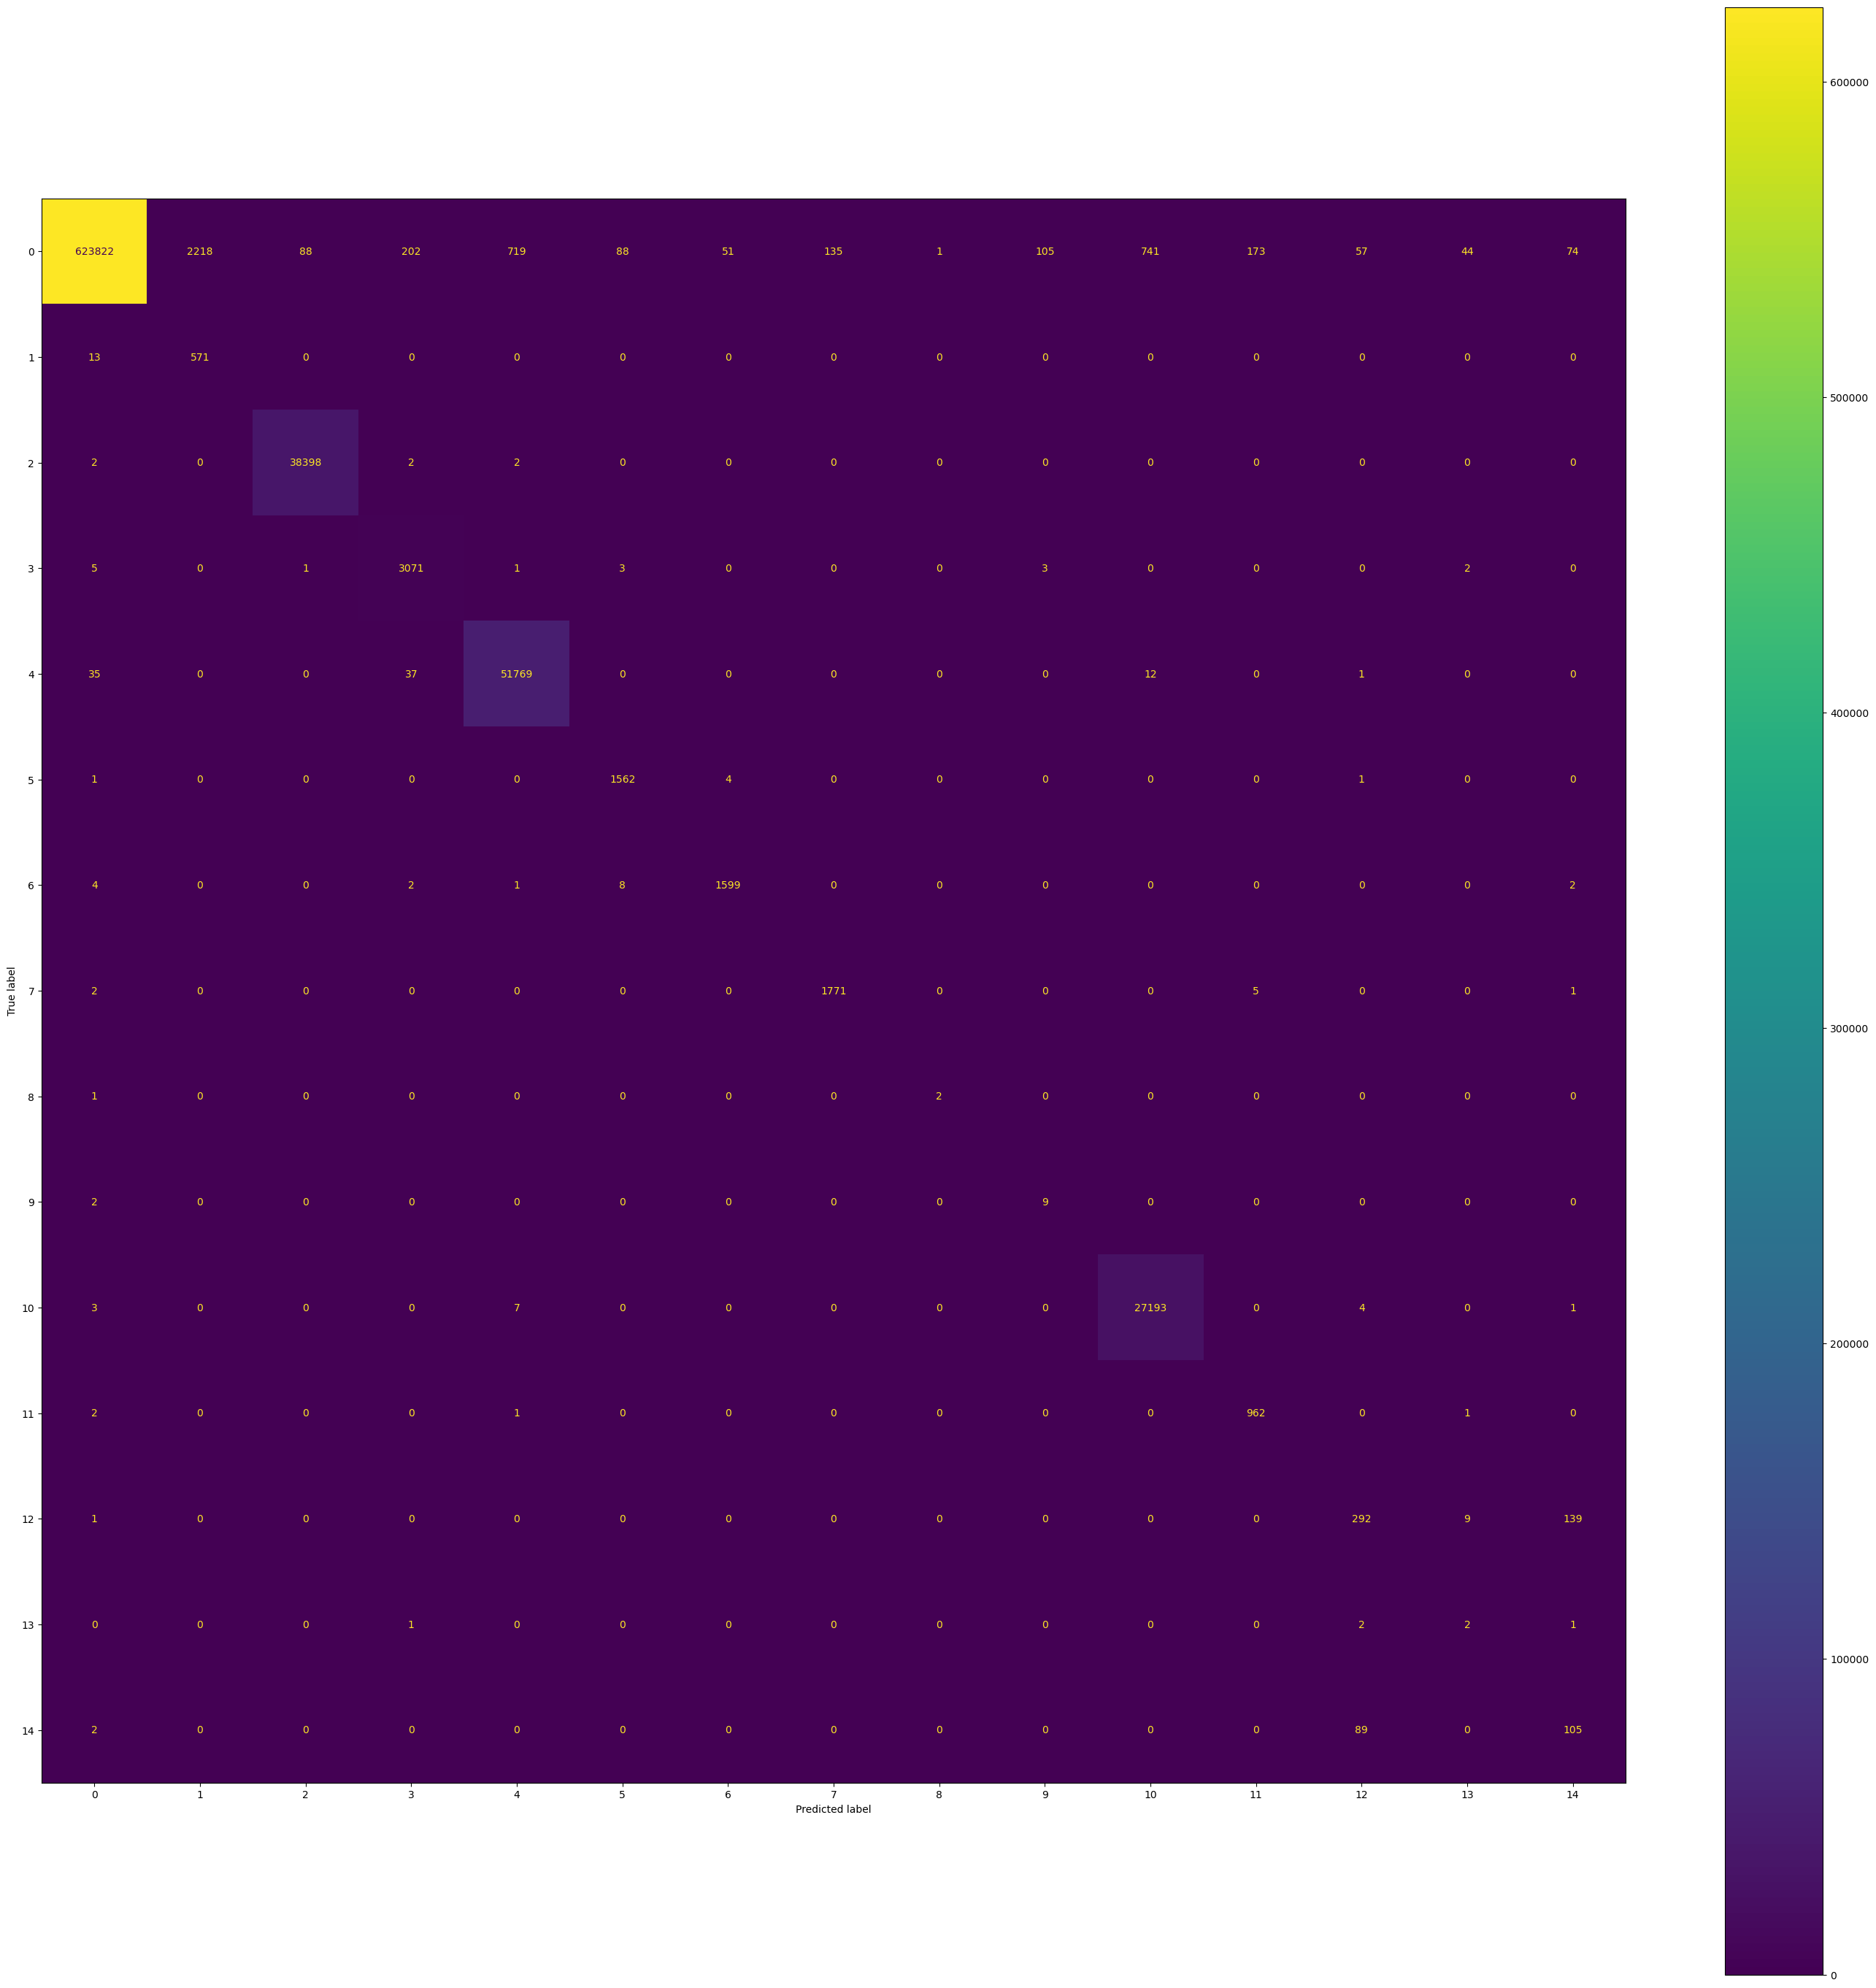

{'Class': 0, 'TP': 623822, 'FN': 4696.0, 'FP': 73.0, 'TN': 127649.0}
{'Class': 1, 'TP': 571, 'FN': 13.0, 'FP': 2218.0, 'TN': 753438.0}
{'Class': 2, 'TP': 38398, 'FN': 6.0, 'FP': 89.0, 'TN': 717747.0}
{'Class': 3, 'TP': 3071, 'FN': 15.0, 'FP': 244.0, 'TN': 752910.0}
{'Class': 4, 'TP': 51769, 'FN': 85.0, 'FP': 731.0, 'TN': 703655.0}
{'Class': 5, 'TP': 1562, 'FN': 6.0, 'FP': 99.0, 'TN': 754573.0}
{'Class': 6, 'TP': 1599, 'FN': 17.0, 'FP': 55.0, 'TN': 754569.0}
{'Class': 7, 'TP': 1771, 'FN': 8.0, 'FP': 135.0, 'TN': 754326.0}
{'Class': 8, 'TP': 2, 'FN': 1.0, 'FP': 1.0, 'TN': 756236.0}
{'Class': 9, 'TP': 9, 'FN': 2.0, 'FP': 108.0, 'TN': 756121.0}
{'Class': 10, 'TP': 27193, 'FN': 15.0, 'FP': 753.0, 'TN': 728279.0}
{'Class': 11, 'TP': 962, 'FN': 4.0, 'FP': 178.0, 'TN': 755096.0}
{'Class': 12, 'TP': 292, 'FN': 149.0, 'FP': 154.0, 'TN': 755645.0}
{'Class': 13, 'TP': 2, 'FN': 4.0, 'FP': 56.0, 'TN': 756178.0}
{'Class': 14, 'TP': 105, 'FN': 91.0, 'FP': 218.0, 'TN': 755826.0}


In [ ]:
#confusionMatrix(predictedXGBSmote, y_testle, XGBSmote.classes_, "XGBoost After SMOTE Confusion Matrix")
cm = confusion_matrix(y_testle, predictedXGBSmote)
CmDisp = ConfusionMatrixDisplay(confusion_matrix= cm)
fig, ax = plt.subplots(figsize = (35,35))
CmDisp.plot(ax=ax)
plt.show()
counts_from_confusion(cm)

In [ ]:
getSummary(predictedXGBSmote, y_testle, "XGBoost After SMOTE")

XGBoost After SMOTE: 
Accuracy: 0.9932402411932719 
Recall: 0.701724245664145 
Precision: 0.8637402904193475 
F1 Score: 0.7349582794025518


In [ ]:
print(classification_report(predictedXGBSmote, y_testle, labels= XGBSmote.classes_))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    623895
           1       0.98      0.20      0.34      2789
           2       1.00      1.00      1.00     38487
           3       1.00      0.93      0.96      3315
           4       1.00      0.99      0.99     52500
           5       1.00      0.94      0.97      1661
           6       0.99      0.97      0.98      1654
           7       1.00      0.93      0.96      1906
           8       0.67      0.67      0.67         3
           9       0.82      0.08      0.14       117
          10       1.00      0.97      0.99     27946
          11       1.00      0.84      0.91      1140
          12       0.66      0.65      0.66       446
          13       0.33      0.03      0.06        58
          14       0.54      0.33      0.40       323

    accuracy                           0.99    756240
   macro avg       0.86      0.70      0.73    756240
weighted avg       0.99   

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 21.28 seconds 
Execution time: 0.35 minutes


# ANN After SMOTE

In [ ]:

# Define the model architecture
def create_model(num_neurons=64, activation='relu', num_epochs = 10):
  model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_neurons, activation=activation, input_shape=(30,)),
        tf.keras.layers.Dense(num_neurons, activation=activation),
        tf.keras.layers.Dense(15, activation='softmax')
    ])
    # Compile the model
  model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

  return model

# Define the parameter grid
param_grid = {'num_neurons': [32, 64, 128],
              'activation': ['relu', 'tanh', 'swish'],
              'num_epochs': [5,10,20,30]}
# Add an early stopping function
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

st = time.time()
# Create a model
model = KerasClassifier(build_fn=create_model,  batch_size=32, verbose=1)

# Perform Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=1)
grid_result = grid.fit(X_train_resampled, y_trainleSmote)


# Use the best parameters to retrain the model
best_modelSmote = create_model(num_neurons=grid_result.best_params_['num_neurons'],
                          activation=grid_result.best_params_['activation'],
                          num_epochs=grid_result.best_params_['num_epochs'])

best_modelSmote.fit(X_train_resampled, y_trainleSmote, epochs=grid_result.best_params_['num_epochs'], validation_data=(X_test, y_testle), callbacks=[early_stopping], verbose=1)
et = time.time()


# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Train the model on your data
#model.fit(X_train_resampled, y_trainANN, epochs=10, batch_size=32, validation_data = (X_test, y_testANN), callbacks=[early_stopping], verbose = 1)


test_loss, test_accuracy = best_modelSmote.evaluate(X_test, y_testle, verbose=0)

predictedANNSmote = best_modelSmote.predict(X_test).argmax(axis=1)

print('Accuracy:', test_accuracy)


C:\Users\Jack\AppData\Local\Temp\ipykernel_12300\4126145800.py:24: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model,  batch_size=32, verbose=1)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
93750/93750 [==============================] - 151s 2ms/step - loss: 0.1521 - accuracy: 0.9254
Epoch 1/30
93750/93750 [==============================] - 186s 2ms/step - loss: 0.1525 - accuracy: 0.9256 - val_loss: 0.2605 - val_accuracy: 0.9335
Epoch 2/30
93750/93750 [==============================] - 182s 2ms/step - loss: 0.1256 - accuracy: 0.9351 - val_loss: 0.1807 - val_accuracy: 0.9495
Epoch 3/30
93750/93750 [==============================] - 183s 2ms/step - loss: 0.1212 - accuracy: 0.9373 - val_loss: 0.1660 - val_accuracy: 0.9549
Epoch 4/30
93750/93750 [==============================] - 182s 2ms/step - loss: 0.1192 - accuracy: 0.9390 - val_loss: 0.1825 - val_accuracy: 0.9532
Epoch 5/30
93750/93750 [==============================] - 183s 2ms/step - loss: 0.1173 - accuracy: 0.9402 - val_loss: 0.1591 - val_accuracy: 0.9582
Epoch 6/30
93750/93750 [==============================] - 183s 2ms/step - loss: 0.1162 - accuracy: 0.94

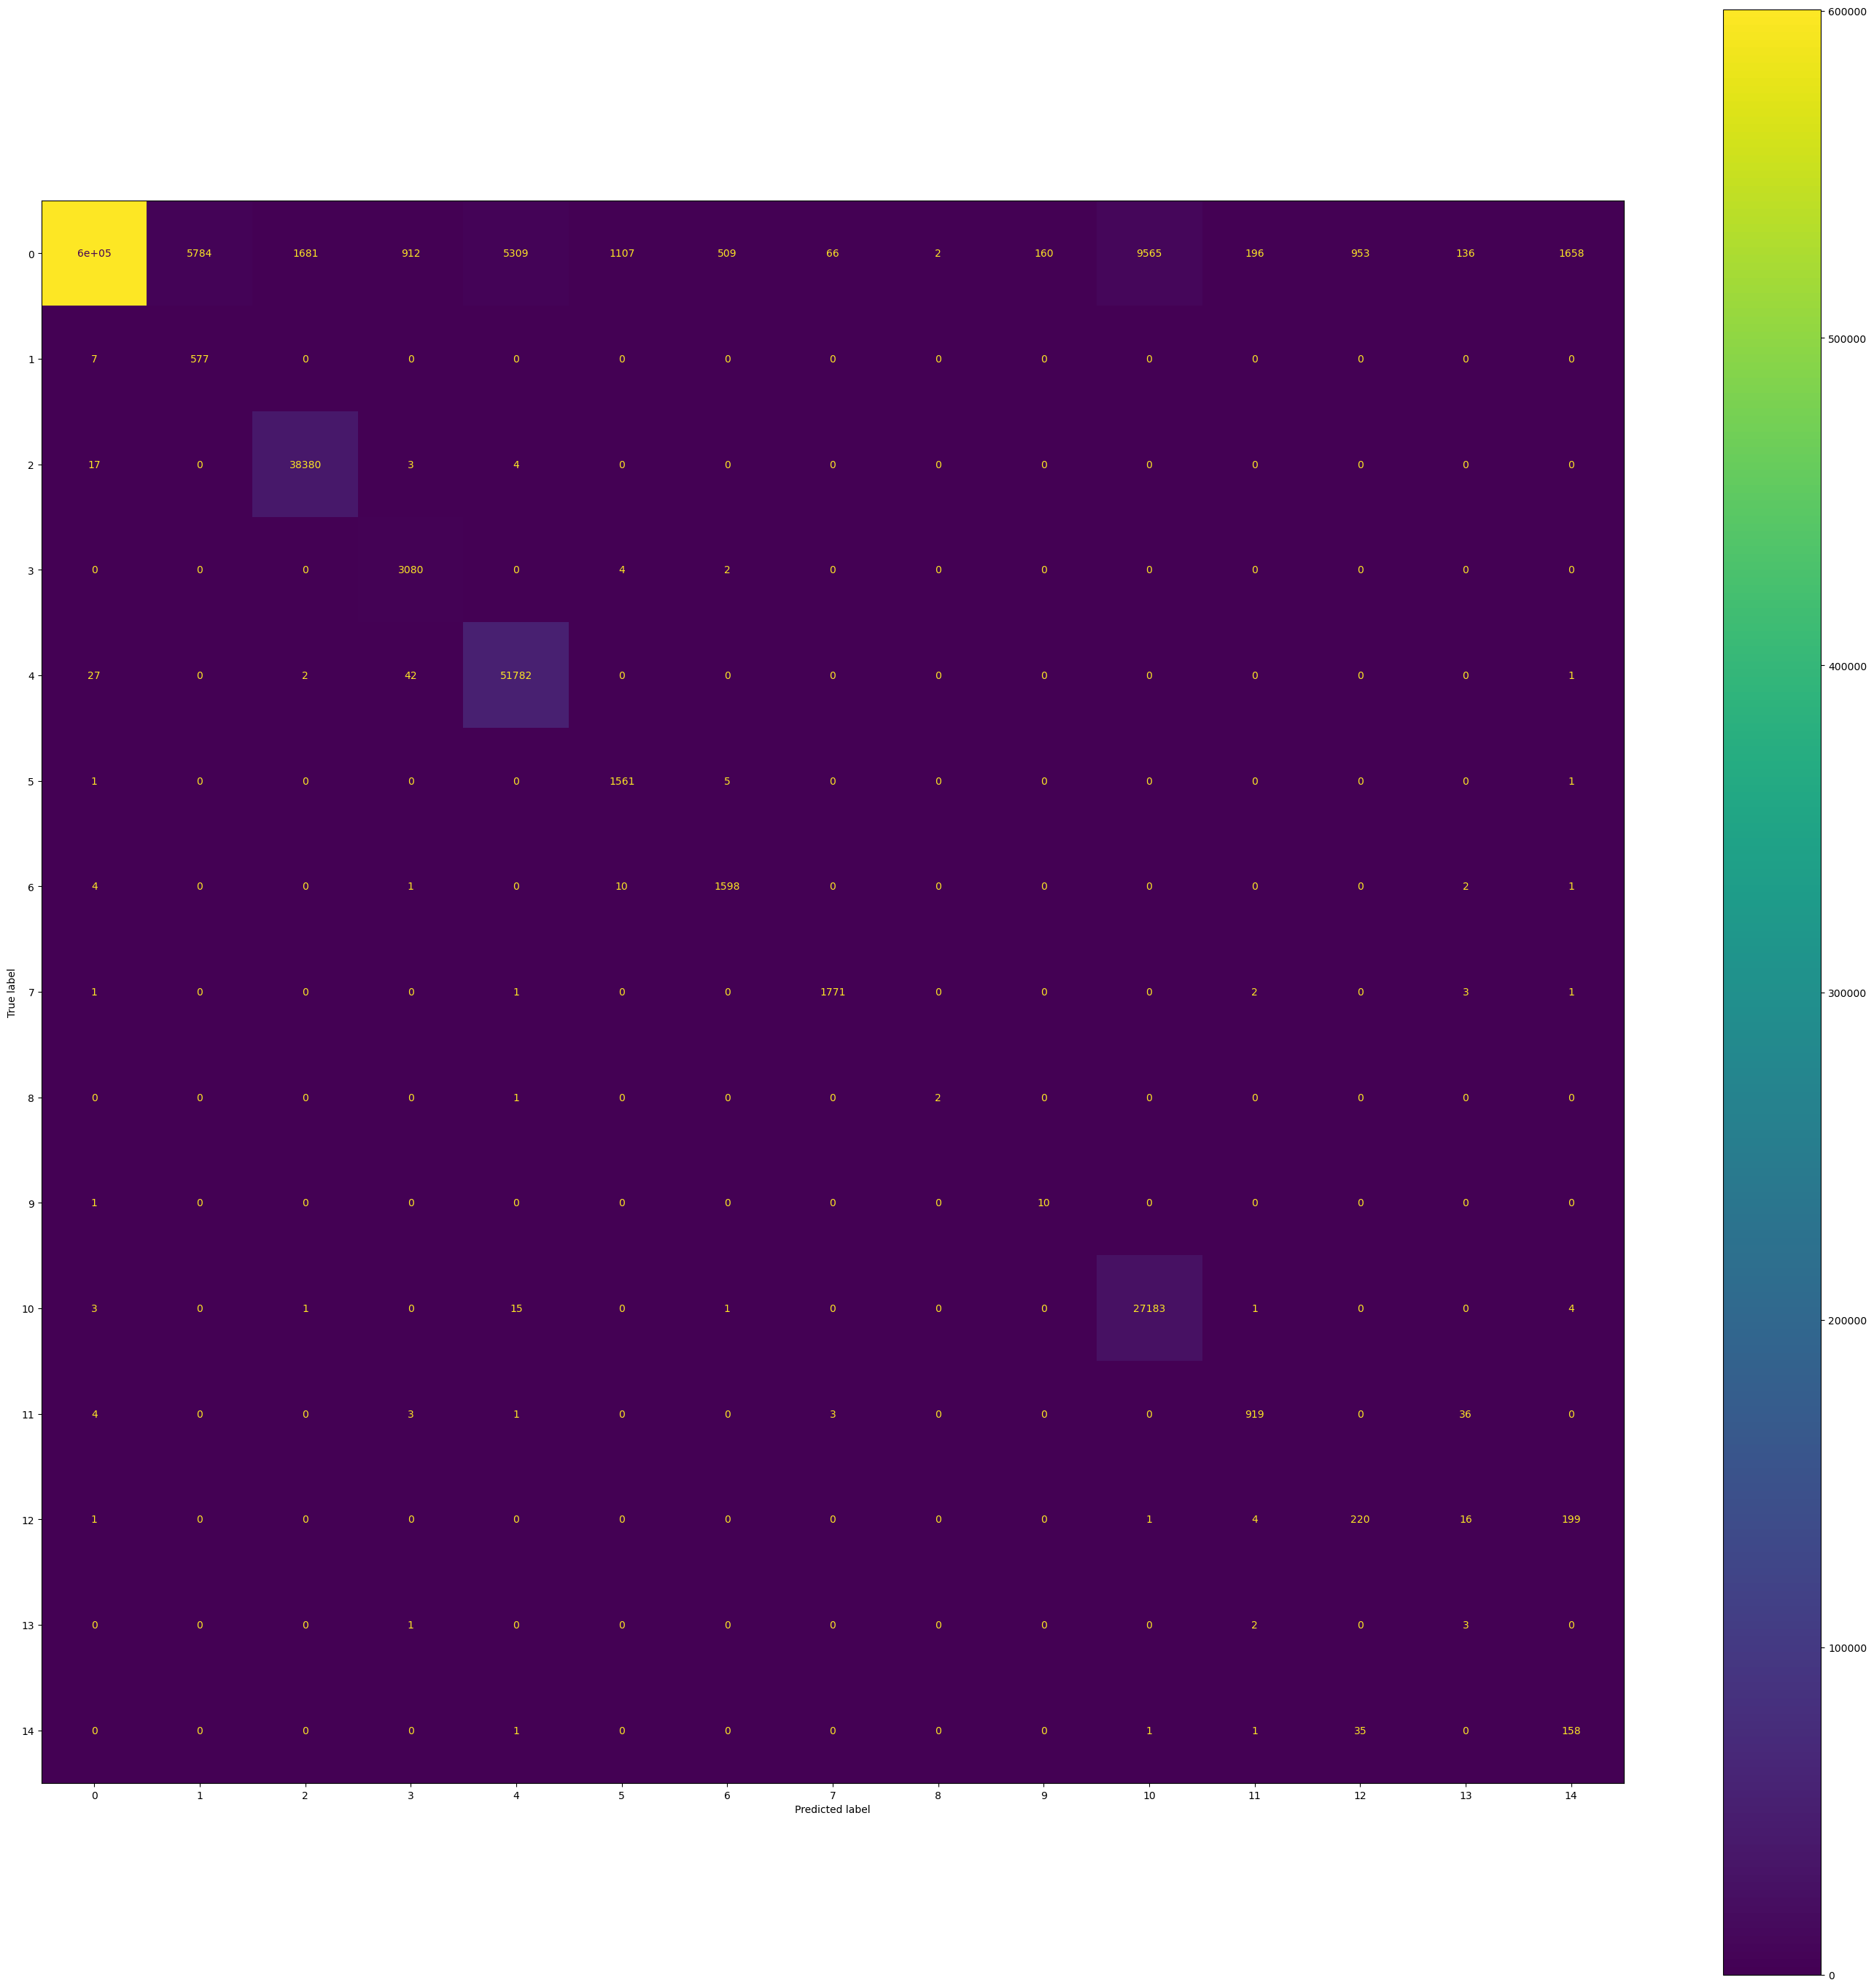

{'Class': 0, 'TP': 600480, 'FN': 28038.0, 'FP': 66.0, 'TN': 127656.0}
{'Class': 1, 'TP': 577, 'FN': 7.0, 'FP': 5784.0, 'TN': 749872.0}
{'Class': 2, 'TP': 38380, 'FN': 24.0, 'FP': 1684.0, 'TN': 716152.0}
{'Class': 3, 'TP': 3080, 'FN': 6.0, 'FP': 962.0, 'TN': 752192.0}
{'Class': 4, 'TP': 51782, 'FN': 72.0, 'FP': 5332.0, 'TN': 699054.0}
{'Class': 5, 'TP': 1561, 'FN': 7.0, 'FP': 1121.0, 'TN': 753551.0}
{'Class': 6, 'TP': 1598, 'FN': 18.0, 'FP': 517.0, 'TN': 754107.0}
{'Class': 7, 'TP': 1771, 'FN': 8.0, 'FP': 69.0, 'TN': 754392.0}
{'Class': 8, 'TP': 2, 'FN': 1.0, 'FP': 2.0, 'TN': 756235.0}
{'Class': 9, 'TP': 10, 'FN': 1.0, 'FP': 160.0, 'TN': 756069.0}
{'Class': 10, 'TP': 27183, 'FN': 25.0, 'FP': 9567.0, 'TN': 719465.0}
{'Class': 11, 'TP': 919, 'FN': 47.0, 'FP': 206.0, 'TN': 755068.0}
{'Class': 12, 'TP': 220, 'FN': 221.0, 'FP': 988.0, 'TN': 754811.0}
{'Class': 13, 'TP': 3, 'FN': 3.0, 'FP': 193.0, 'TN': 756041.0}
{'Class': 14, 'TP': 158, 'FN': 38.0, 'FP': 1865.0, 'TN': 754179.0}


In [ ]:
#confusionMatrix(predictedANN, y_testANN, classlabel, "Artificial Neural Network Confusion Matrix")
cm = confusion_matrix(y_testle, predictedANNSmote)
CmDisp = ConfusionMatrixDisplay(confusion_matrix= cm)
fig, ax = plt.subplots(figsize = (35,35))
CmDisp.plot(ax=ax)
plt.show()
counts_from_confusion(cm)

In [ ]:
getSummary(predictedANNSmote, y_testle, "Artificial Neural Network")  

Artificial Neural Network: 
Accuracy: 0.9622923939490109 
Recall: 0.5605470108316658 
Precision: 0.8833679748480894 
F1 Score: 0.6237299078958027


In [ ]:
print(classification_report(predictedANNSmote, y_testle))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    600546
           1       0.99      0.09      0.17      6361
           2       1.00      0.96      0.98     40064
           3       1.00      0.76      0.86      4042
           4       1.00      0.91      0.95     57114
           5       1.00      0.58      0.73      2682
           6       0.99      0.76      0.86      2115
           7       1.00      0.96      0.98      1840
           8       0.67      0.50      0.57         4
           9       0.91      0.06      0.11       170
          10       1.00      0.74      0.85     36750
          11       0.95      0.82      0.88      1125
          12       0.50      0.18      0.27      1208
          13       0.50      0.02      0.03       196
          14       0.81      0.08      0.14      2023

    accuracy                           0.96    756240
   macro avg       0.88      0.56      0.62    756240
weighted avg       0.96   

In [ ]:
elapsedTimeSeconds = et - st
elapsedTimeMinutes = elapsedTimeSeconds / 60
print('Execution time:', "%.2f" %elapsedTimeSeconds, 'seconds' , "\nExecution time:", "%.2f" %elapsedTimeMinutes, 'minutes' )

Execution time: 16871.68 seconds 
Execution time: 281.19 minutes
